In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
train=pd.read_csv("C:\\Users\\ratak\\datascience\\Assignments\\Support Vector Machines\\SalaryData_Train(1).csv")
train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [26]:
test=pd.read_csv("C:\\Users\\ratak\\datascience\\Assignments\\Support Vector Machines\\SalaryData_Test(1).csv")
test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [27]:
train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [28]:
test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [30]:
test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [31]:
train[train.isnull().any(axis=1)]

Empty DataFrame
Columns: [age, workclass, education, educationno, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, native, Salary]
Index: []

In [32]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [33]:
## There is no nan values in the train data set


In [34]:
test[test.isnull().any(axis=1)].shape
## Shows the total no of nan values in each columns

(0, 14)

In [35]:
## There is no nan values in the test data set 

In [36]:
train['Salary'].value_counts()

Salary
 <=50K    22653
 >50K      7508
Name: count, dtype: int64

In [37]:
test['Salary'].value_counts()

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [38]:
pd.crosstab(train['occupation'],train['Salary'])

Salary               <=50K   >50K
occupation                       
 Adm-clerical         3223    498
 Armed-Forces            8      1
 Craft-repair         3122    908
 Exec-managerial      2055   1937
 Farming-fishing       874    115
 Handlers-cleaners    1267     83
 Machine-op-inspct    1720    245
 Other-service        3080    132
 Priv-house-serv       142      1
 Prof-specialty       2227   1811
 Protective-serv       434    210
 Sales                2614    970
 Tech-support          634    278
 Transport-moving     1253    319

In [39]:
pd.crosstab(train['workclass'],train['Salary'])

Salary              <=50K   >50K
workclass                       
 Federal-gov          578    365
 Local-gov           1458    609
 Private            17409   4876
 Self-emp-inc         474    600
 Self-emp-not-inc    1785    714
 State-gov            935    344
 Without-pay           14      0

In [40]:
pd.crosstab(train['workclass'],train['occupation'])

occupation          Adm-clerical   Armed-Forces   Craft-repair  \
workclass                                                        
 Federal-gov                 316              9             63   
 Local-gov                   281              0            143   
 Private                    2793              0           3146   
 Self-emp-inc                 28              0             99   
 Self-emp-not-inc             49              0            523   
 State-gov                   251              0             55   
 Without-pay                   3              0              1   

occupation          Exec-managerial   Farming-fishing   Handlers-cleaners  \
workclass                                                                   
 Federal-gov                    179                 8                  22   
 Local-gov                      212                29                  46   
 Private                       2647               450                1255   
 Self-emp-inc                   385                51                   2   
 Self-emp-not-inc               383               430                  15   
 State-gov                      186                15                   9   
 Without-pay                      0                 6                   1   

occupation          Machine-op-inspct   Other-service   Priv-house-serv  \
workclass                                                                 
 Federal-gov                       14              34                 0   
 Local-gov                         11             189                 0   
 Private                         1881            2665               143   
 Self-emp-inc                      10              27                 0   
 Self-emp-not-inc                  35             173                 0   
 State-gov                         13             123                 0   
 Without-pay                        1               1                 0   

occupation          Prof-specialty   Protective-serv   Sales   Tech-support  \
workclass                                                                     
 Federal-gov                   167                27      14             66   
 Local-gov                     692               304       7             38   
 Private                      2254               186    2895            723   
 Self-emp-inc                  157                 5     281              3   
 Self-emp-not-inc              365                 6     376             26   
 State-gov                     403               116      11             56   
 Without-pay                     0                 0       0              0   

occupation          Transport-moving  
workclass                             
 Federal-gov                      24  
 Local-gov                       115  
 Private                        1247  
 Self-emp-inc                     26  
 Self-emp-not-inc                118  
 State-gov                        41  
 Without-pay                       1

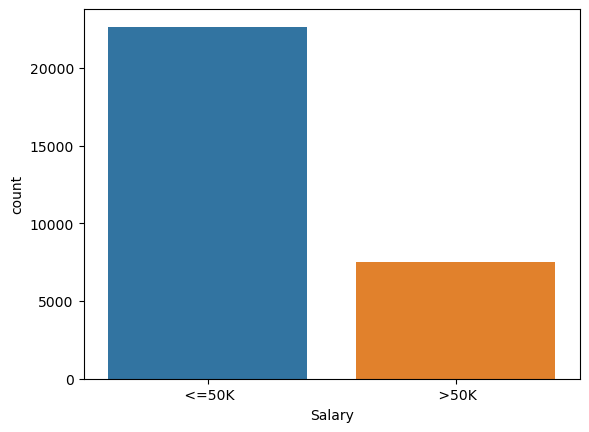

Salary
 <=50K    22653
 >50K      7508
Name: count, dtype: int64

In [41]:
sns.countplot(x='Salary', data=train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
train['Salary'].value_counts()

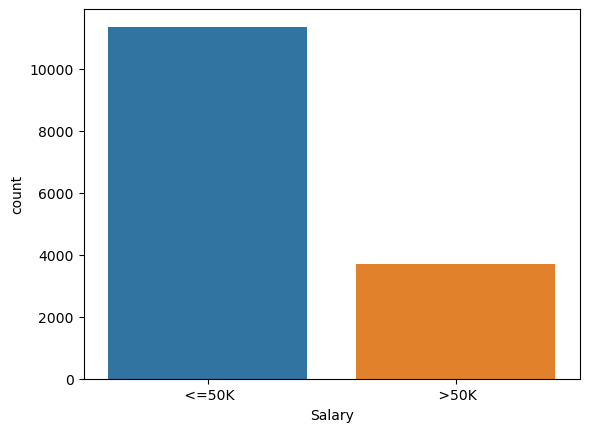

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [42]:
sns.countplot(x='Salary',data= test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test['Salary'].value_counts()

<Axes: xlabel='education'>

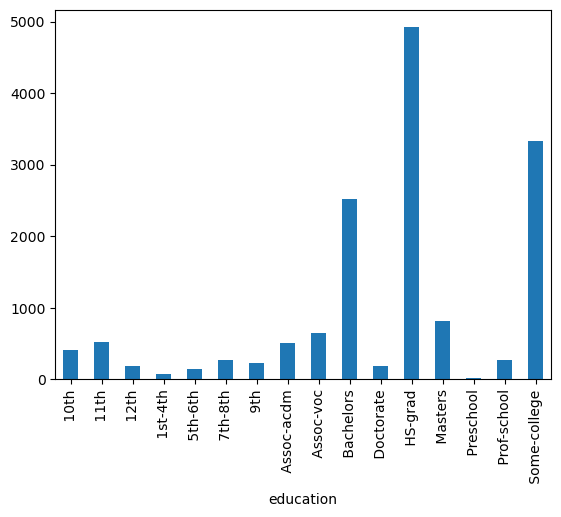

In [43]:
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

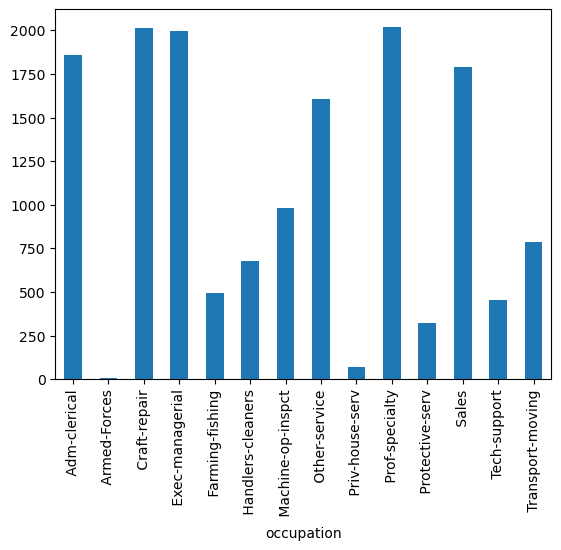

In [44]:
pd.crosstab(train['Salary'],train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

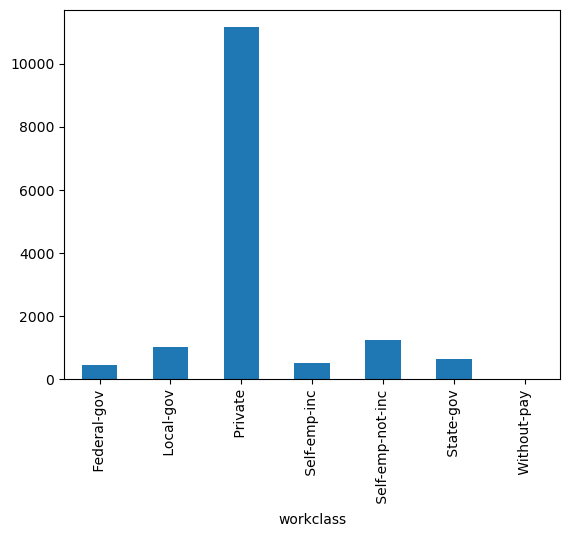

In [45]:
pd.crosstab(train['Salary'],train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

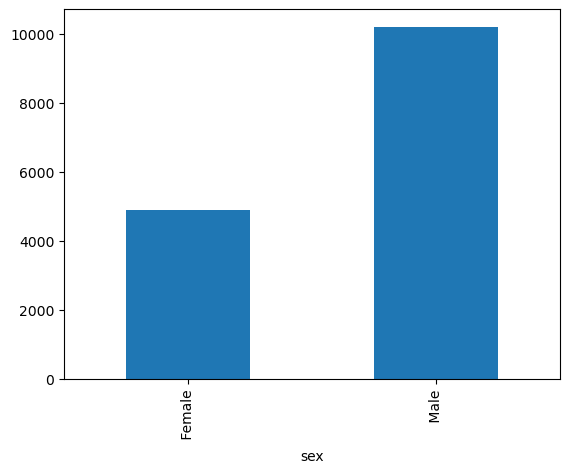

In [46]:
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

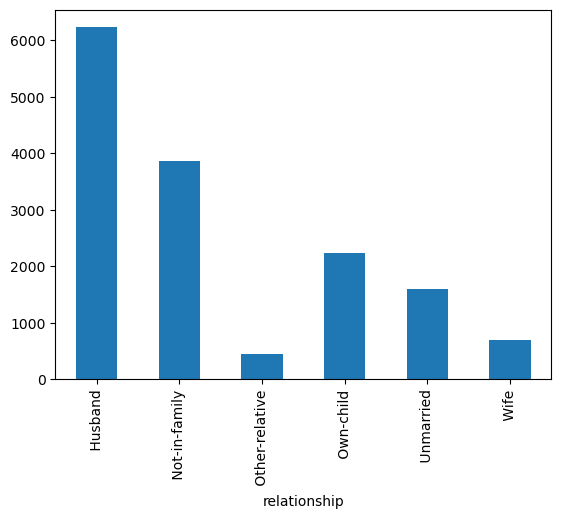

In [47]:
pd.crosstab(train['Salary'],train['relationship']).mean().plot(kind='bar')

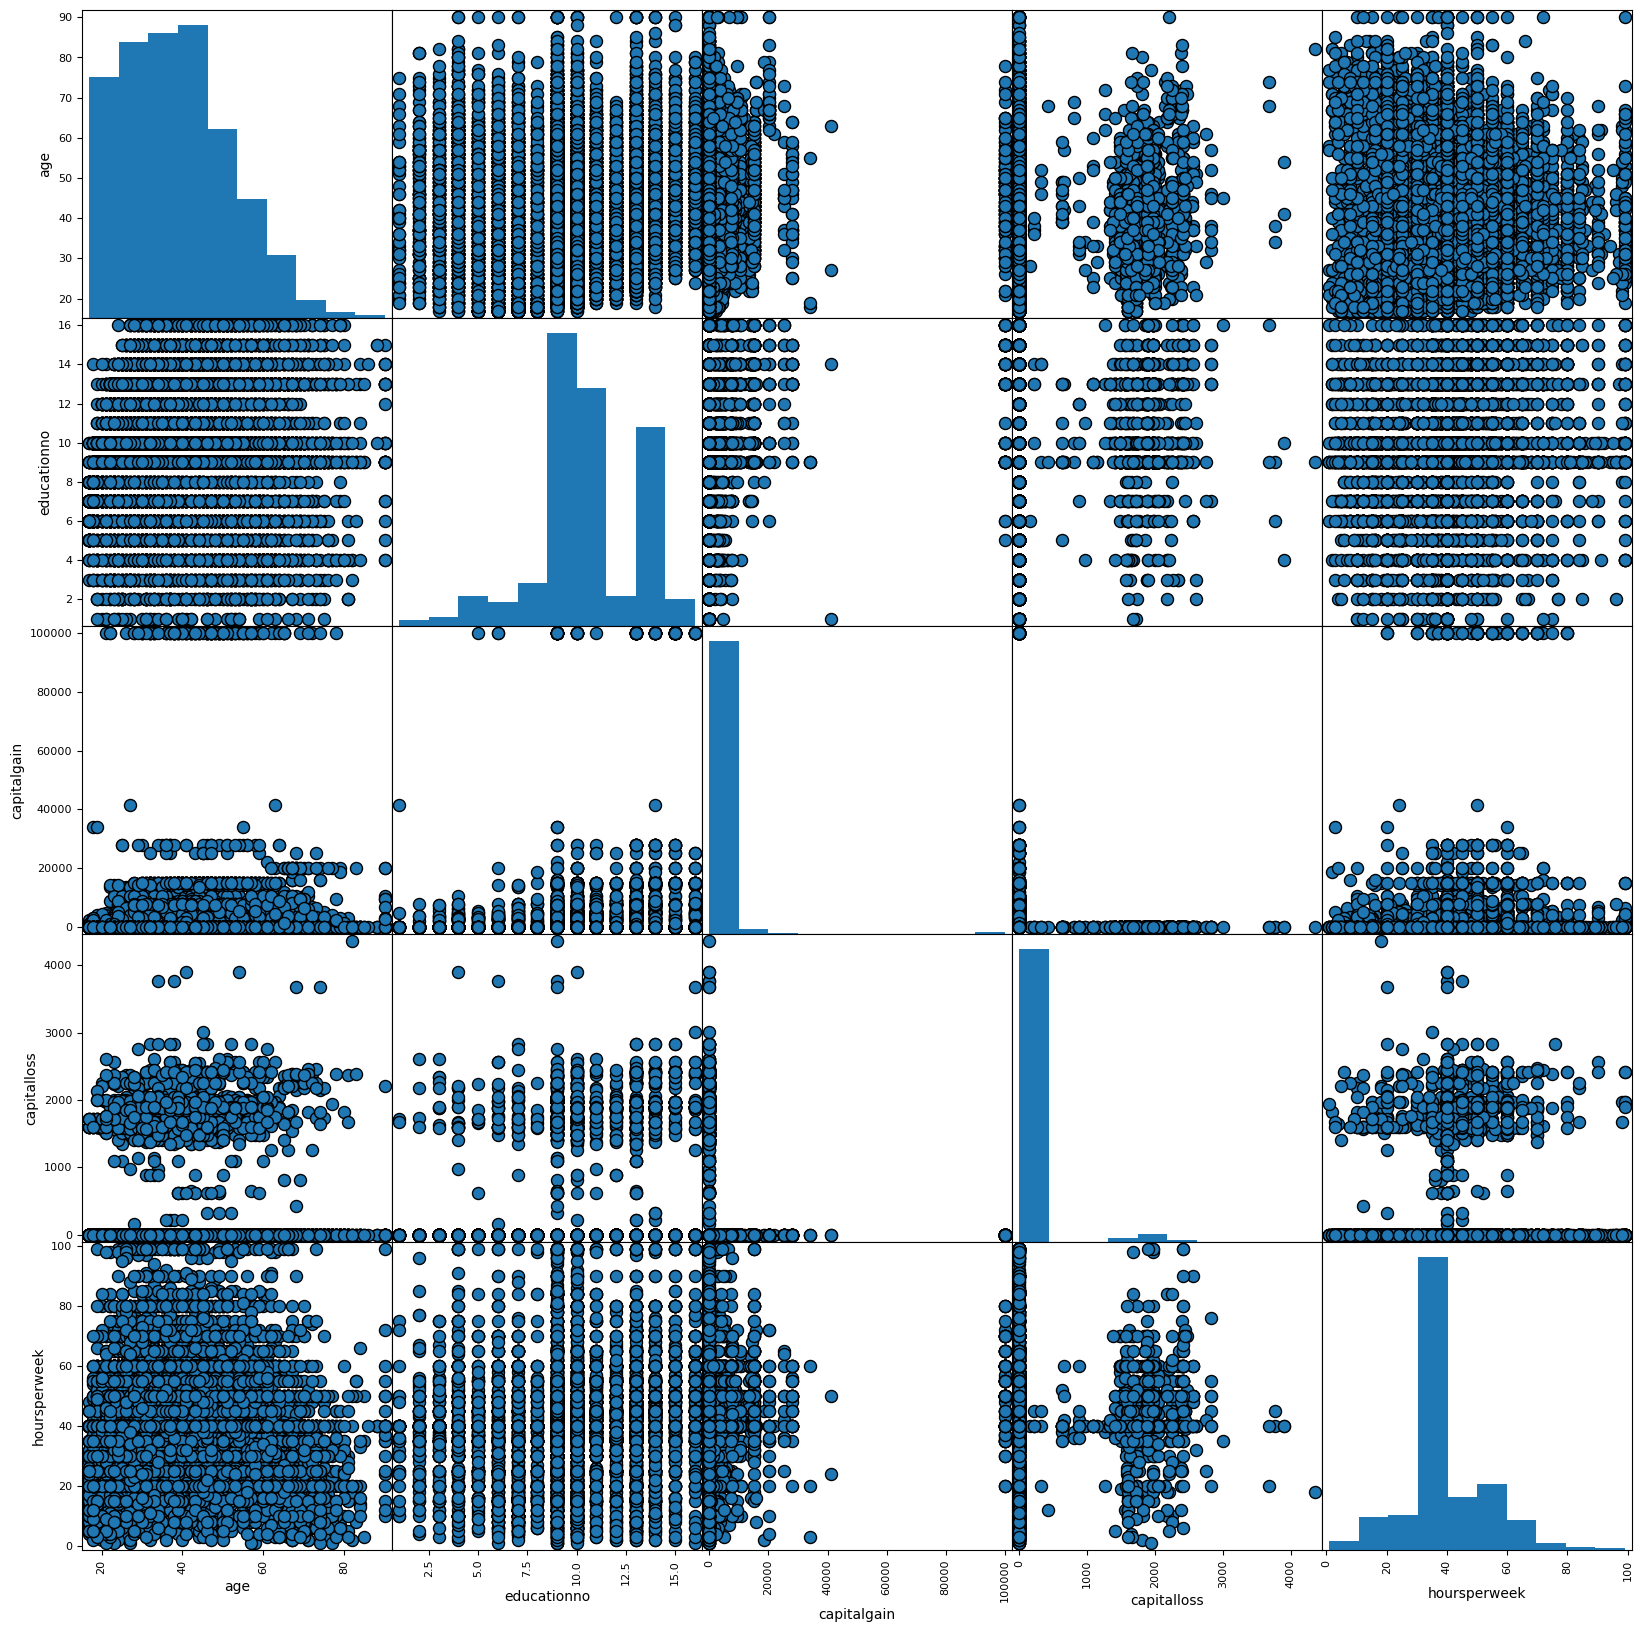

In [48]:
#  Scatter matrix to observe relationship between every column attribute.
pd.plotting.scatter_matrix(train,
                          figsize=[20,20],
                          diagonal='hist',
                          alpha=1,
                          s = 300,
                          marker = '.',
                          edgecolor= "black")
plt.show()

In [50]:
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [51]:
## Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
    train[i]=number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [52]:
train

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            38   
30157             0     4    1            0            0            40   
30158             4     4    0            0            0            40   
30159             3     4    1            0            0            20   
30160             5     4    0        15024            0            40   

       native  Salary  
0          37   <=50K  
1          37   <=50K  
2          37   <=50K  
3          37   <=50K  
4           4   <=50K  
...       ...     ...  
30156      37   <=50K  
30157      37    >50K  
30158      37   <=50K  
30159      37   <=50K  
30160      37    >50K  

[30161 rows x 14 columns]

In [53]:
test

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37   <=50K  
1          37   <=50K  
2          37    >50K  
3          37    >50K  
4          37   <=50K  
...       ...     ...  
15055      37   <=50K  
15056      37   <=50K  
15057      37   <=50K  
15058      37   <=50K  
15059      37    >50K  

[15060 rows x 14 columns]

In [54]:
## Capturing the column names which can help in futher process
colnames=train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [55]:
len(colnames)

14

In [56]:
train

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            38   
30157             0     4    1            0            0            40   
30158             4     4    0            0            0            40   
30159             3     4    1            0            0            20   
30160             5     4    0        15024            0            40   

       native  Salary  
0          37   <=50K  
1          37   <=50K  
2          37   <=50K  
3          37   <=50K  
4           4   <=50K  
...       ...     ...  
30156      37   <=50K  
30157      37    >50K  
30158      37   <=50K  
30159      37   <=50K  
30160      37    >50K  

[30161 rows x 14 columns]

In [57]:
test

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37   <=50K  
1          37   <=50K  
2          37    >50K  
3          37    >50K  
4          37   <=50K  
...       ...     ...  
15055      37   <=50K  
15056      37   <=50K  
15057      37   <=50K  
15058      37   <=50K  
15059      37    >50K  

[15060 rows x 14 columns]

In [58]:
x_train = train[colnames[0:13]]
y_train = train[colnames[13]]
x_test = test[colnames[0:13]]
y_test = test[colnames[13]]

In [59]:
## Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [60]:
x_train = norm_func(x_train)
x_test = norm_func(x_test)

# SVM Model

In [61]:
model_linear = SVC(kernel = "linear", random_state=40, gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [62]:
pred_test_linear = model_linear.predict(x_test)

In [63]:
np.mean(pred_test_linear==y_test)  # Accuracy = 80.98%

0.8098273572377158

In [64]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [65]:
np.mean(pred_test_poly==y_test) # Accuracy = 82.05%

0.8205179282868525

In [66]:
# Kernel = rbf
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

In [67]:
np.mean(pred_test_rbf==y_test) # Accuracy =82.80%

0.8280876494023904

In [ ]:
# 'Sigmoid'
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

In [ ]:
np.mean(pred_test_sig==y_test)  # Accuracy = 82.80%

# SVM with Grid Search

In [ ]:
## Kernel = rbf
clf = SVC()
parma_grid = [{'kernel' : ["rbf"], 'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [ ]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy =", acc)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
# Kernel = Linear
clf = SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [ ]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC (C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc )

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
# Kernel = Poly
clf = SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [ ]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_,gsv.best_score_

In [ ]:
clf = SVC(C= 15, gamma= 50)
clf.fit(x_train , y_train)
y_pred= clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy=", acc)

In [ ]:
# Kernel = Sigmoid
clf = SVC()
parma_grid = [{'kernel': ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [ ]:
gsv = GridSearchCVCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_

In [ ]:
clf = SVC(C=15, gamma=50)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy=", acc)

# 2. Question


In [77]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [79]:
forest=pd.read_csv("C:\\Users\\ratak\\datascience\\Assignments\\Support Vector Machines\\forestfires.csv")
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

#   Performing EDA

In [80]:
forest.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [81]:
forest.tail()

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[5 rows x 31 columns]

In [82]:
forest.shape

(517, 31)

In [84]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

# The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [85]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

# The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [86]:
forest.ndim

2

In [88]:
forest.axes

[RangeIndex(start=0, stop=517, step=1),
 Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
        'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
        'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
        'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
        'monthoct', 'monthsep', 'size_category'],
       dtype='object')]

# axes is a function of the matplotlib library that adds axes to the current graph and makes it as current axes.

<Figure size 1000x1500 with 0 Axes>

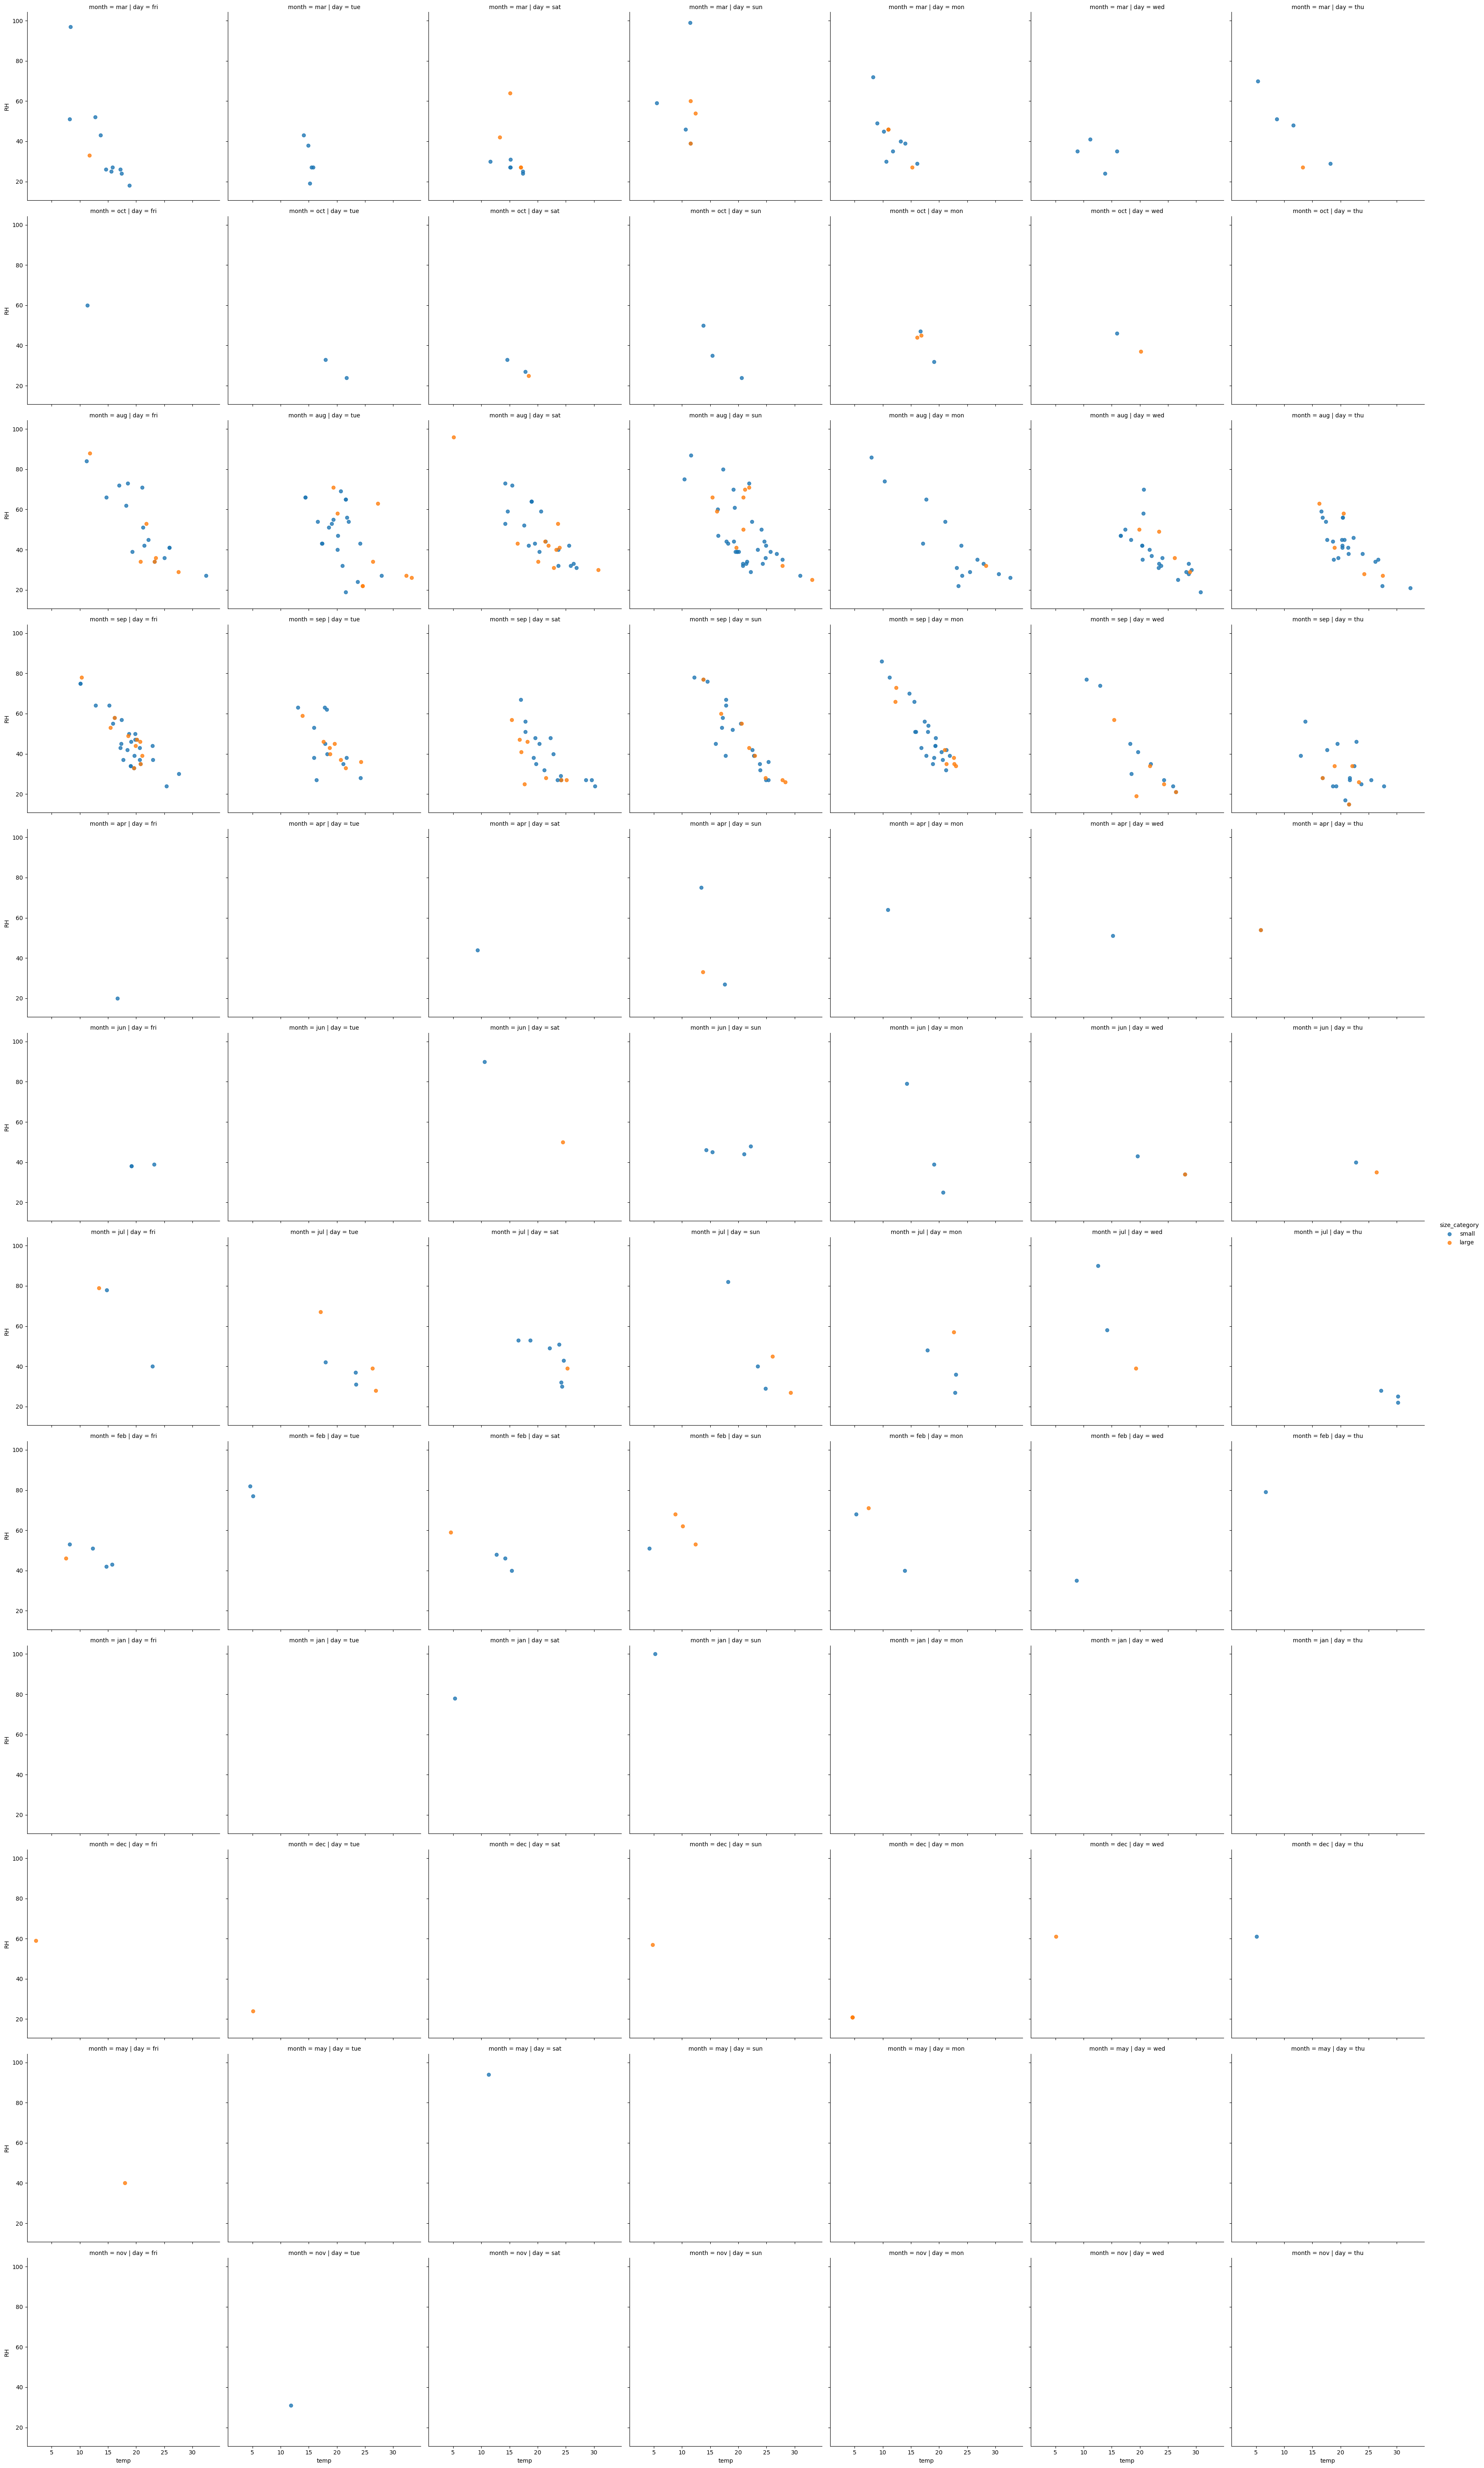

In [89]:
plt.figure(figsize=(10,15))
sns.lmplot(x='temp',y='RH',data=forest,hue='size_category',fit_reg=False,col='day',row='month')
plt.show()

In [90]:
# Observations
#1. as the temperature increases the RH got decrease
# The number of fire got in the months od march, august and september

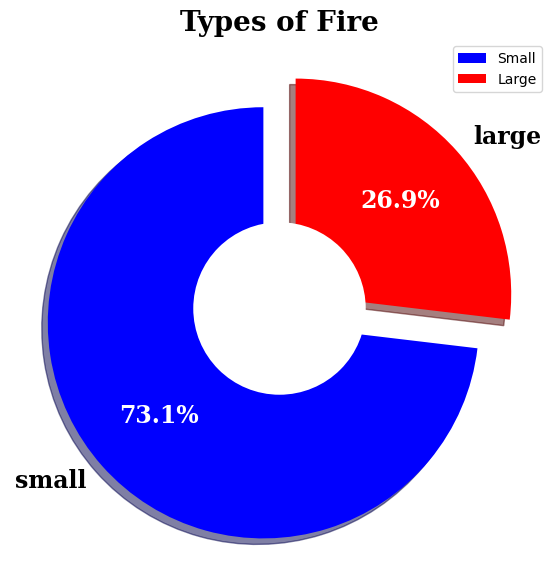

In [93]:
label_data=forest['size_category'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts=plt.pie(label_data,labels=label_data.index,colors=['blue','red'],pctdistance=0.65,shadow=True,
                            startangle=90,explode=explode,autopct='%1.1f%%',
                            textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Types of Fire', size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Small','Large'],loc="upper right")
plt.show()

In [97]:
#!pip install plotnine

  Obtaining dependency information for plotnine from https://files.pythonhosted.org/packages/5b/b5/fb81914804ad0d8e4a53118df343efdba1562de13275189cf2228ef8e3c1/plotnine-0.12.4-py3-none-any.whl.metadata
  Obtaining dependency information for mizani<0.10.0,>0.9.0 from https://files.pythonhosted.org/packages/e2/95/d4e33d3f5bc9fee5512637661208b6b595bda58e9b6a66fa867137761dd7/mizani-0.9.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 991.0 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 3.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.3 MB 4.9 MB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/73.7 kB ? eta -:--:--
   ---------------------------------------- 73.7/73.7 kB ? eta 0:0

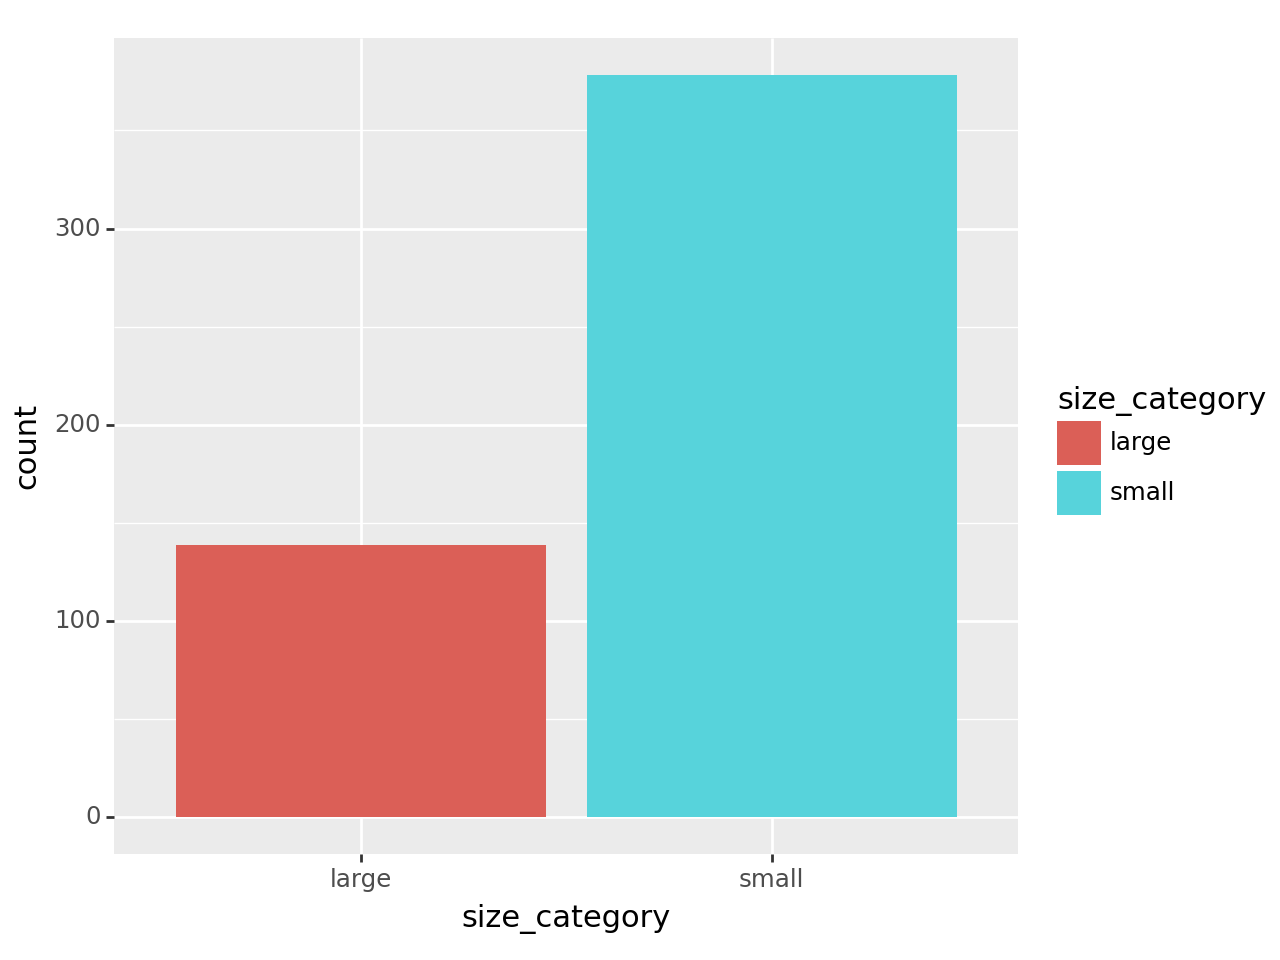

<Figure Size: (640 x 480)>

In [98]:
# Small fires took place more in numbers compared to large fires
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(forest) + aes(x="size_category",fill='size_category')+geom_bar()

In [99]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

# Here as we can see that the columns `month` and `day` has been converted into dummies so now we do not required it so we will drop them


In [100]:
forest.pop('month') # pop is used to remove coloumns
forest.pop('day')

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [101]:
forest.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthfeb  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 29 columns]

In [102]:
forest['size_category'].value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

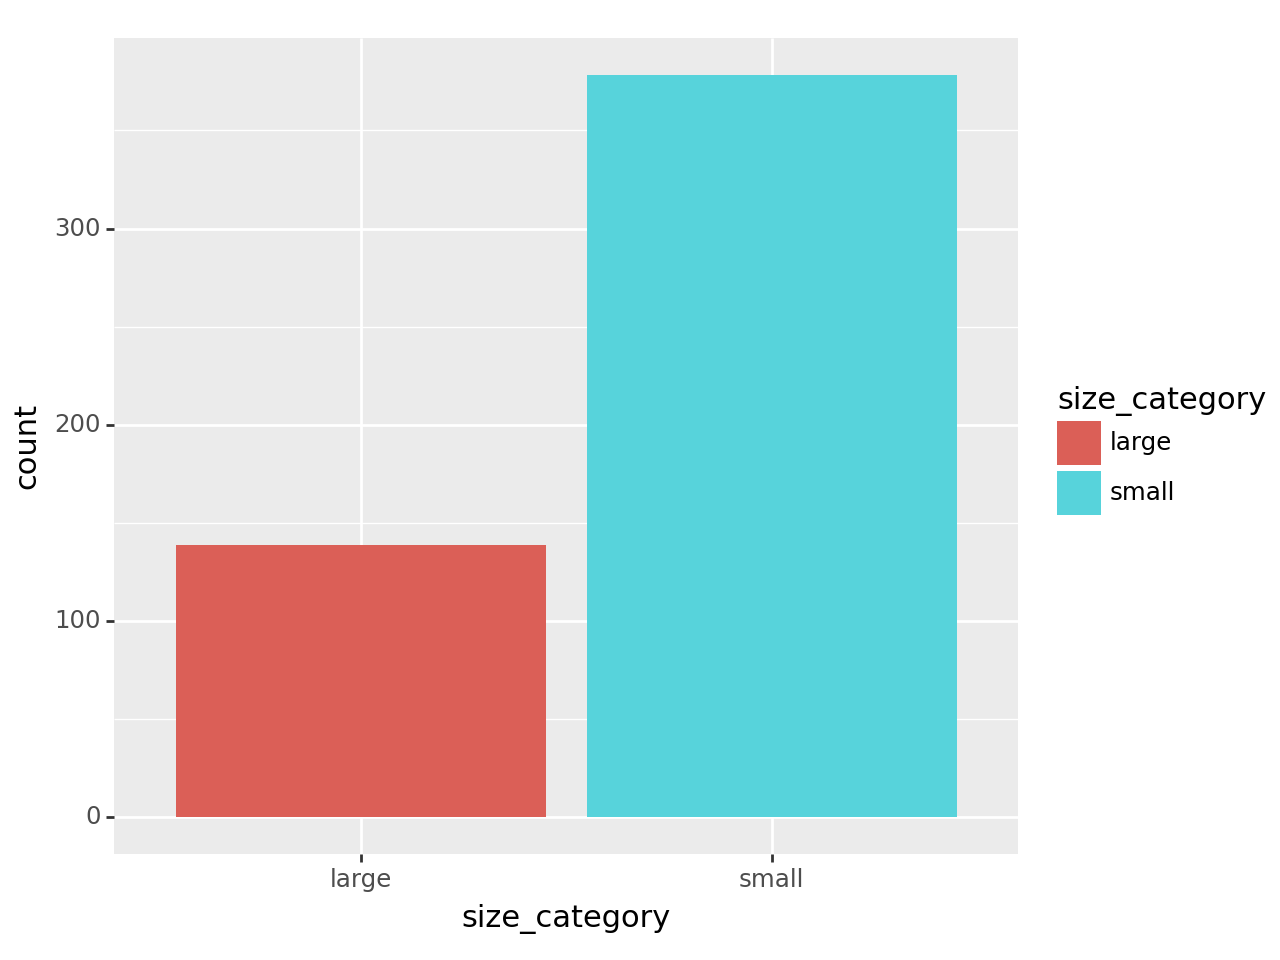

<Figure Size: (640 x 480)>

In [103]:
from plotnine import ggplot, aes, stat_bin, geom_bar
ggplot(forest)+ aes(x="size_category",fill='size_category')+geom_bar()

# From the above graph we can say the most of the forest fires where small in quantity

In [104]:
# Checking for missing data
NAs = pd.concat([forest.isnull().sum()],axis=1, keys=["Total NA"])
NAs[NAs.sum(axis=1) > 0]

Empty DataFrame
Columns: [Total NA]
Index: []

In [105]:
# There is no any Missing value in the dataset
forest[forest.duplicated()].shape

(8, 29)

In [107]:
# Displaying duplicate values
forest[forest.duplicated()]

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
53   92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00       0  ...   
100  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00       0  ...   
215  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66       0  ...   
303  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00       1  ...   
426  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00       0  ...   
461  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00       0  ...   
501  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00       0  ...   
508  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00       1  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         0         1         0         0   
303         0         0         0         1         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthoct  monthsep  size_category  
53          0         0          small  
100         0         0          small  
215         0         0          large  
303         0         0          small  
426         0         0          small  
461         0         0          small  
501         0         0          small  
508         0         0          small  

[8 rows x 29 columns]

In [108]:
# Droping the duplicate rows
forest=forest.drop_duplicates()

In [109]:
forest[forest.duplicated()].shape

(0, 29)

#  Now there is no any duplicate values

In [110]:
forest.nunique()

FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [112]:
forest['size_category']=forest['size_category'].apply(lambda x: 1 if x=='large' else 0)

# As SVM is classification model we can not work on stirng data as our dependent varible is in string so using lambda function we are converting it into categorical type

In [113]:
forest.tail()

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
512         0         0              1  
513         0         0              1  
514         0         0              1  
515         0         0              0  
516         0         0              0  

[5 rows x 29 columns]

In [114]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [115]:
features = ['monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 
           'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']

In [116]:
list(enumerate(features))

[(0, 'monthapr'),
 (1, 'monthaug'),
 (2, 'monthdec'),
 (3, 'monthfeb'),
 (4, 'monthjan'),
 (5, 'monthjul'),
 (6, 'monthjun'),
 (7, 'monthmar'),
 (8, 'monthmay'),
 (9, 'monthnov'),
 (10, 'monthoct'),
 (11, 'monthsep')]

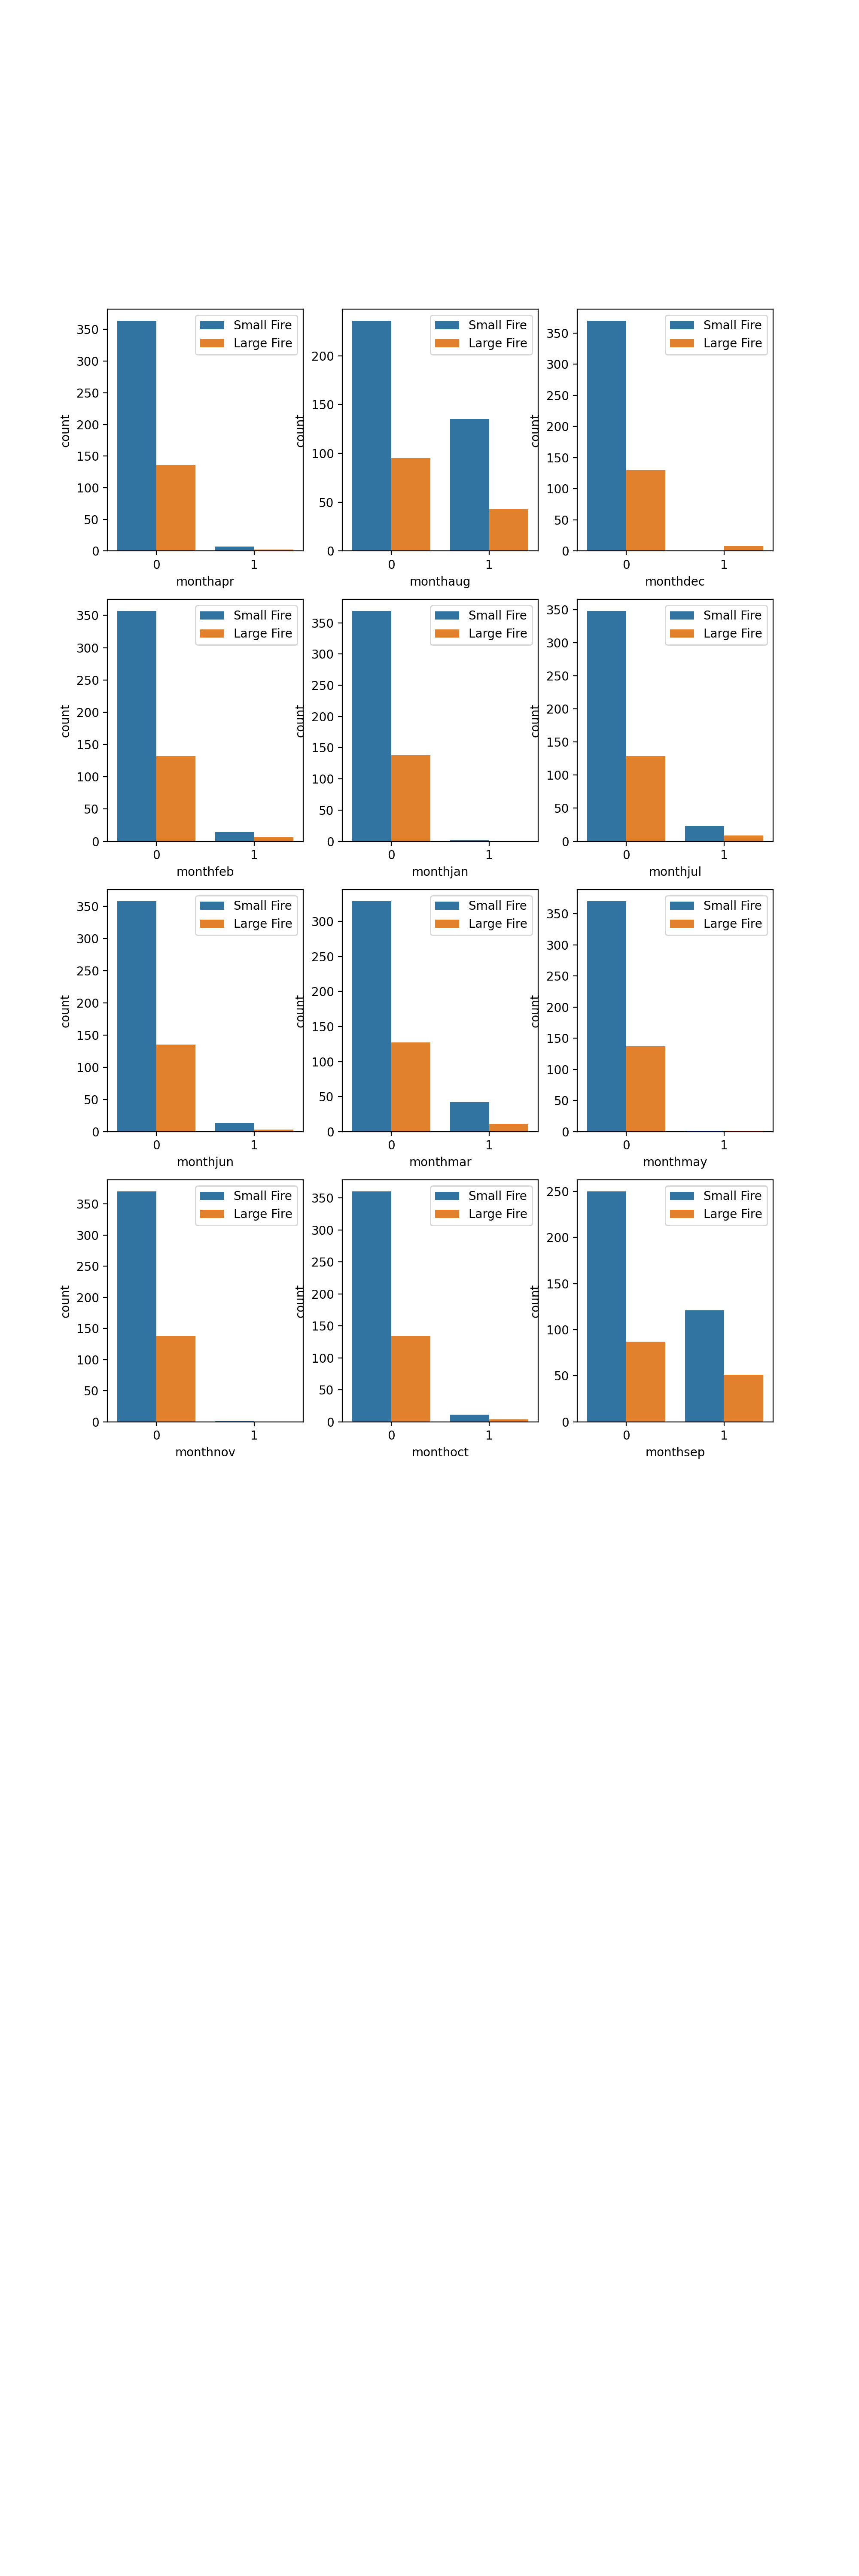

In [124]:
plt.figure(figsize=(10,30))
for i in enumerate(features):
    plt.subplot(7,3,i[0]+1)
    sns.countplot(x=i[1],hue='size_category',data=forest)
    plt.legend(["Small Fire","Large Fire"])
plt.show()

# Observations:
# 1. In the month of february, March, April, May, June, july, August, September, October and December there was an large fire has taken place
# 2. While in January and November small fires took place which were less harmful
# 3. In august and september there is highly forest got small and large fires
# 4. So, we can assume that in these two months we should be well prepared  with fire extingushier equipments

In [125]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean    90.618075  110.235756  547.787623    9.023576   18.865422   44.253438   
std      5.555527   63.804112  248.196222    4.585083    5.841083   16.365192   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   62.300000  437.700000    6.400000   15.400000   32.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  141.300000  713.900000   11.000000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthfeb  \
count  509.000000  509.000000   509.000000  509.000000  ...  509.000000   
mean     4.011395    0.020432    12.992908    0.163065  ...    0.039293   
std      1.800926    0.296261    64.133357    0.369788  ...    0.194482   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.610000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.580000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthjan    monthjul    monthjun    monthmar    monthmay    monthnov  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean     0.003929    0.062868    0.031434    0.104126    0.003929    0.001965   
std      0.062622    0.242965    0.174660    0.305724    0.062622    0.044324   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthoct    monthsep  size_category  
count  509.000000  509.000000     509.000000  
mean     0.029470    0.337917       0.271120  
std      0.169285    0.473466       0.444975  
min      0.000000    0.000000       0.000000  
25%      0.000000    0.000000       0.000000  
50%      0.000000    0.000000       0.000000  
75%      0.000000    1.000000       1.000000  
max      1.000000    1.000000       1.000000  

[8 rows x 29 columns]

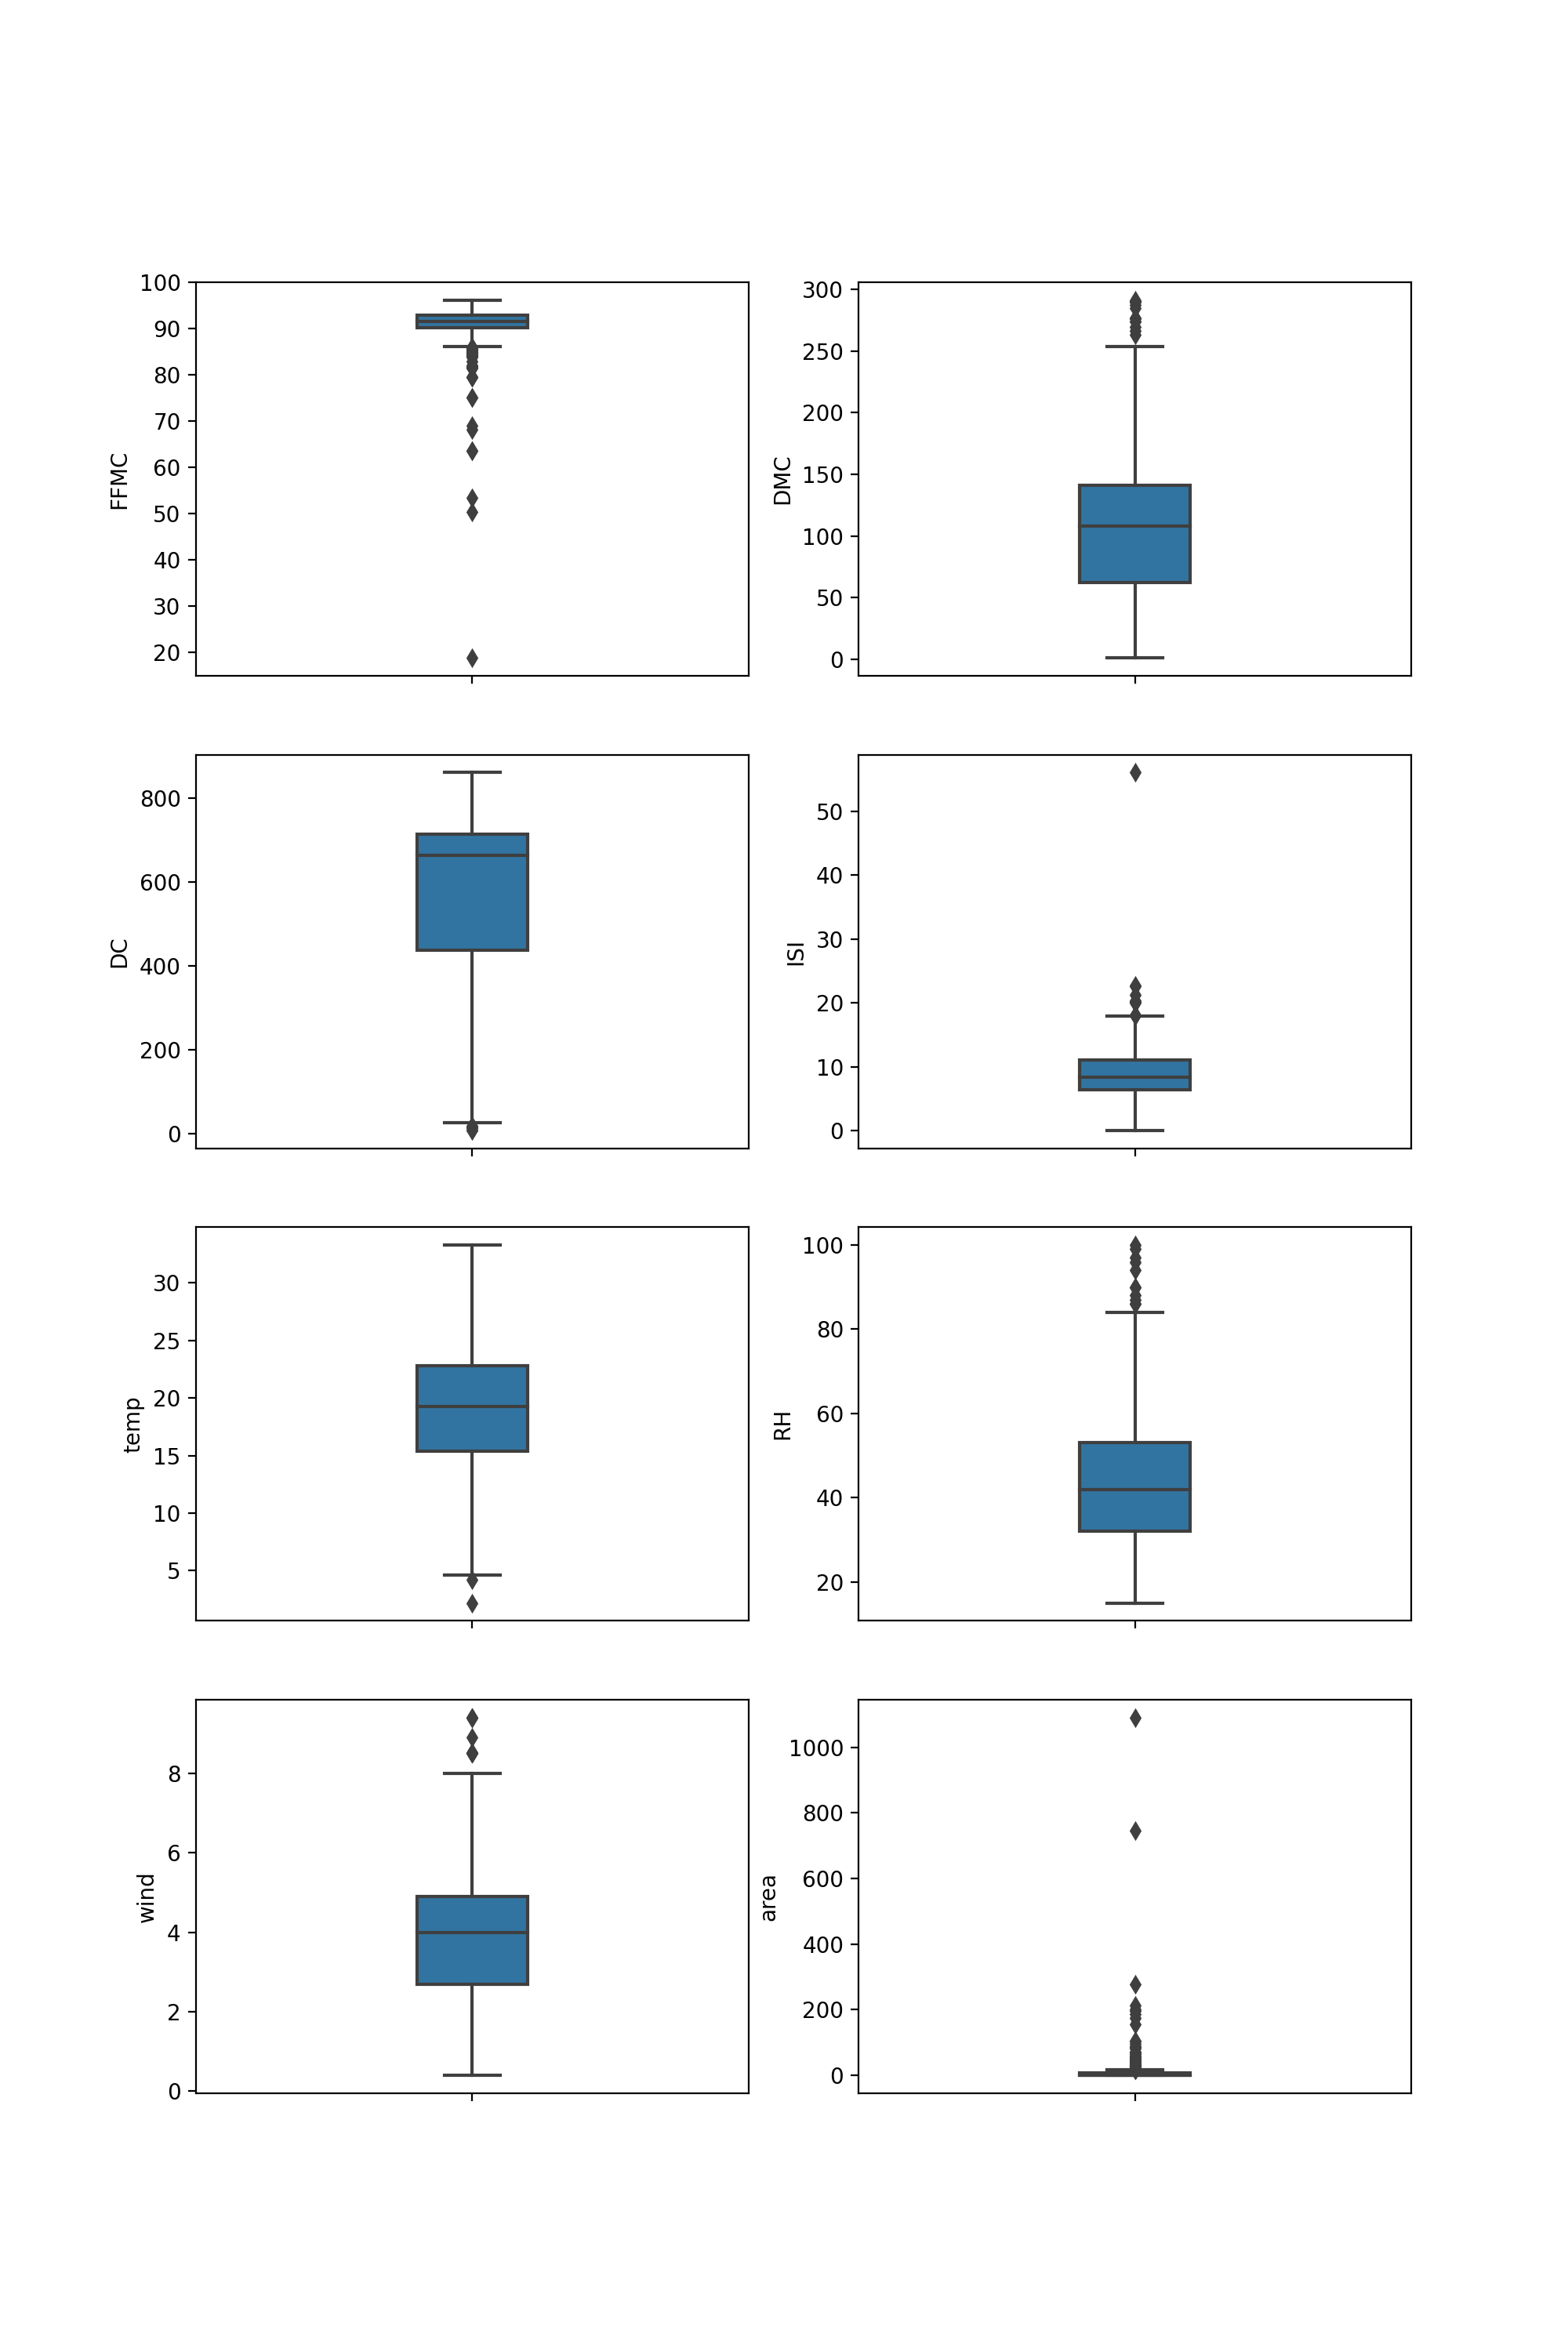

In [127]:
# Drawing boxplot for independent variables with continous values
cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.subplot(4,2,i)
    sns.boxplot(y=col, data=forest,width=0.2)
    i+=1
plt.show()

In [128]:
# Observations:
# 1. DC has highest mean among the other continues independent variables
# 2. Wind has lowest mean
# 3. as DC has high mean there is high variance in the data points but having less number of outliers
# 4. IQR range is very less in FFMC having more number's of outliers

<Figure size 500x900 with 0 Axes>

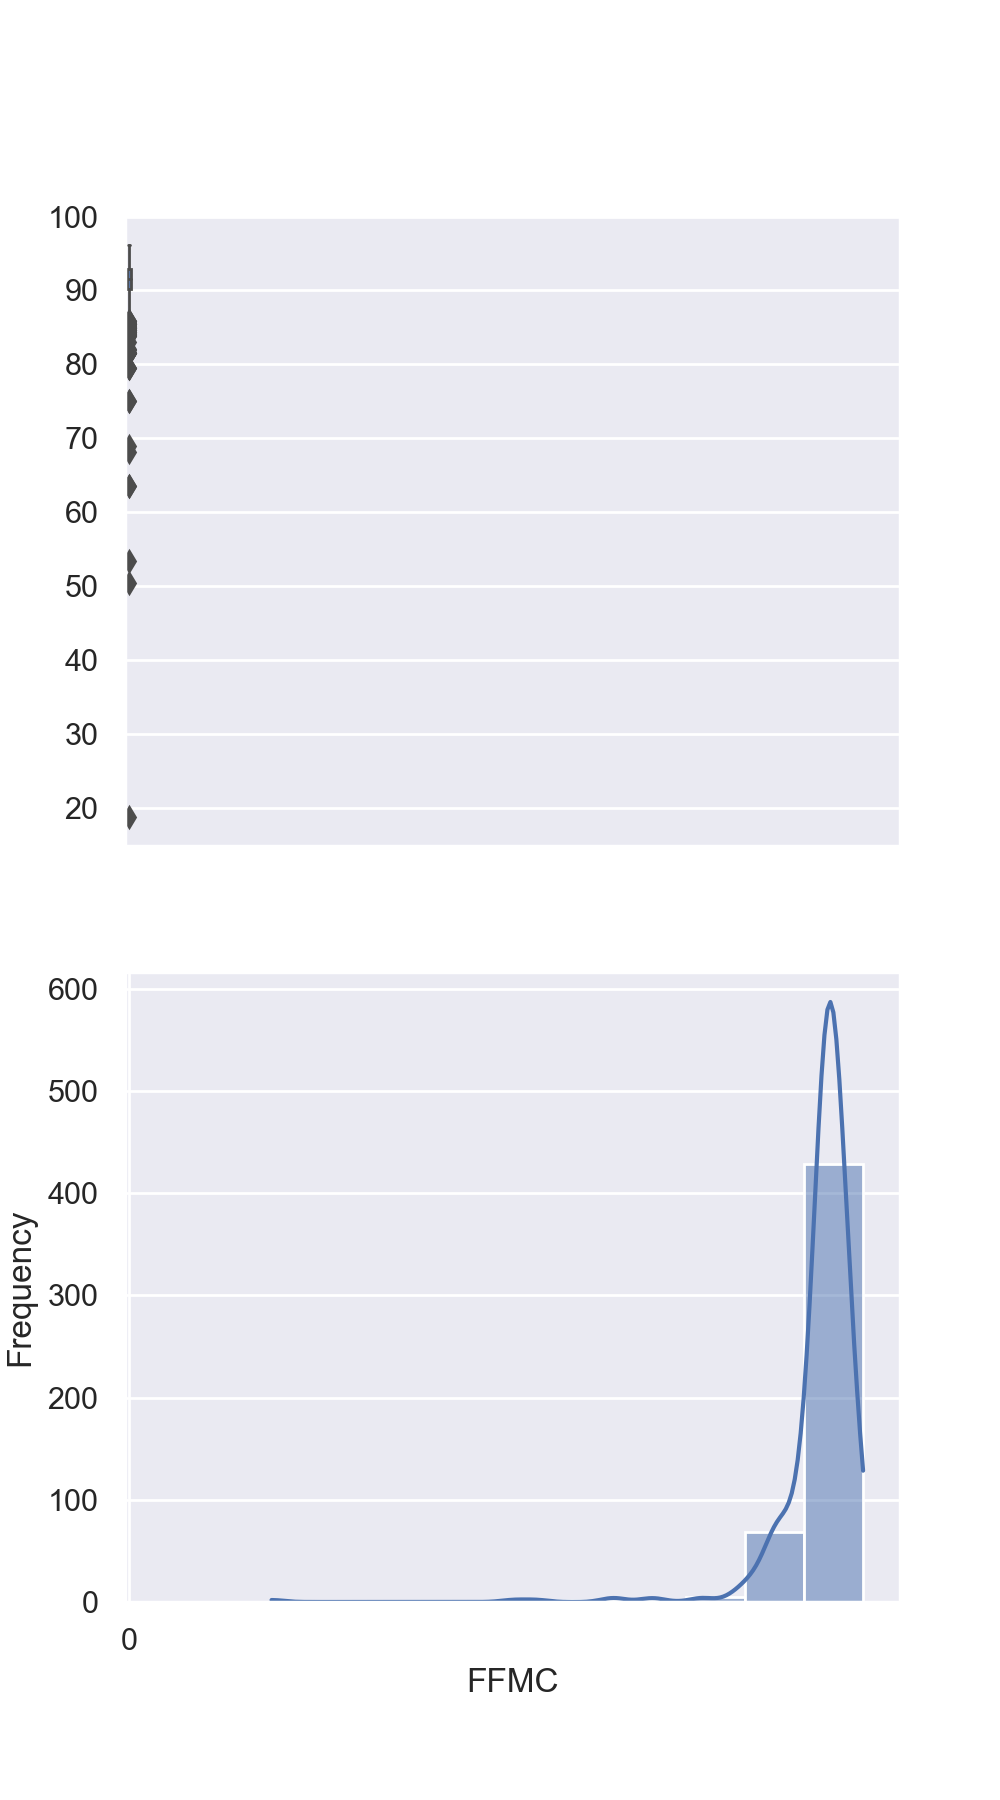

<Figure size 500x900 with 0 Axes>

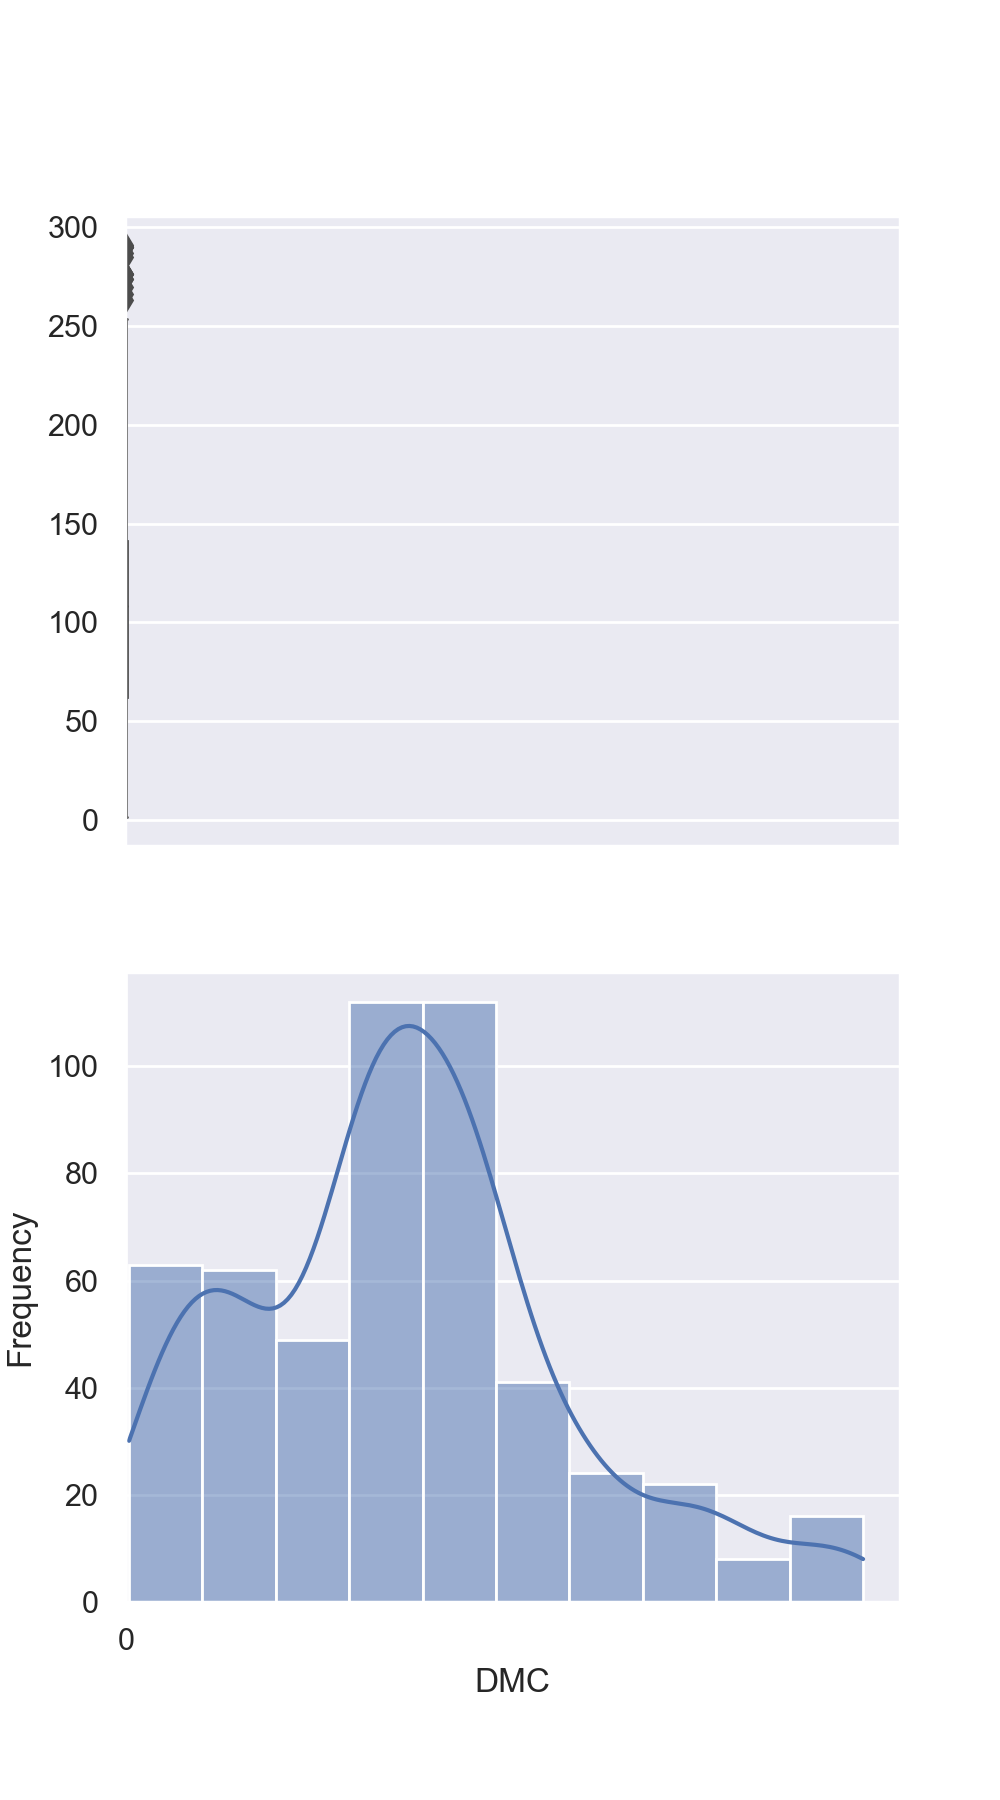

<Figure size 500x900 with 0 Axes>

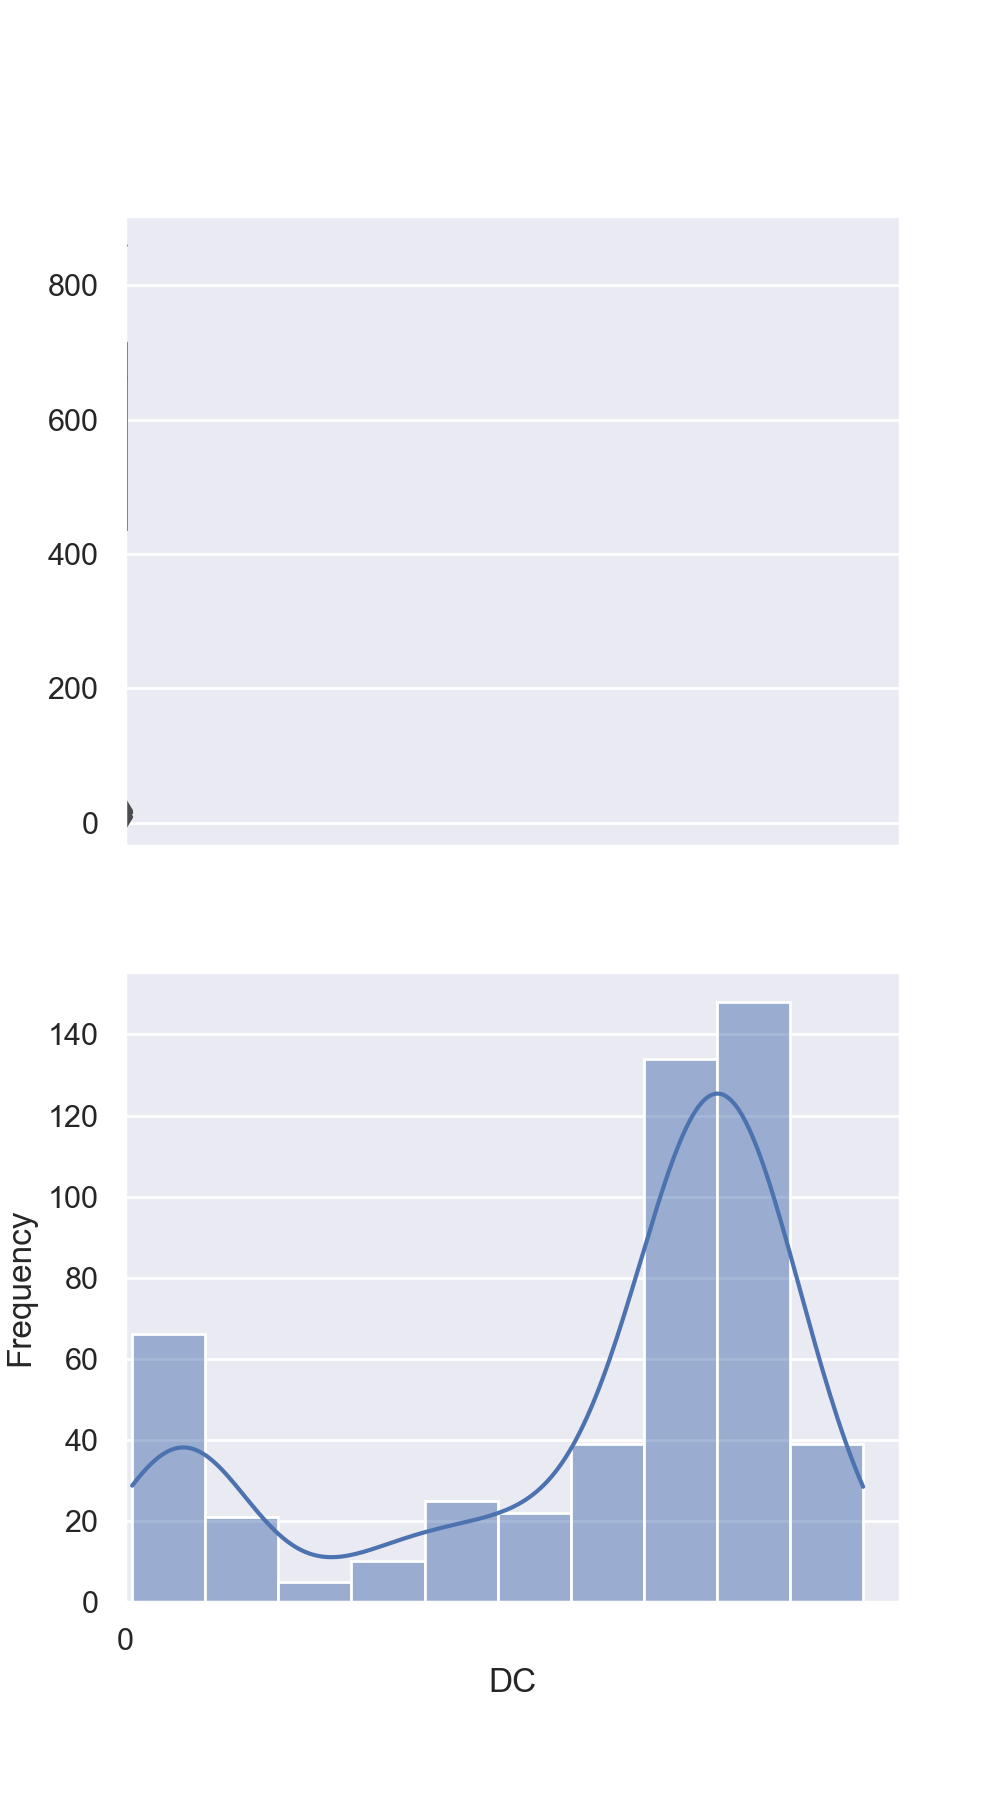

<Figure size 500x900 with 0 Axes>

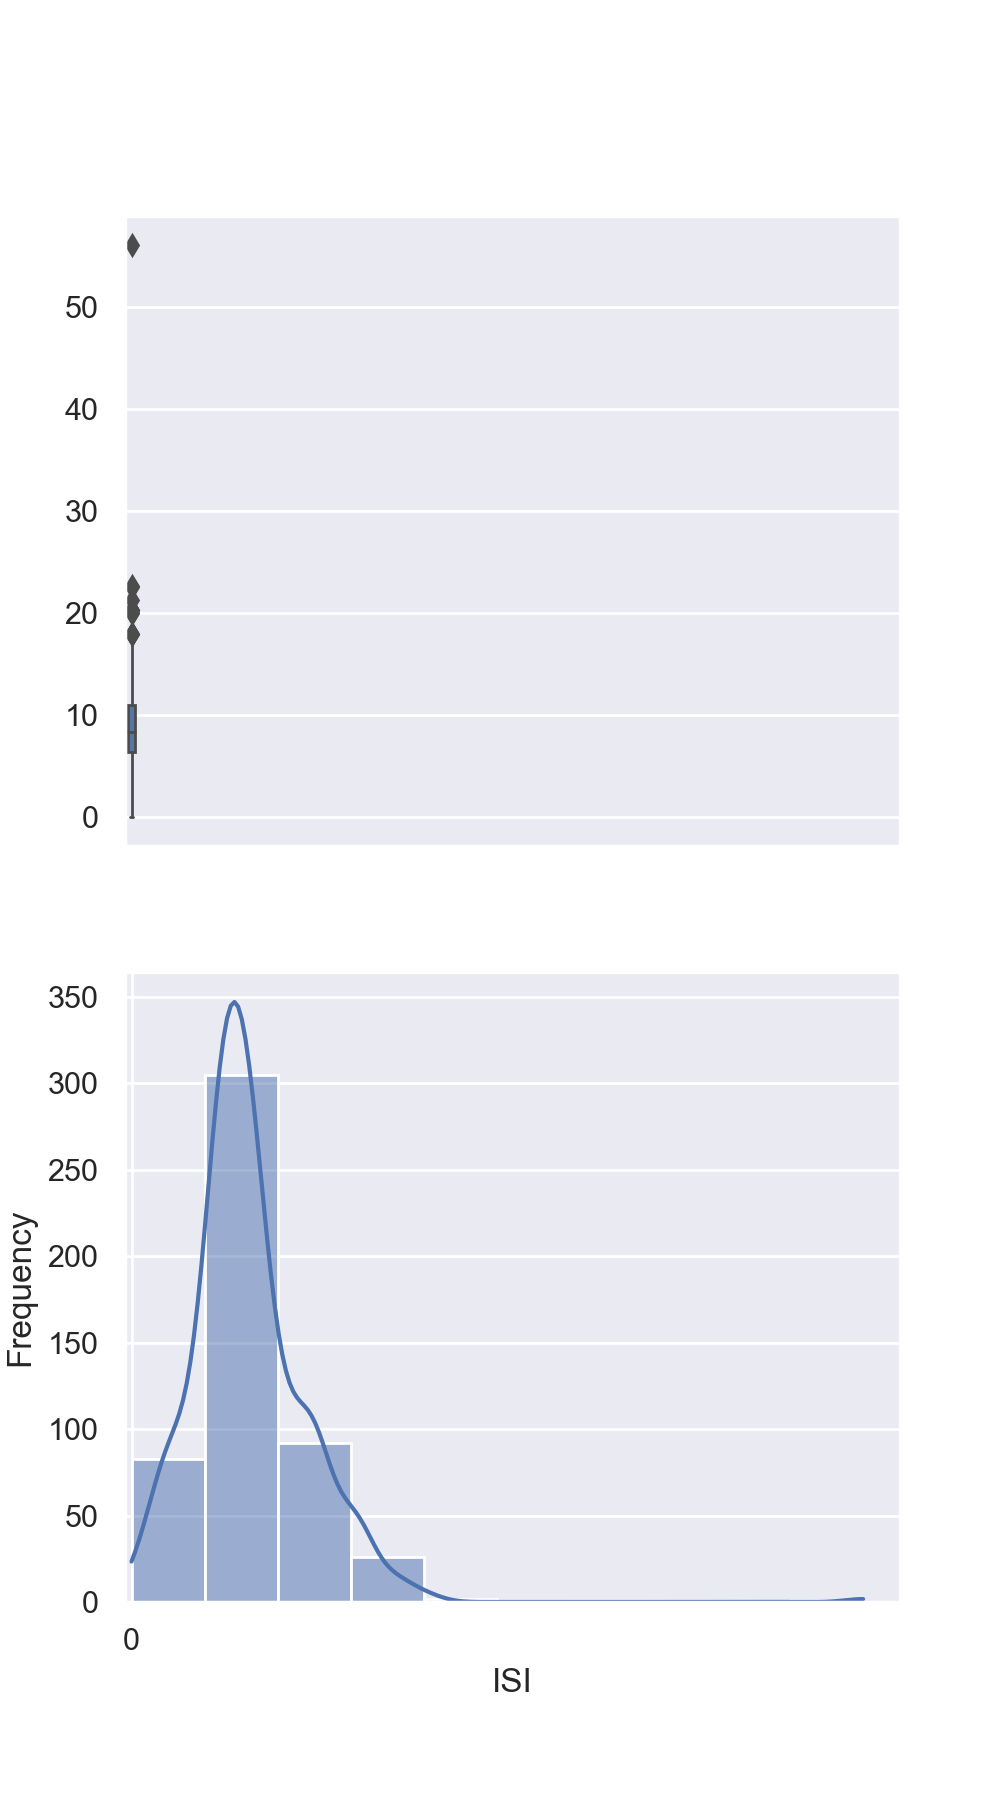

<Figure size 500x900 with 0 Axes>

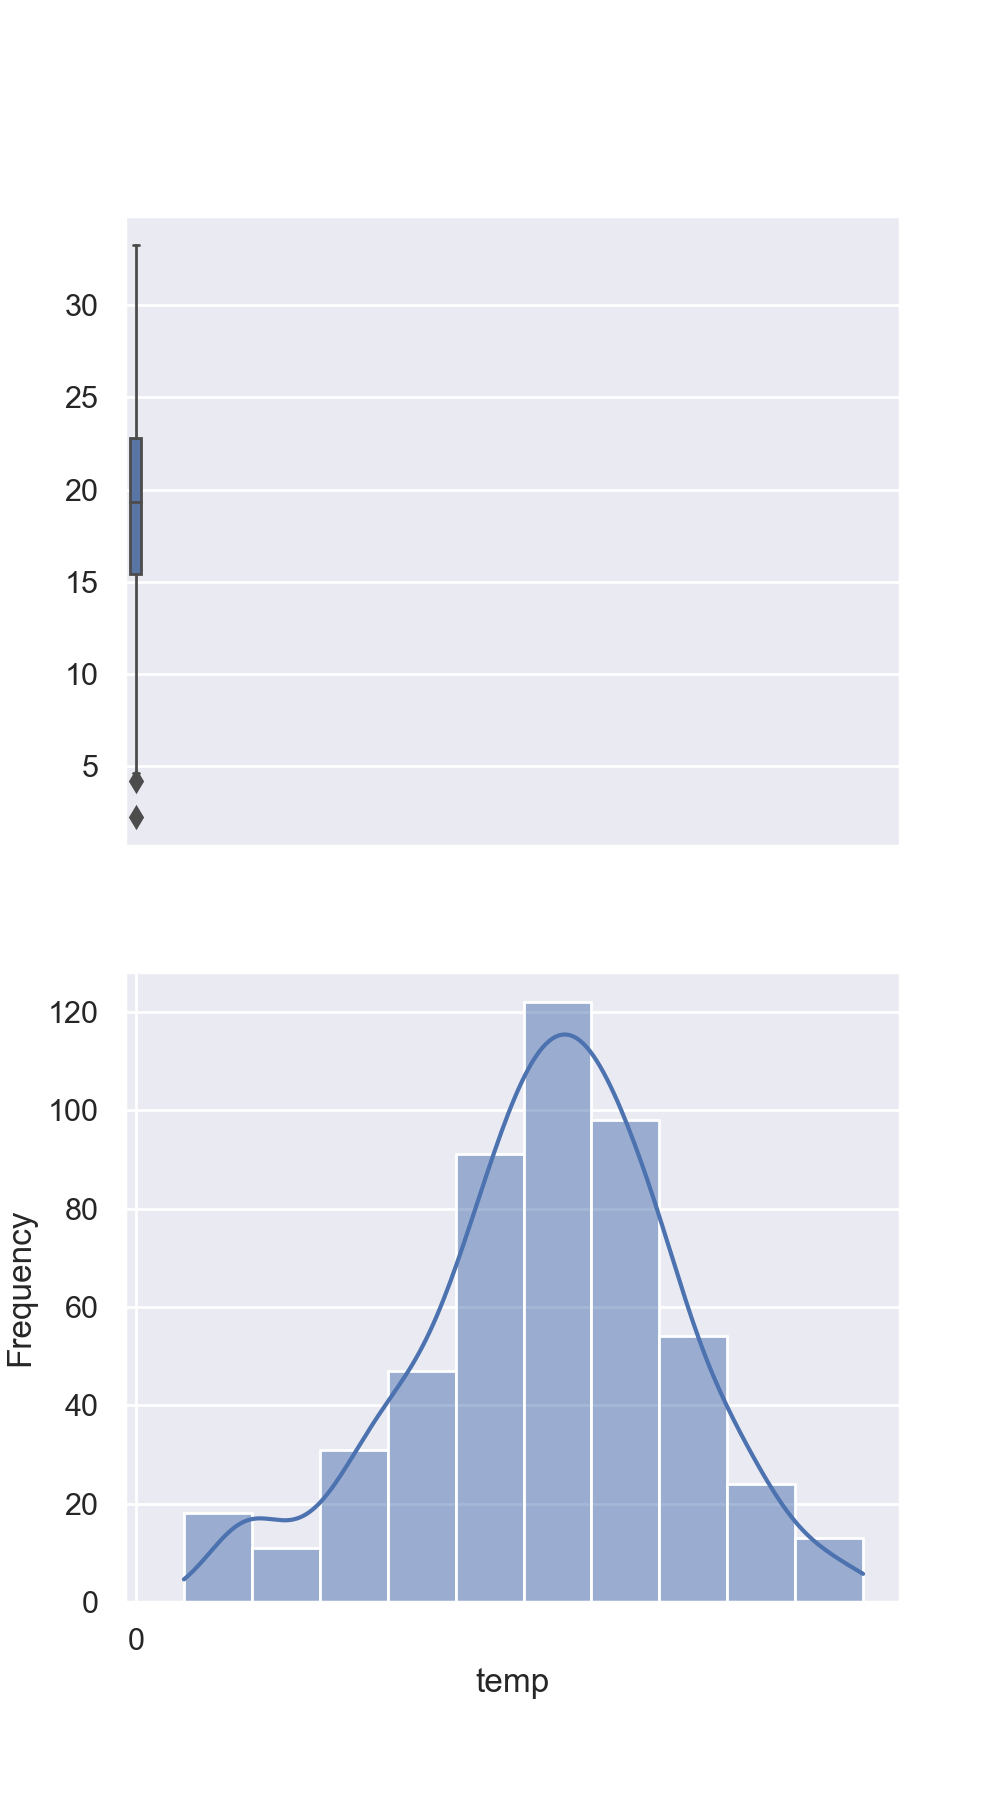

<Figure size 500x900 with 0 Axes>

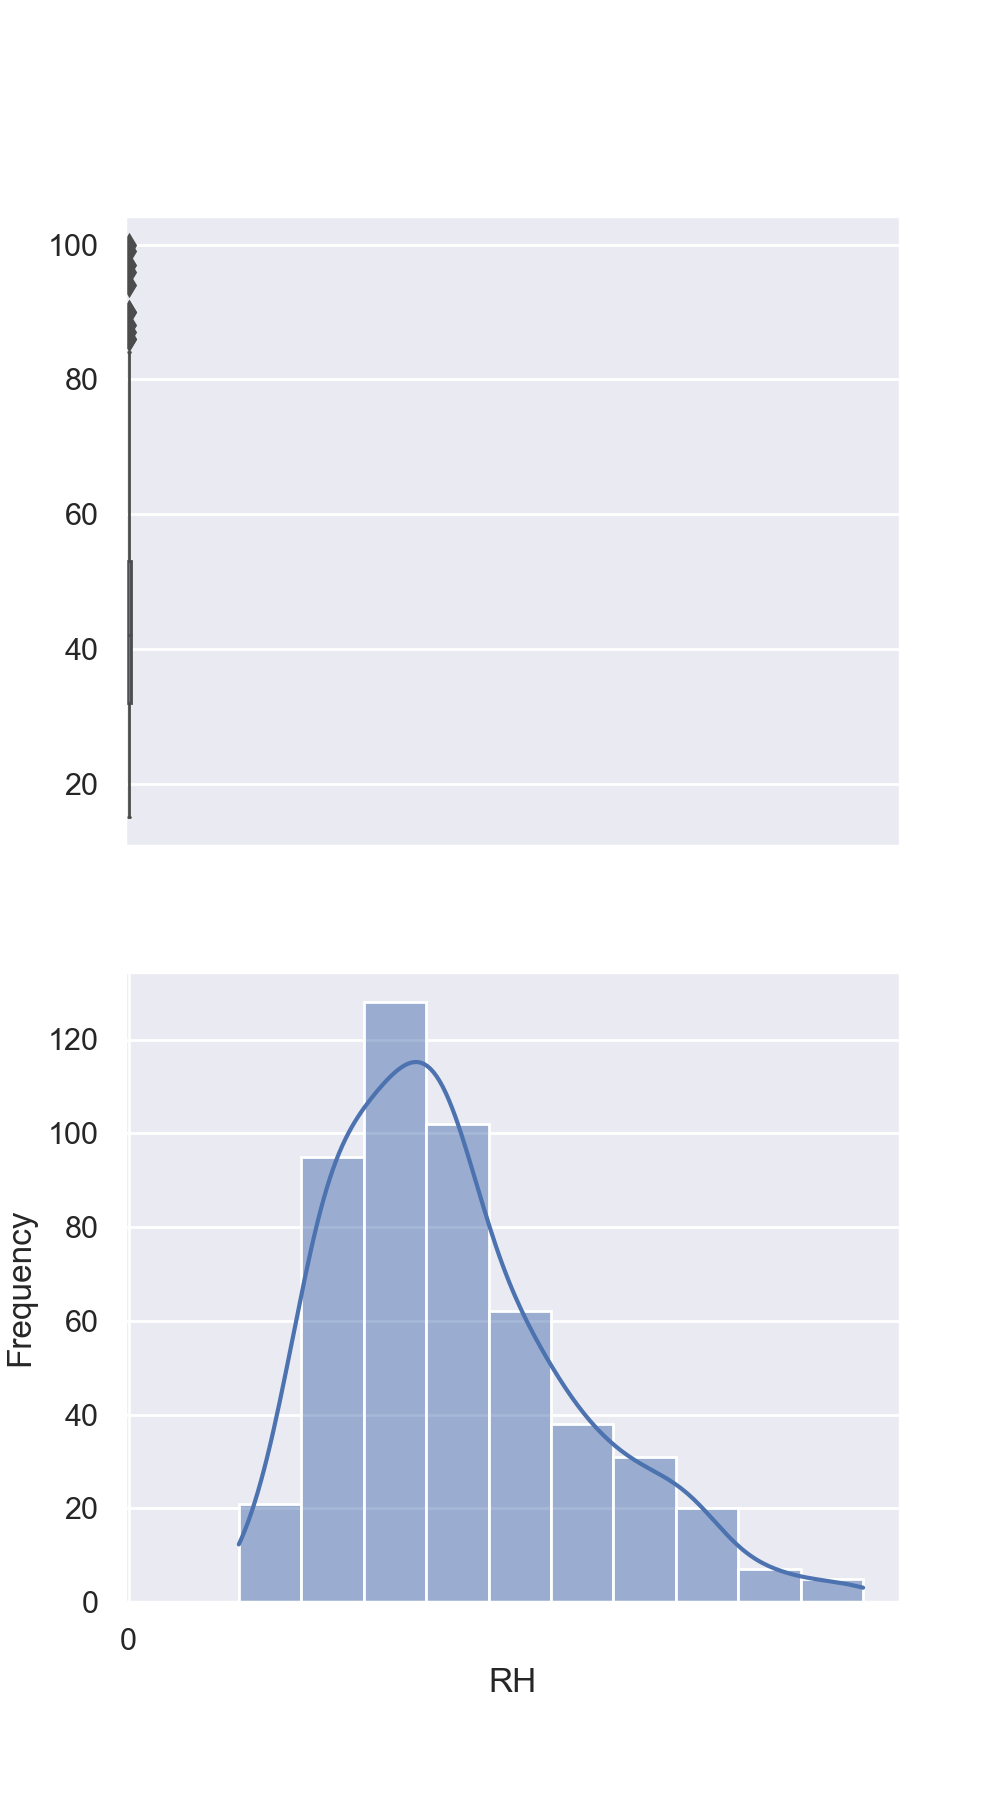

<Figure size 500x900 with 0 Axes>

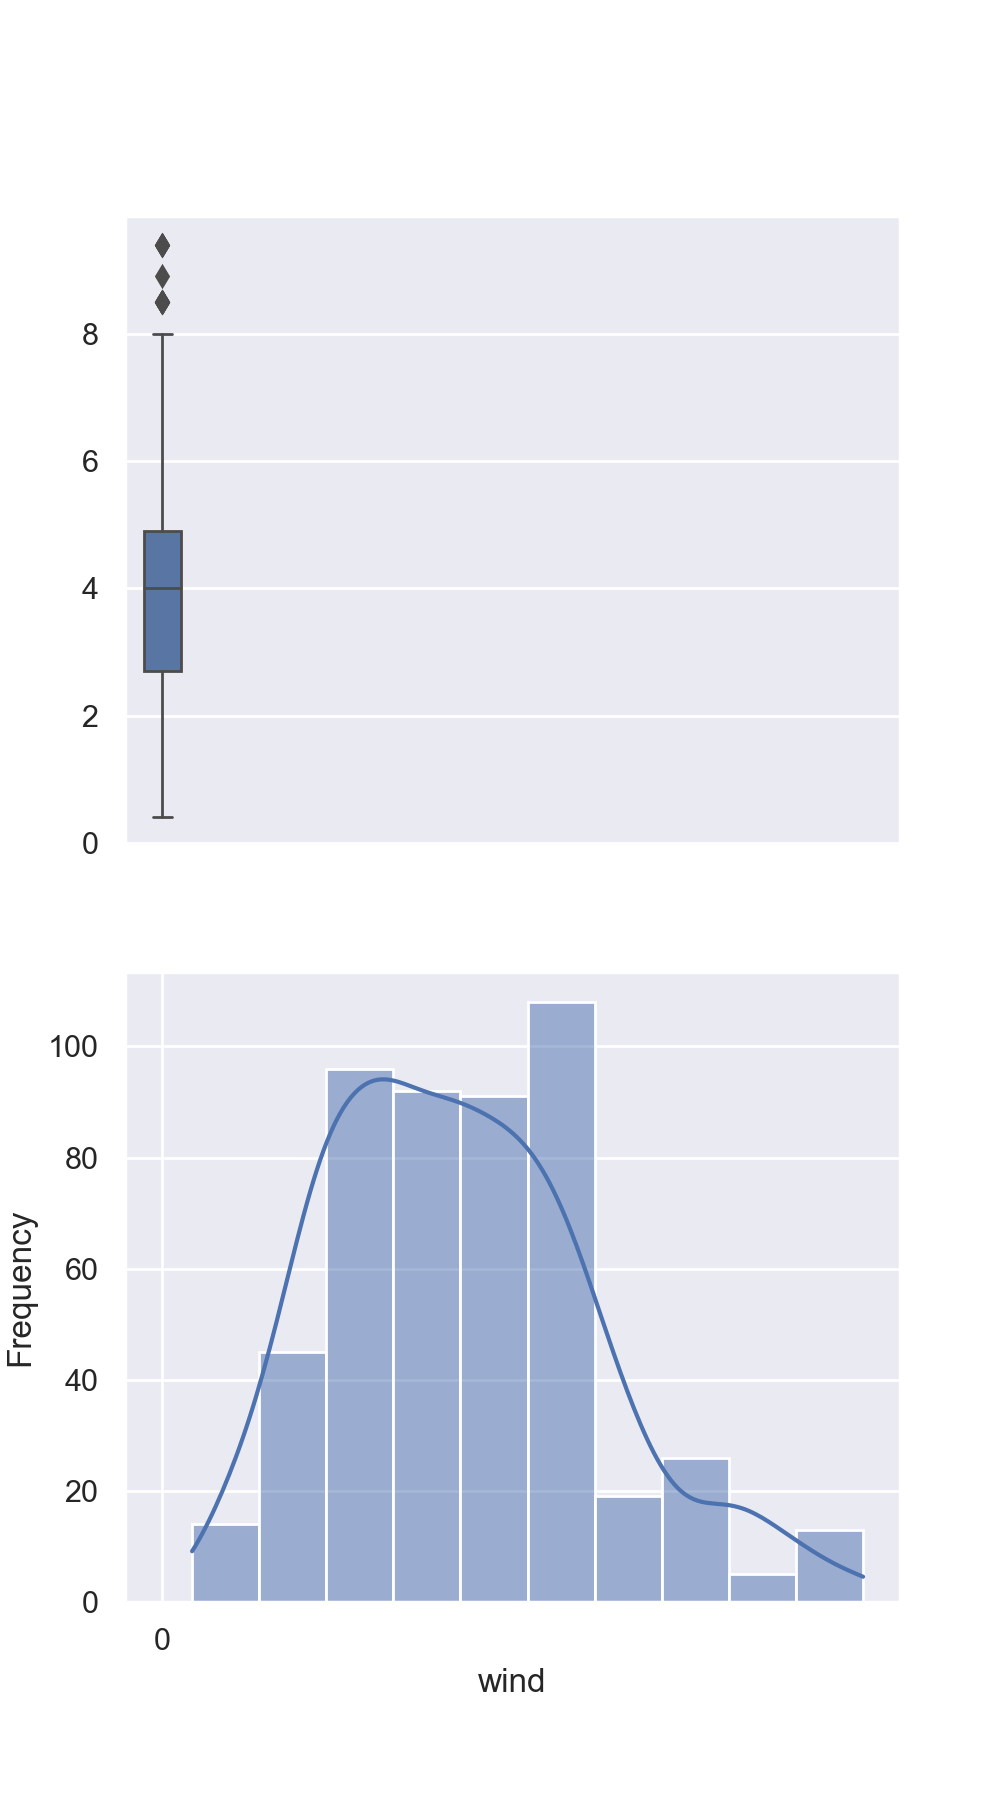

<Figure size 500x900 with 0 Axes>

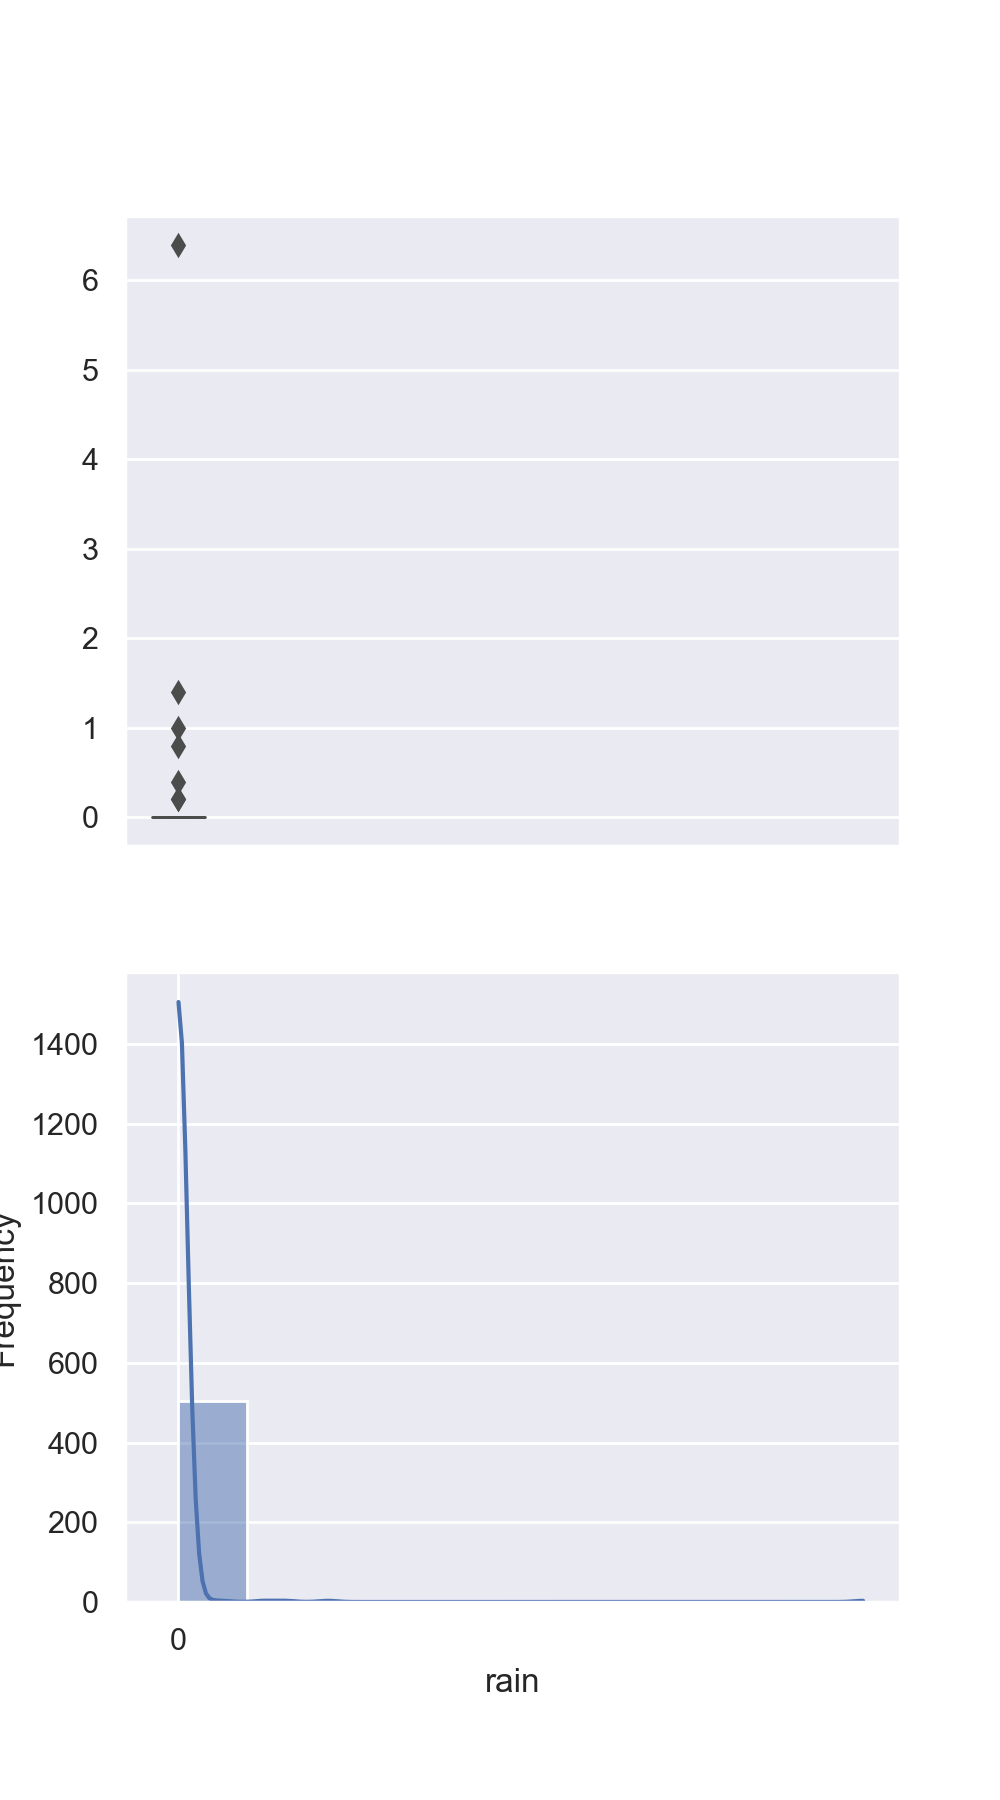

<Figure size 500x900 with 0 Axes>

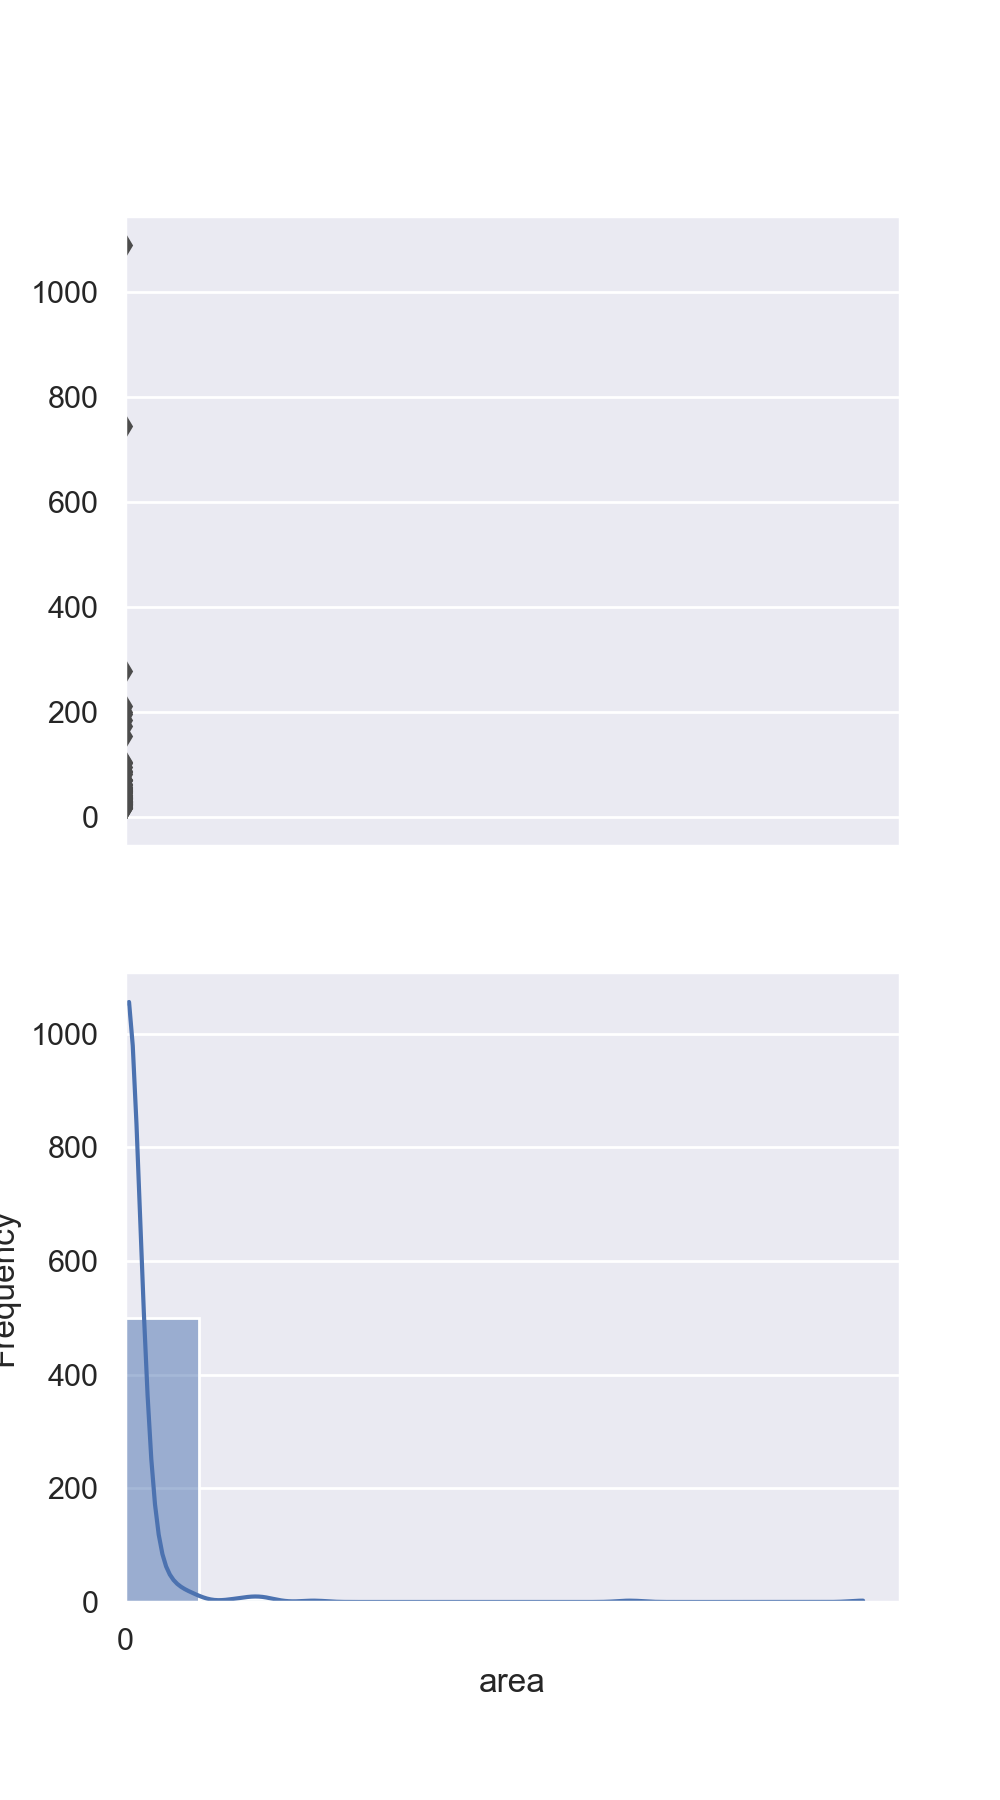

<Figure size 500x900 with 0 Axes>

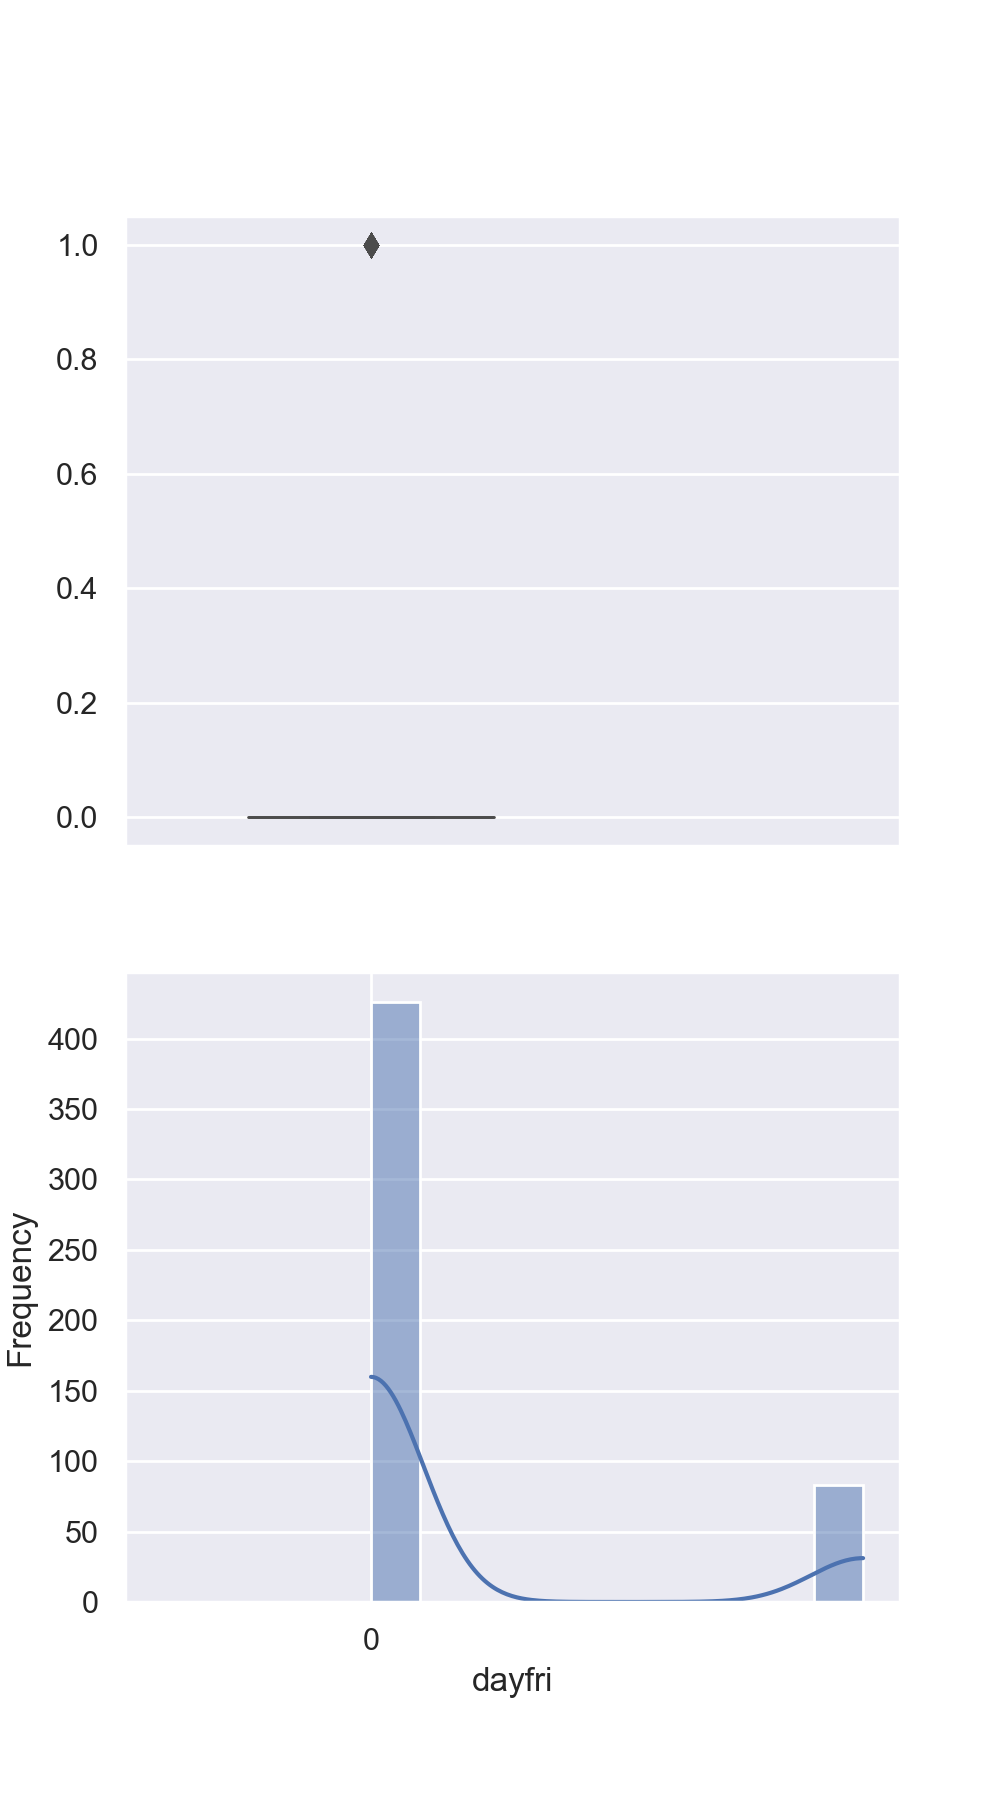

<Figure size 500x900 with 0 Axes>

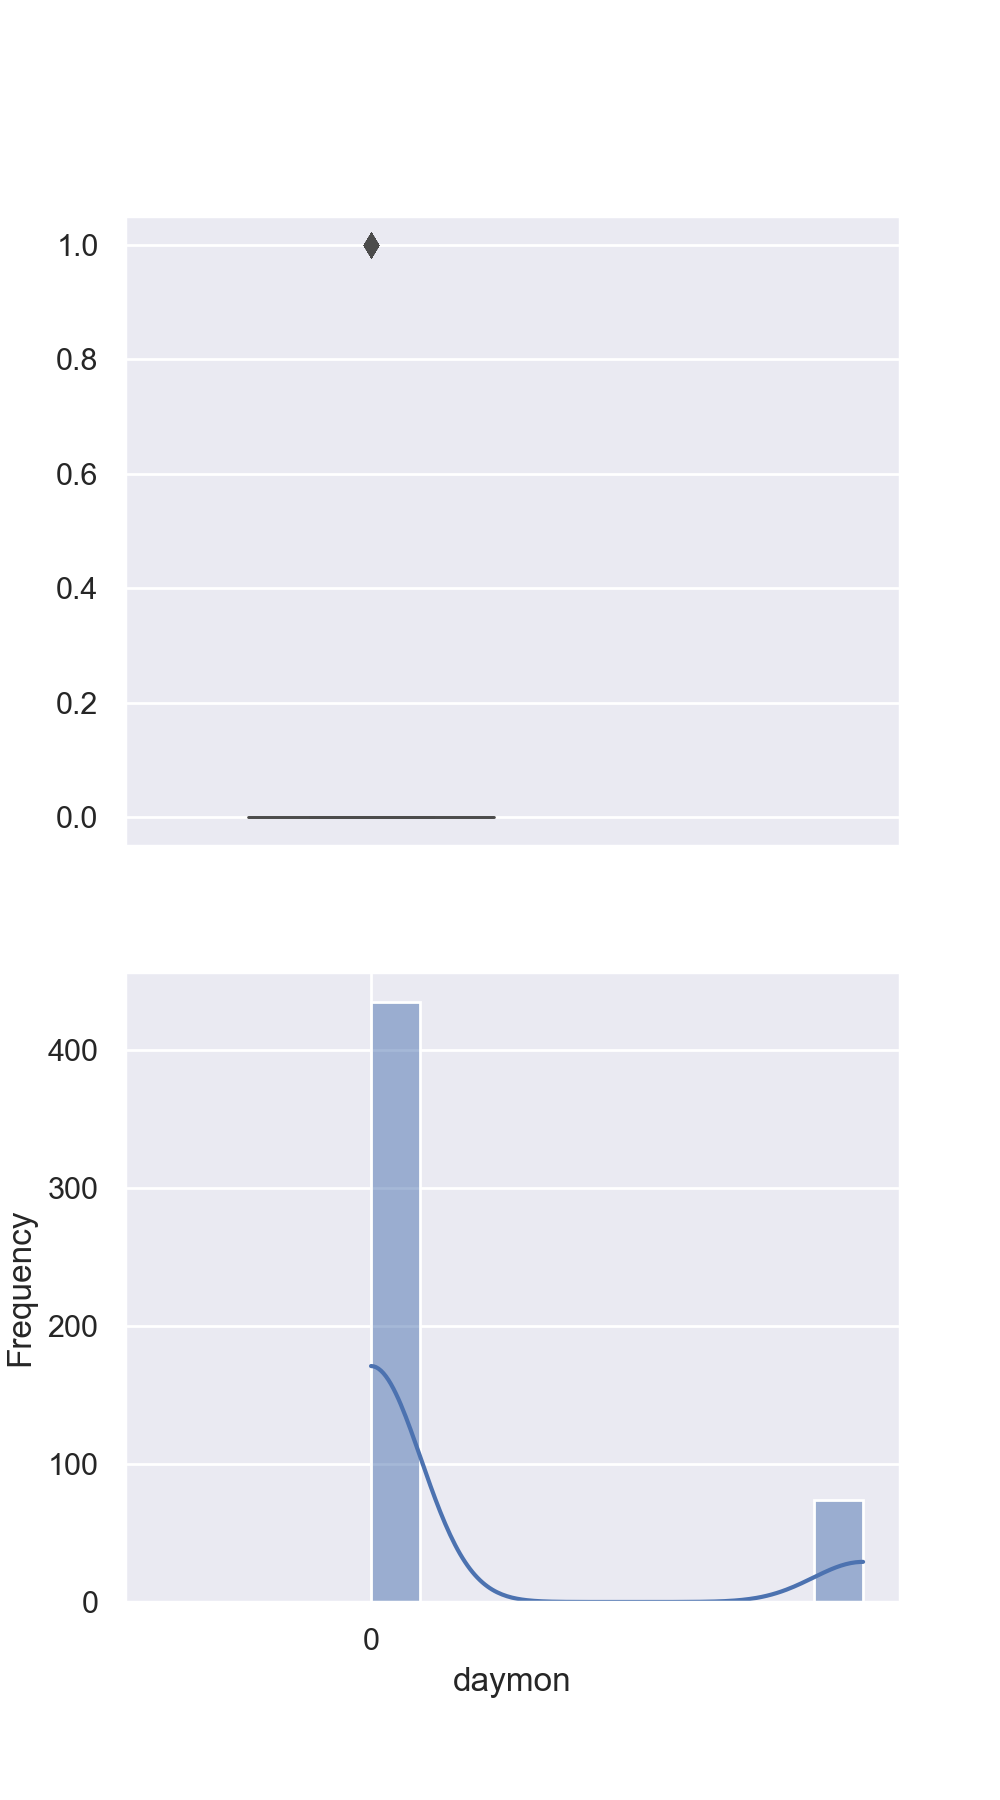

<Figure size 500x900 with 0 Axes>

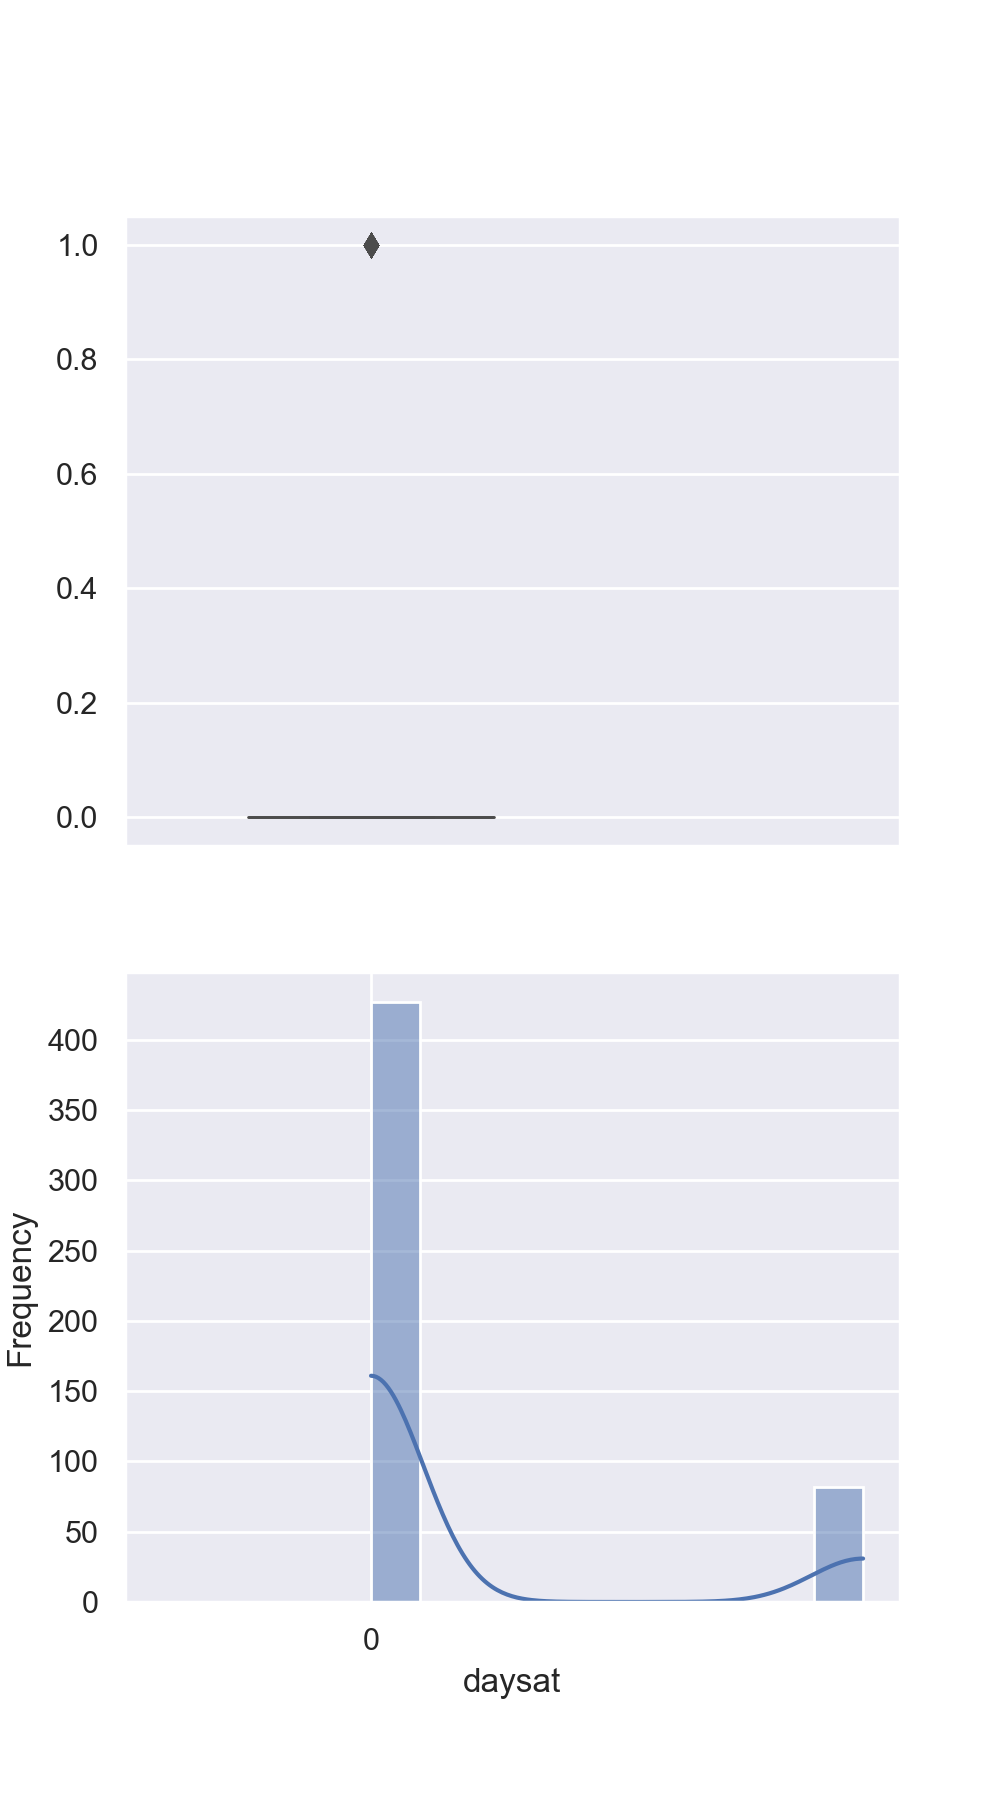

<Figure size 500x900 with 0 Axes>

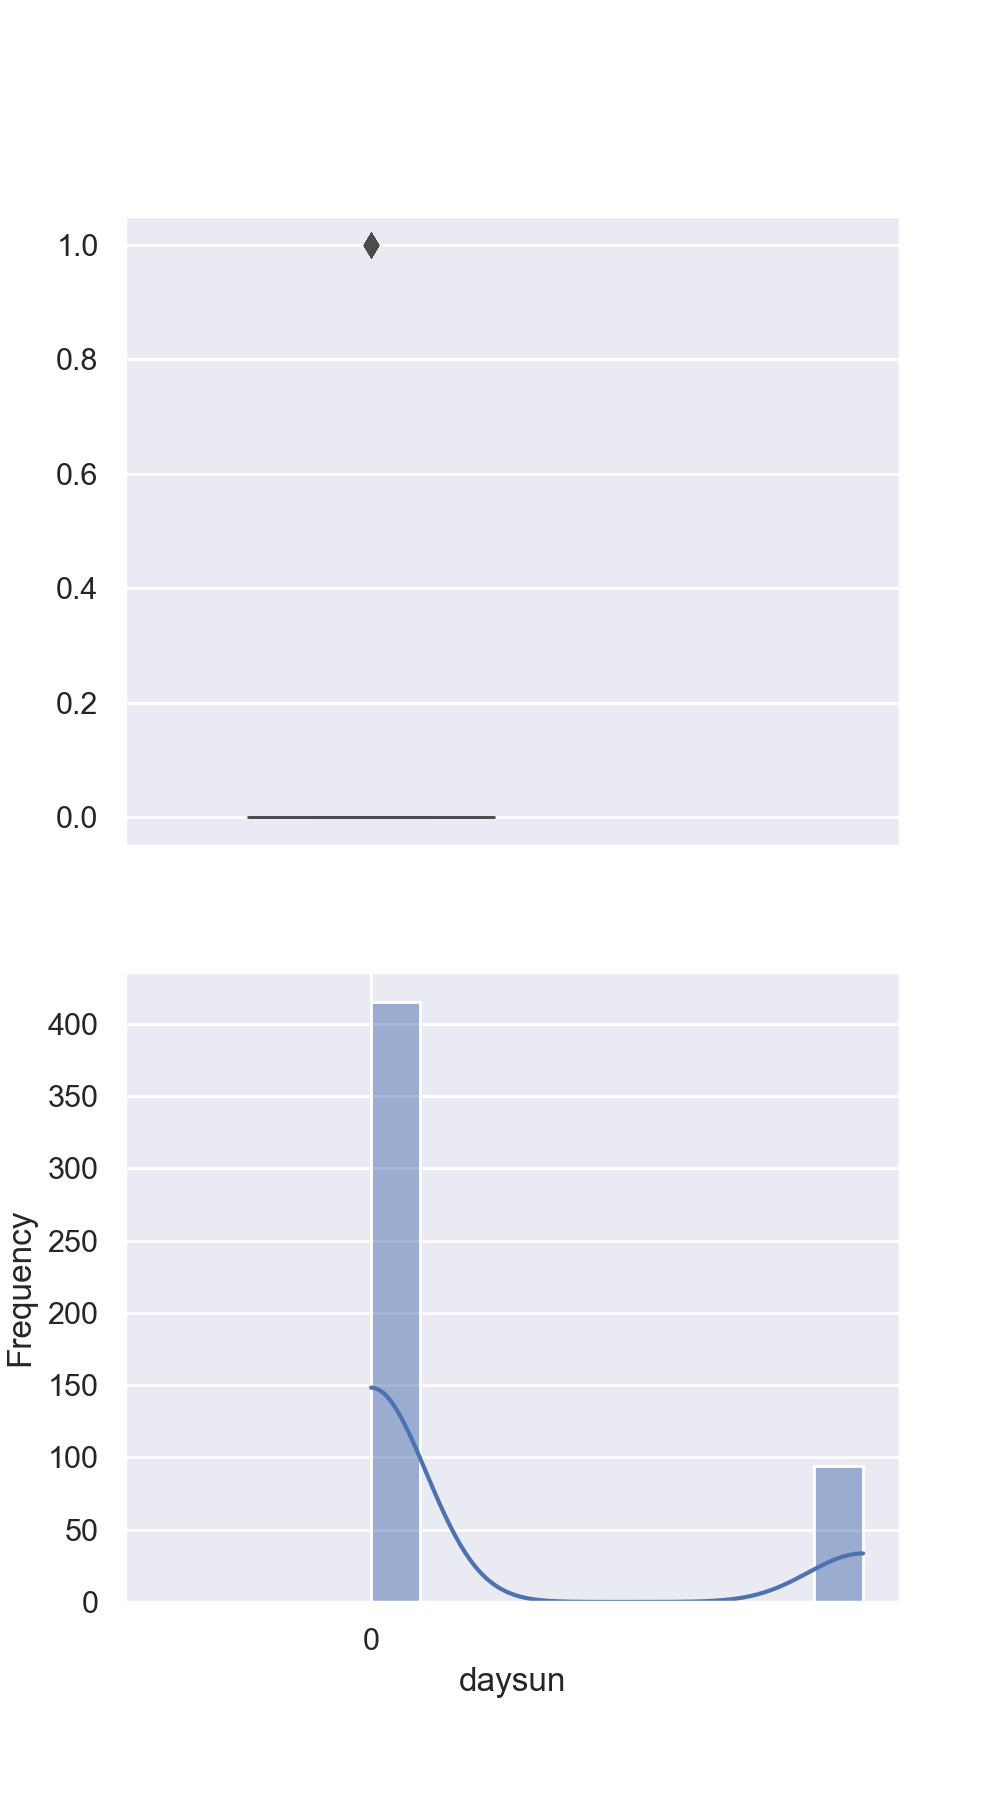

<Figure size 500x900 with 0 Axes>

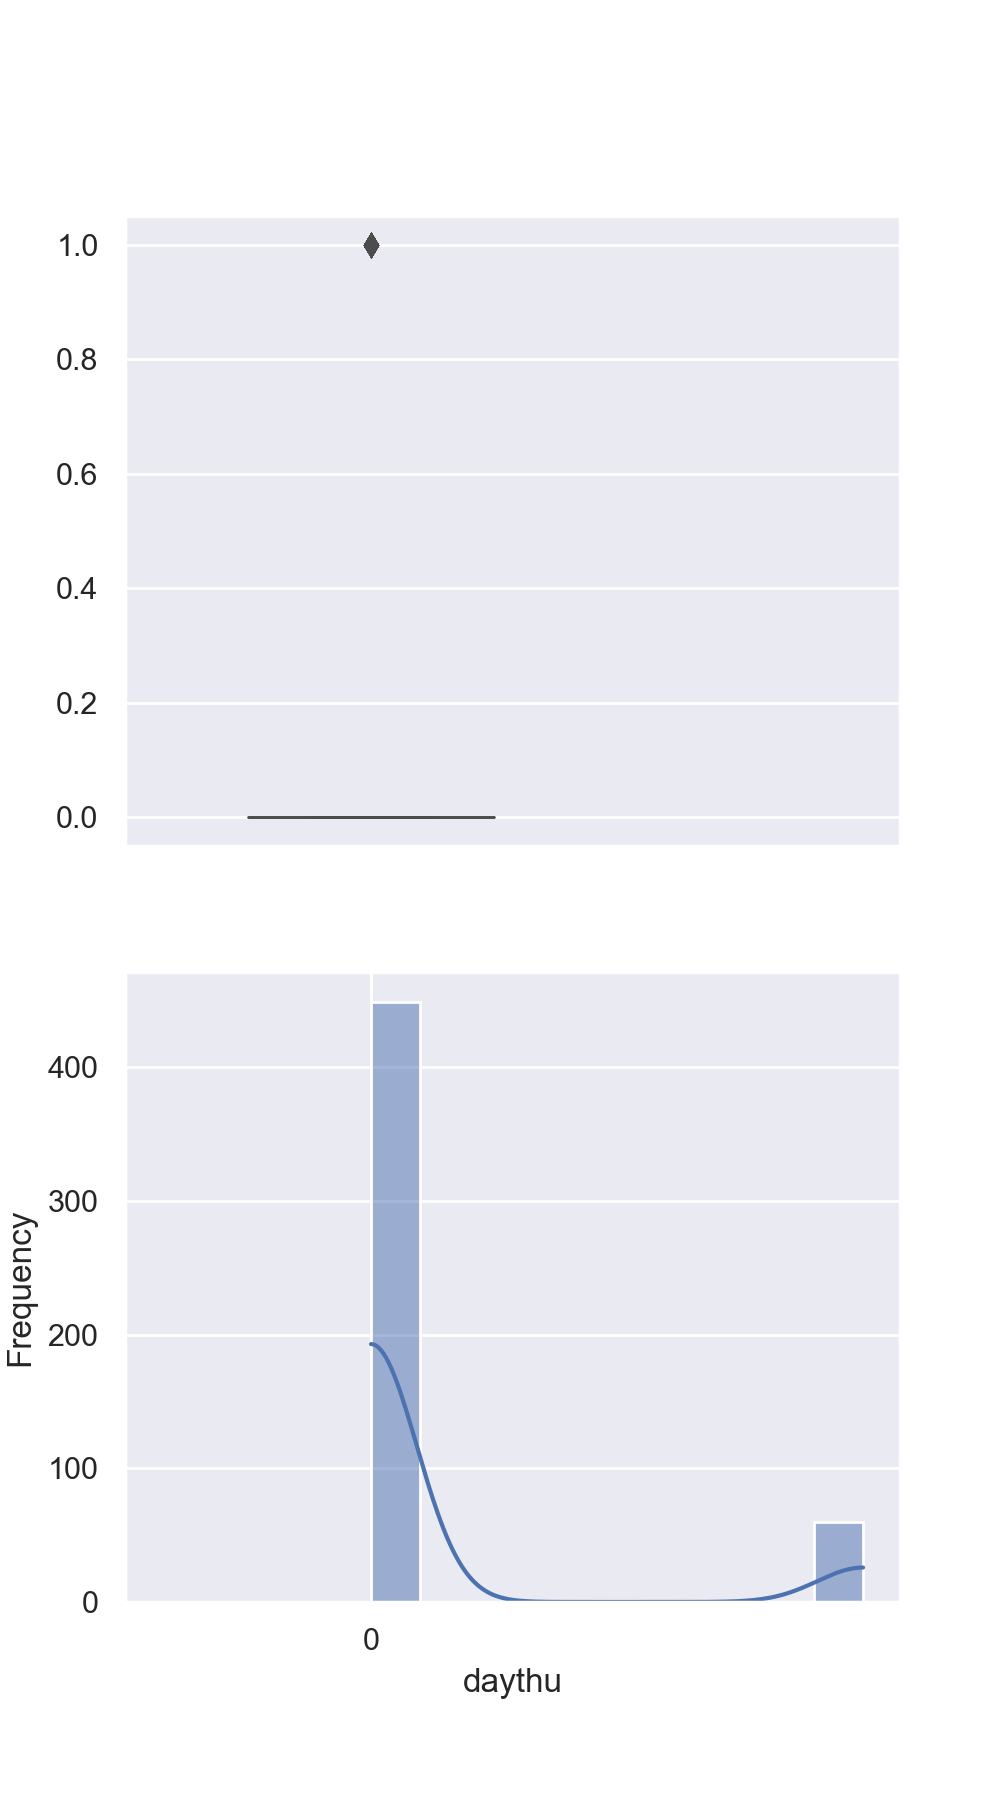

<Figure size 500x900 with 0 Axes>

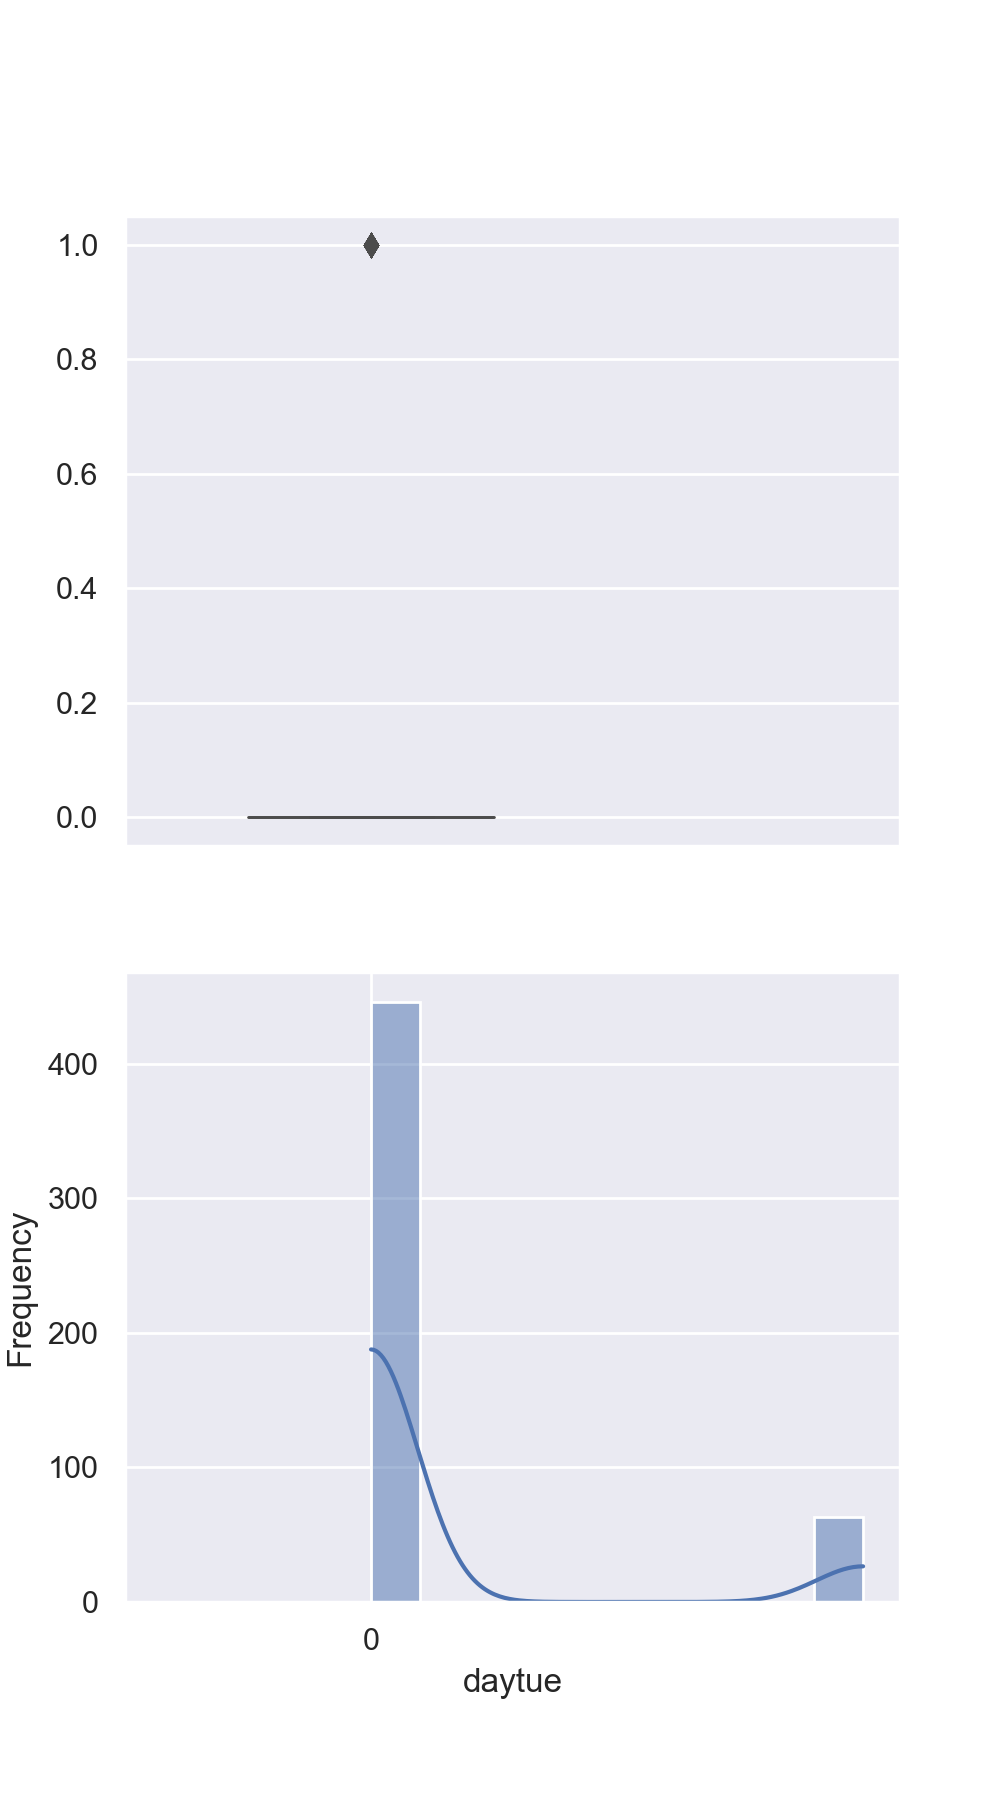

<Figure size 500x900 with 0 Axes>

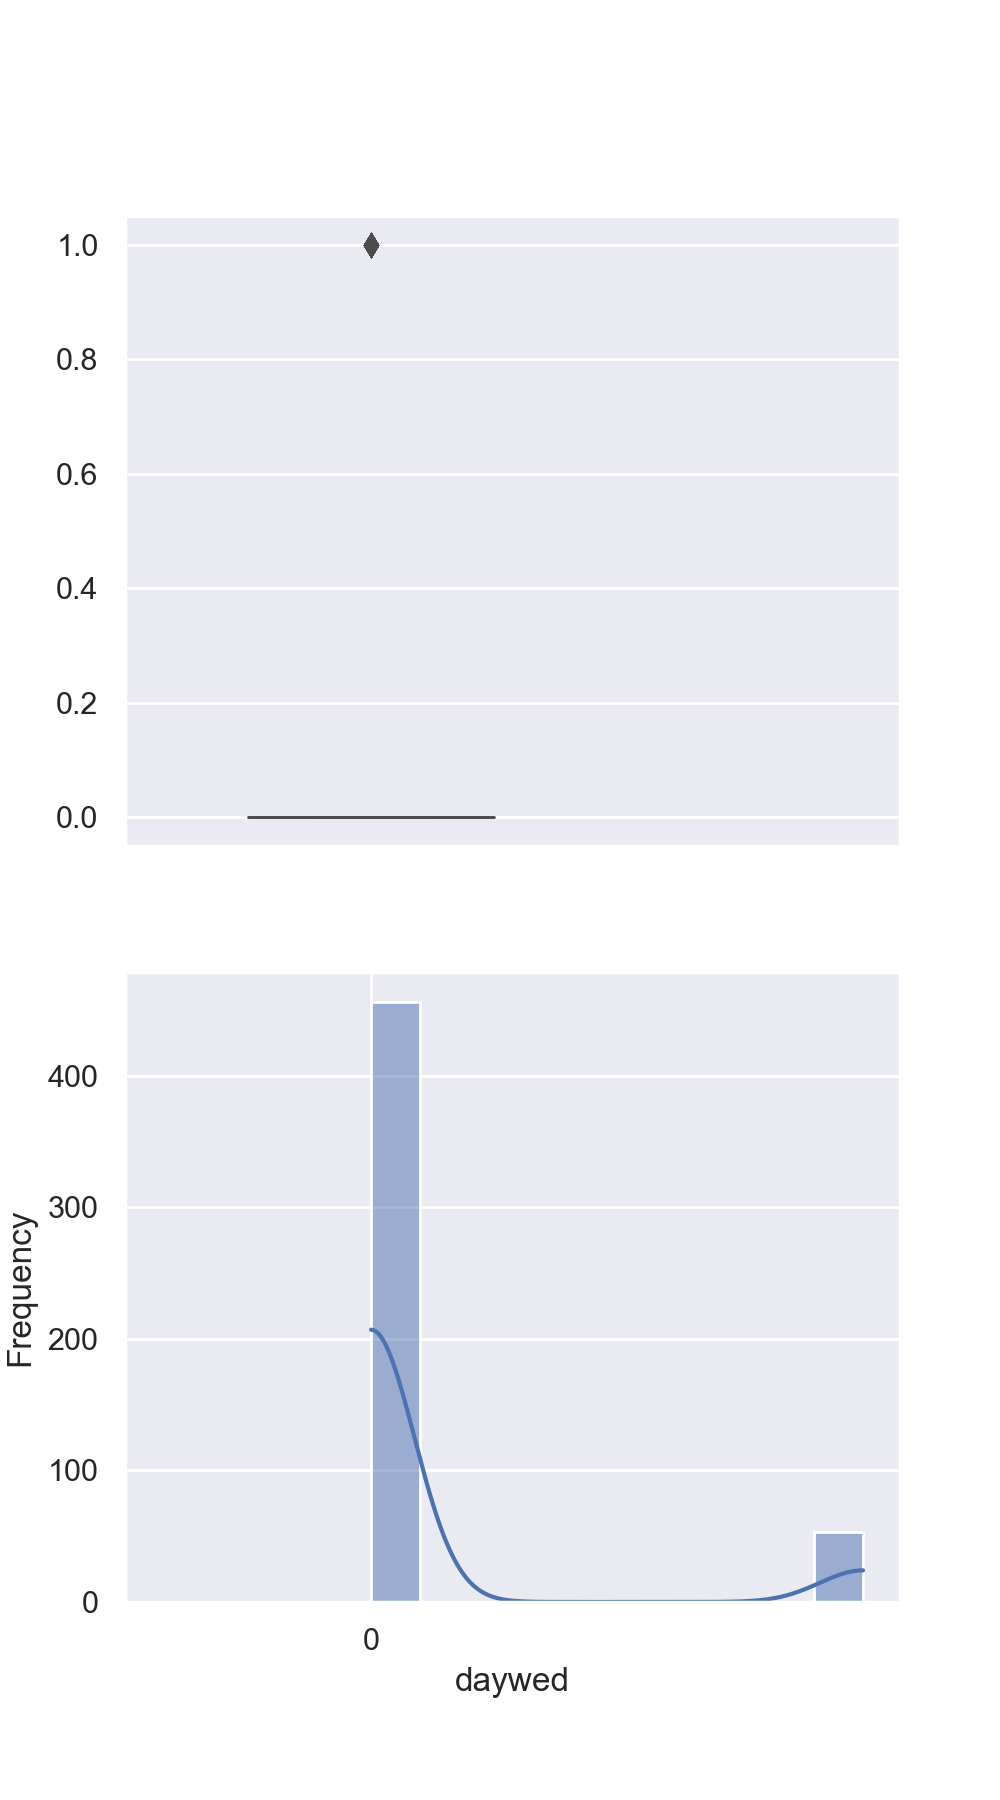

<Figure size 500x900 with 0 Axes>

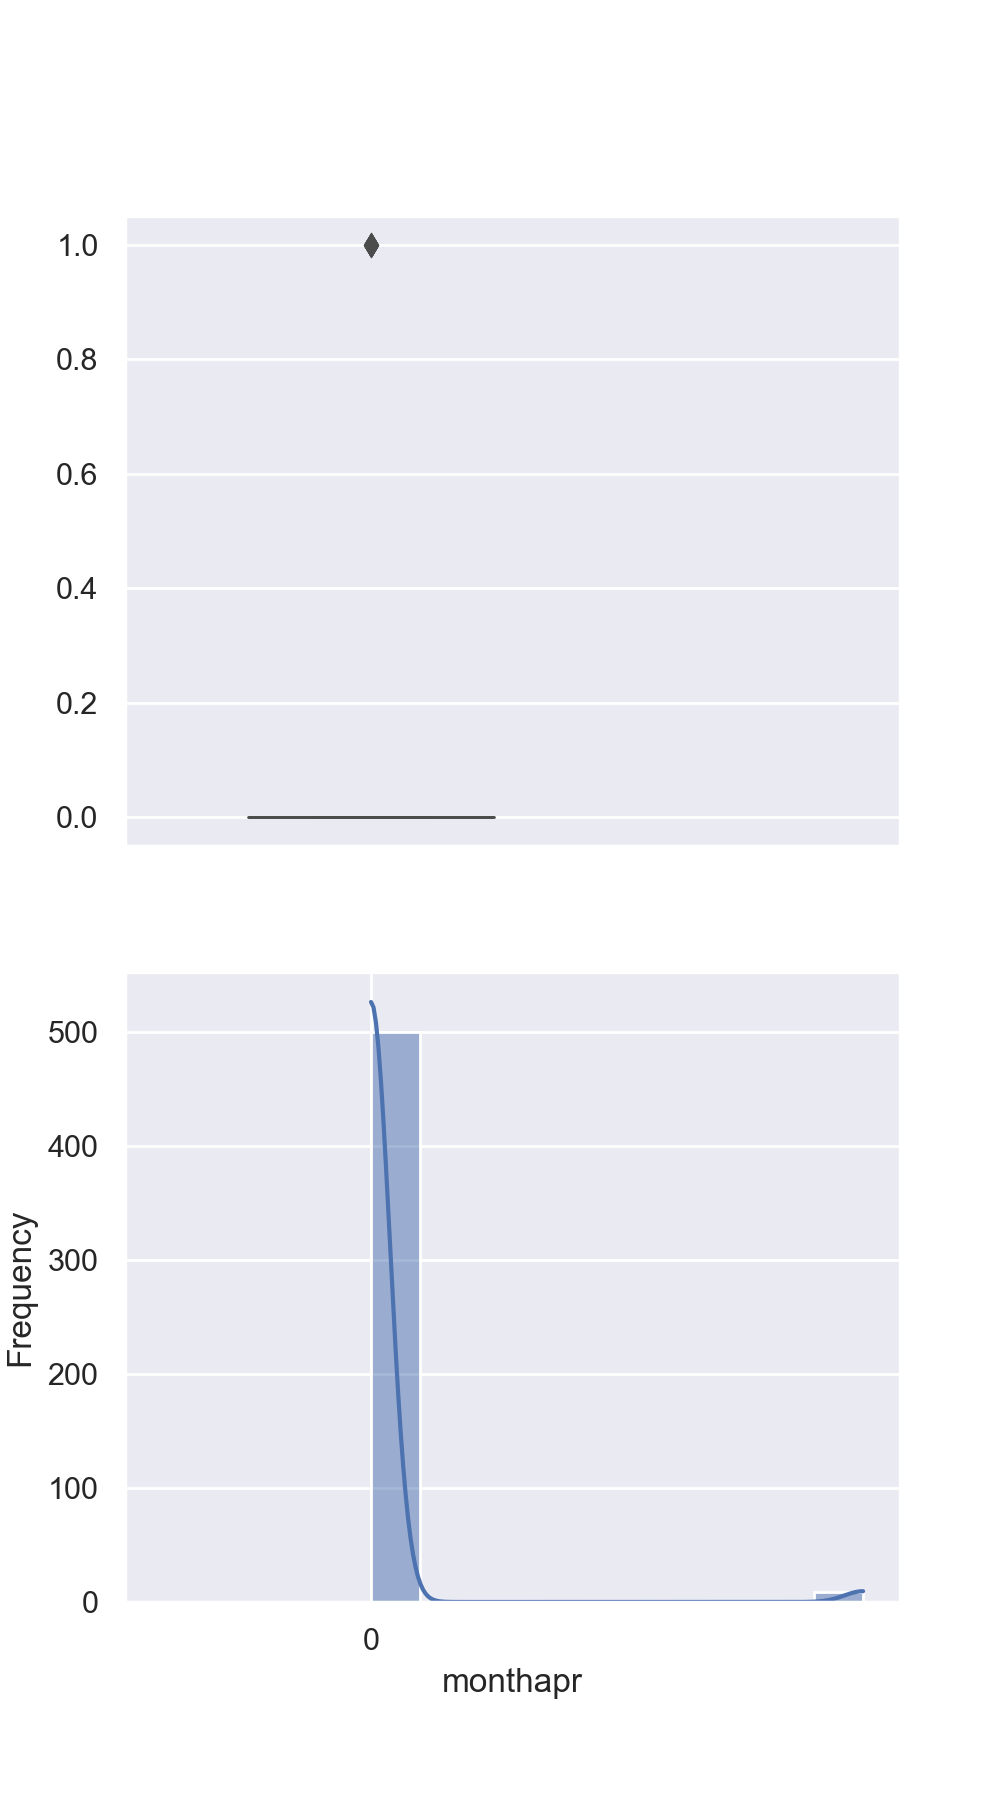

<Figure size 500x900 with 0 Axes>

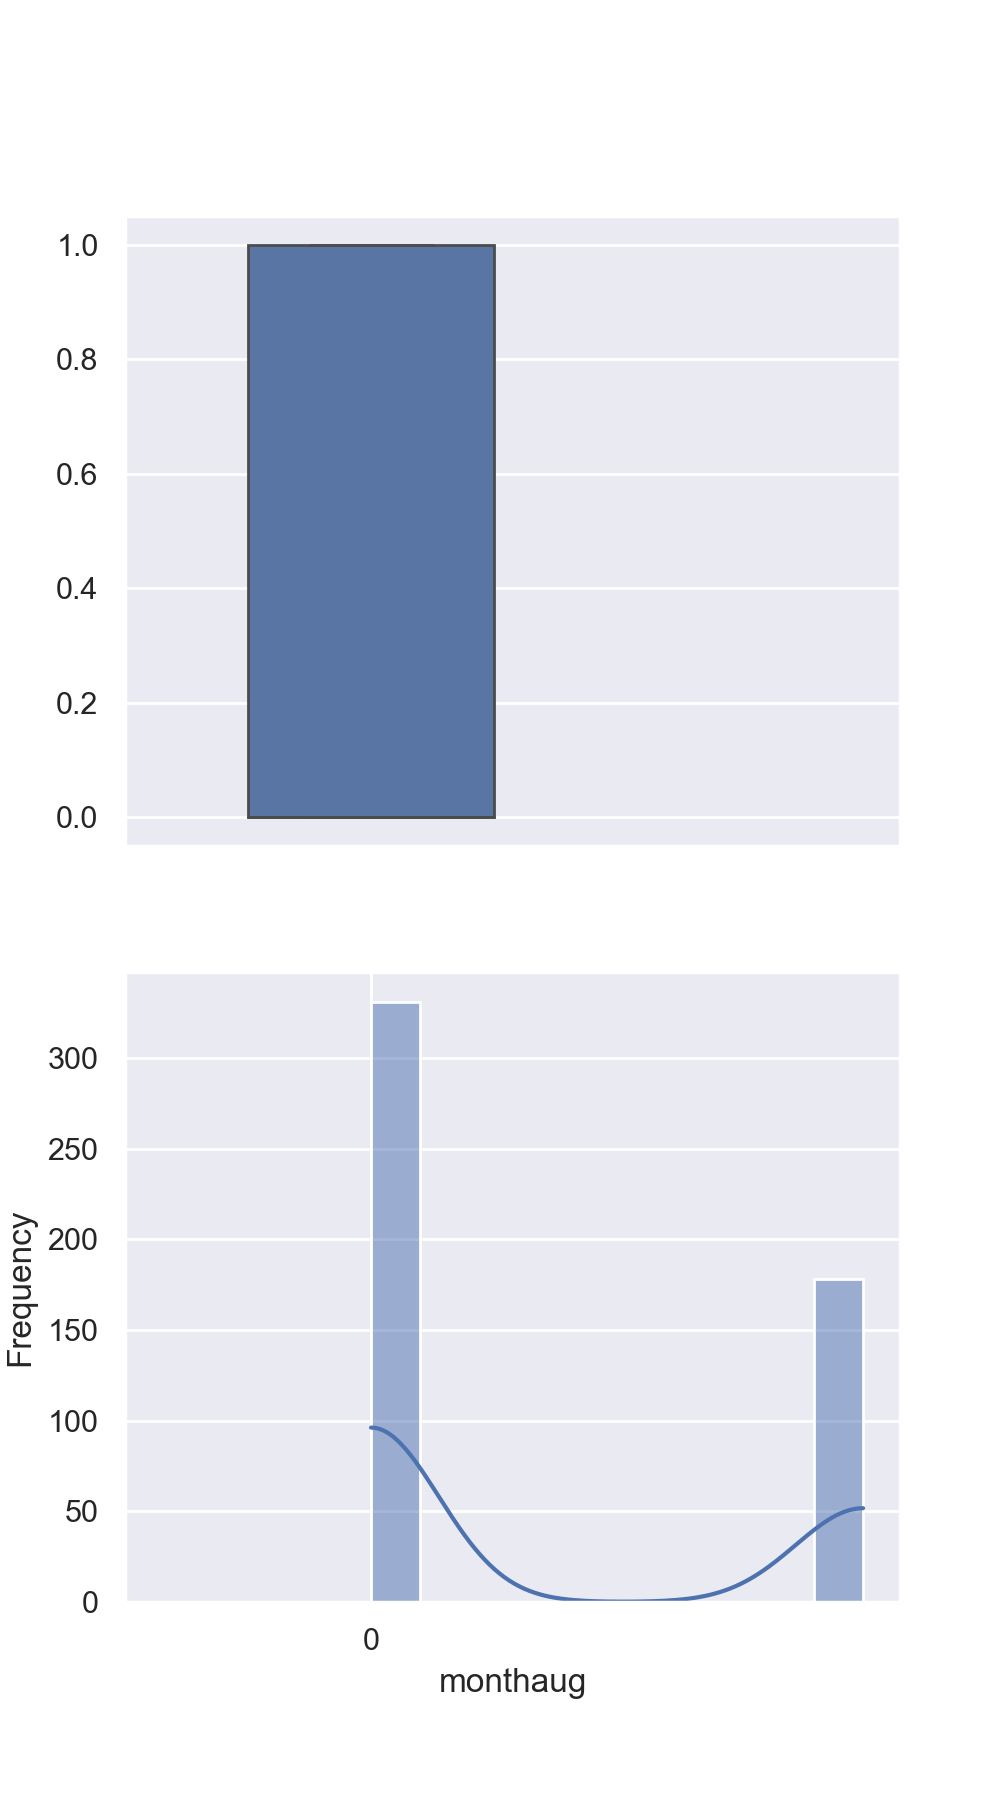

<Figure size 500x900 with 0 Axes>

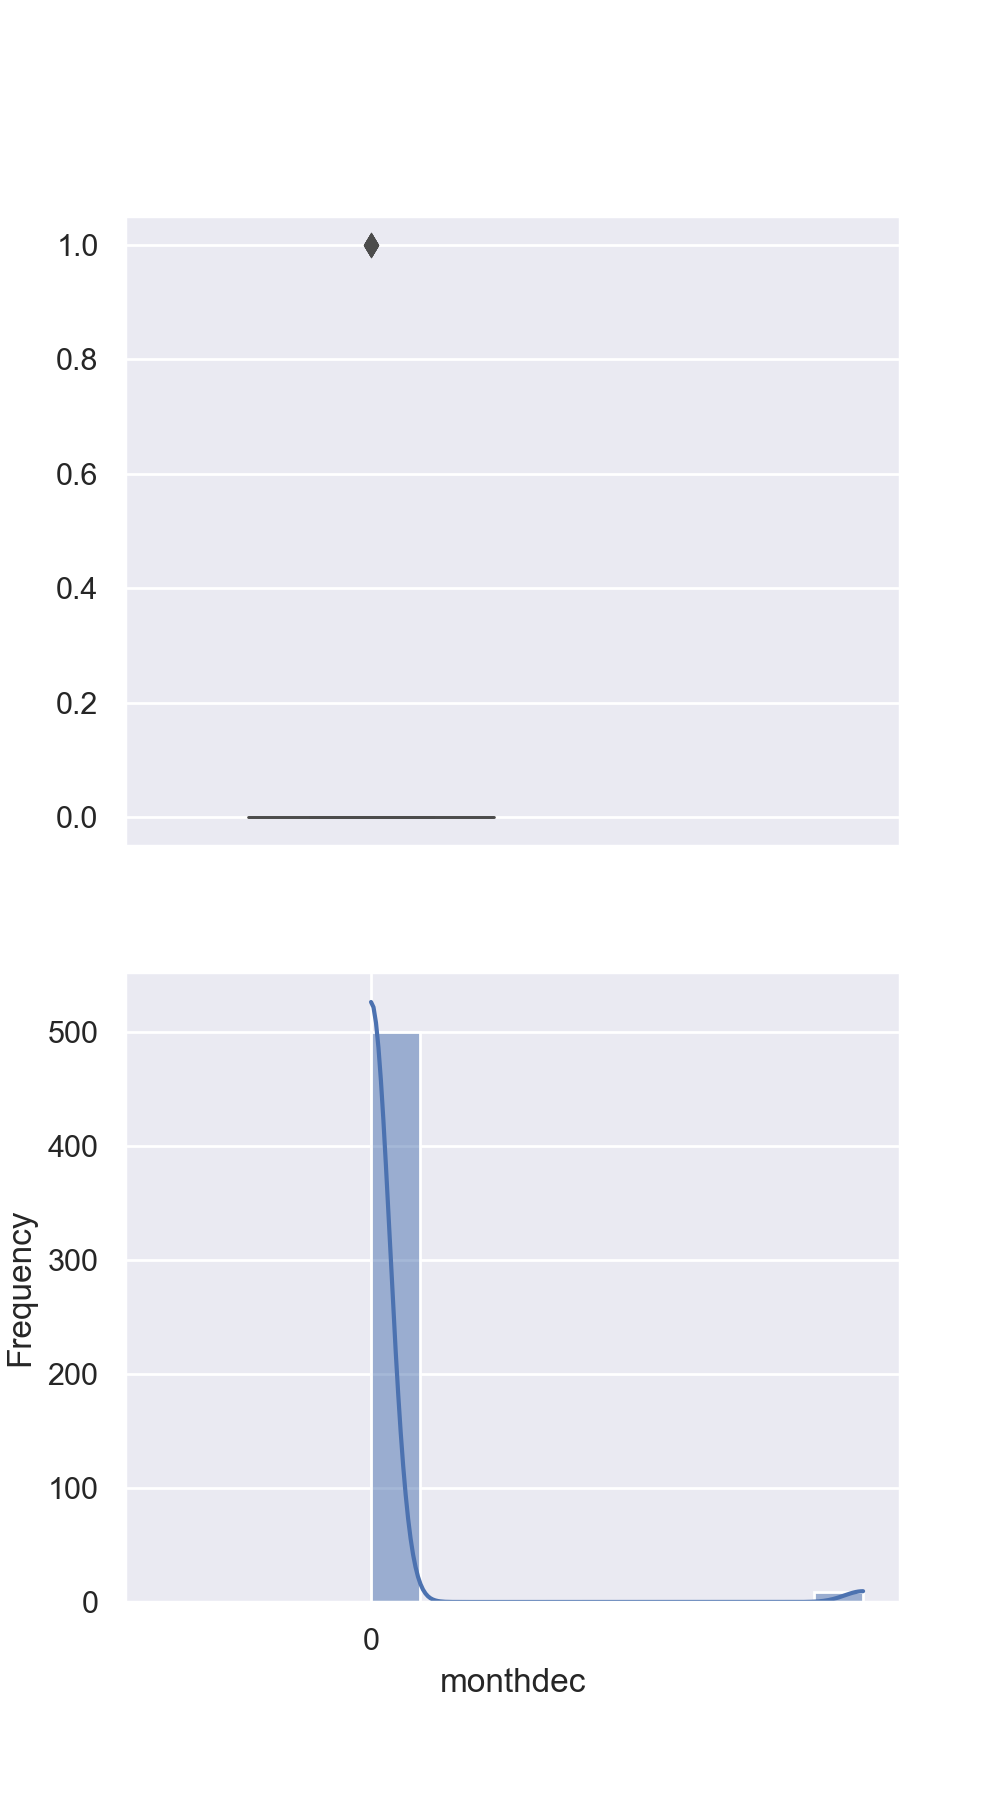

<Figure size 500x900 with 0 Axes>

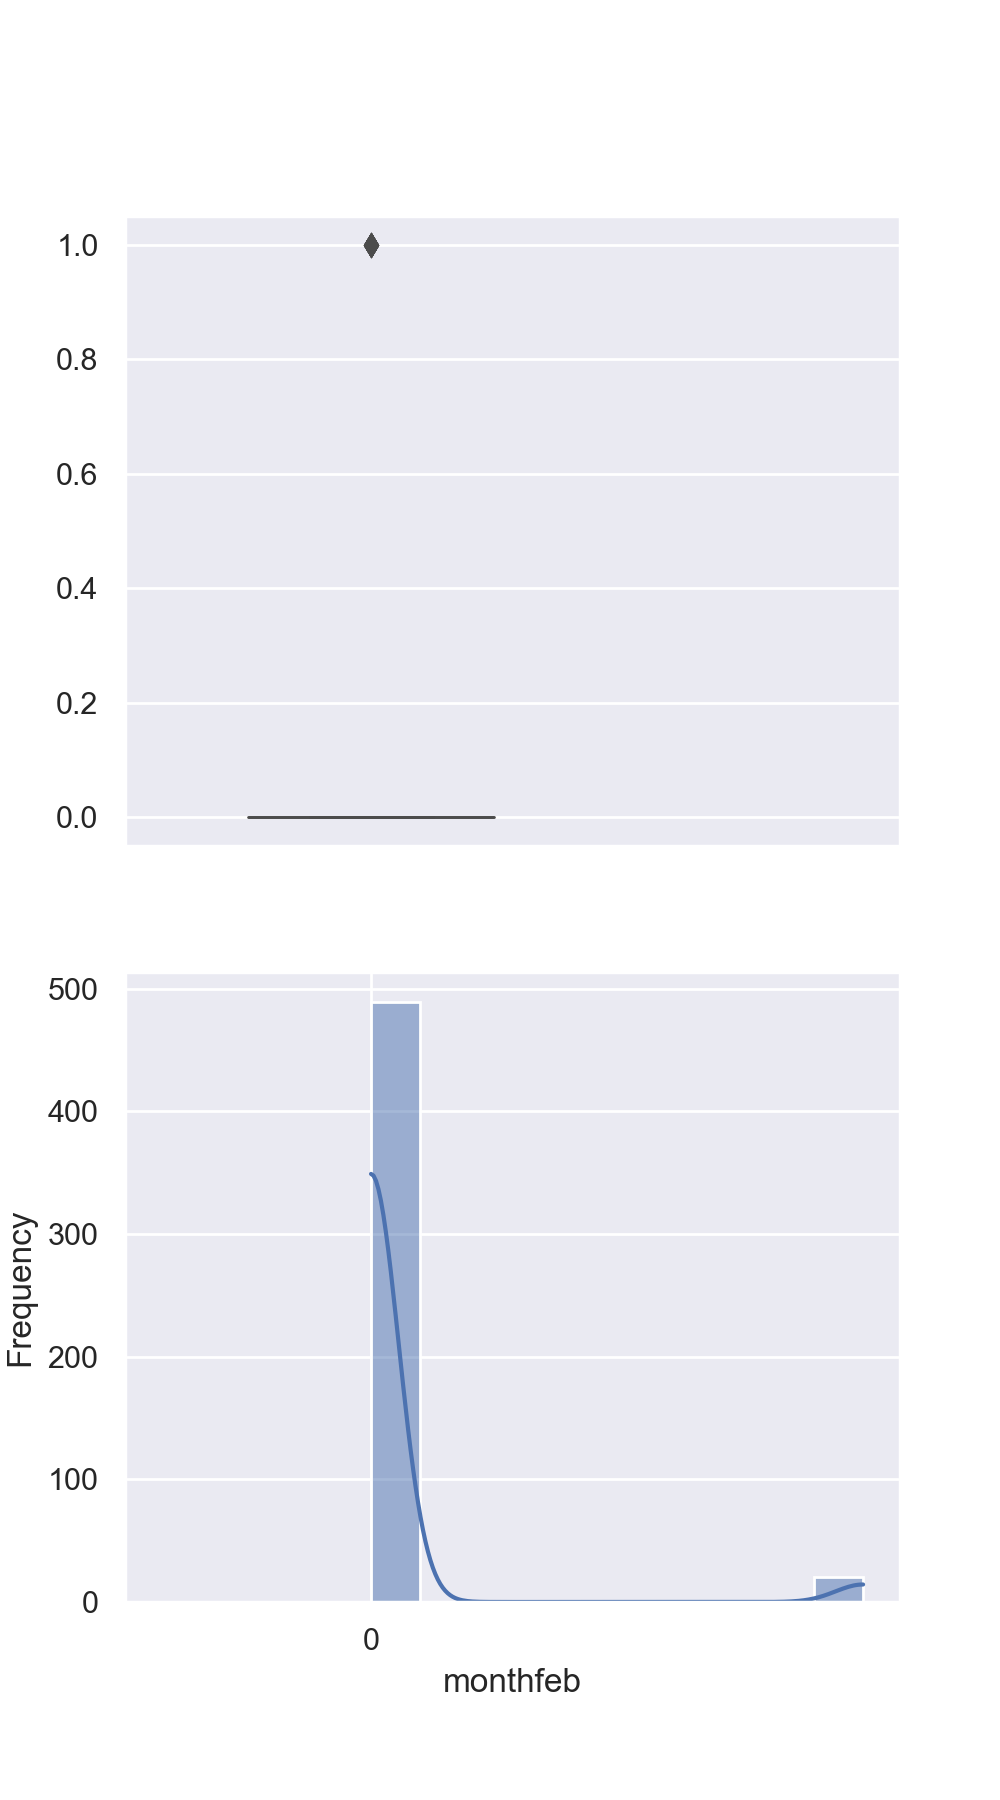

<Figure size 500x900 with 0 Axes>

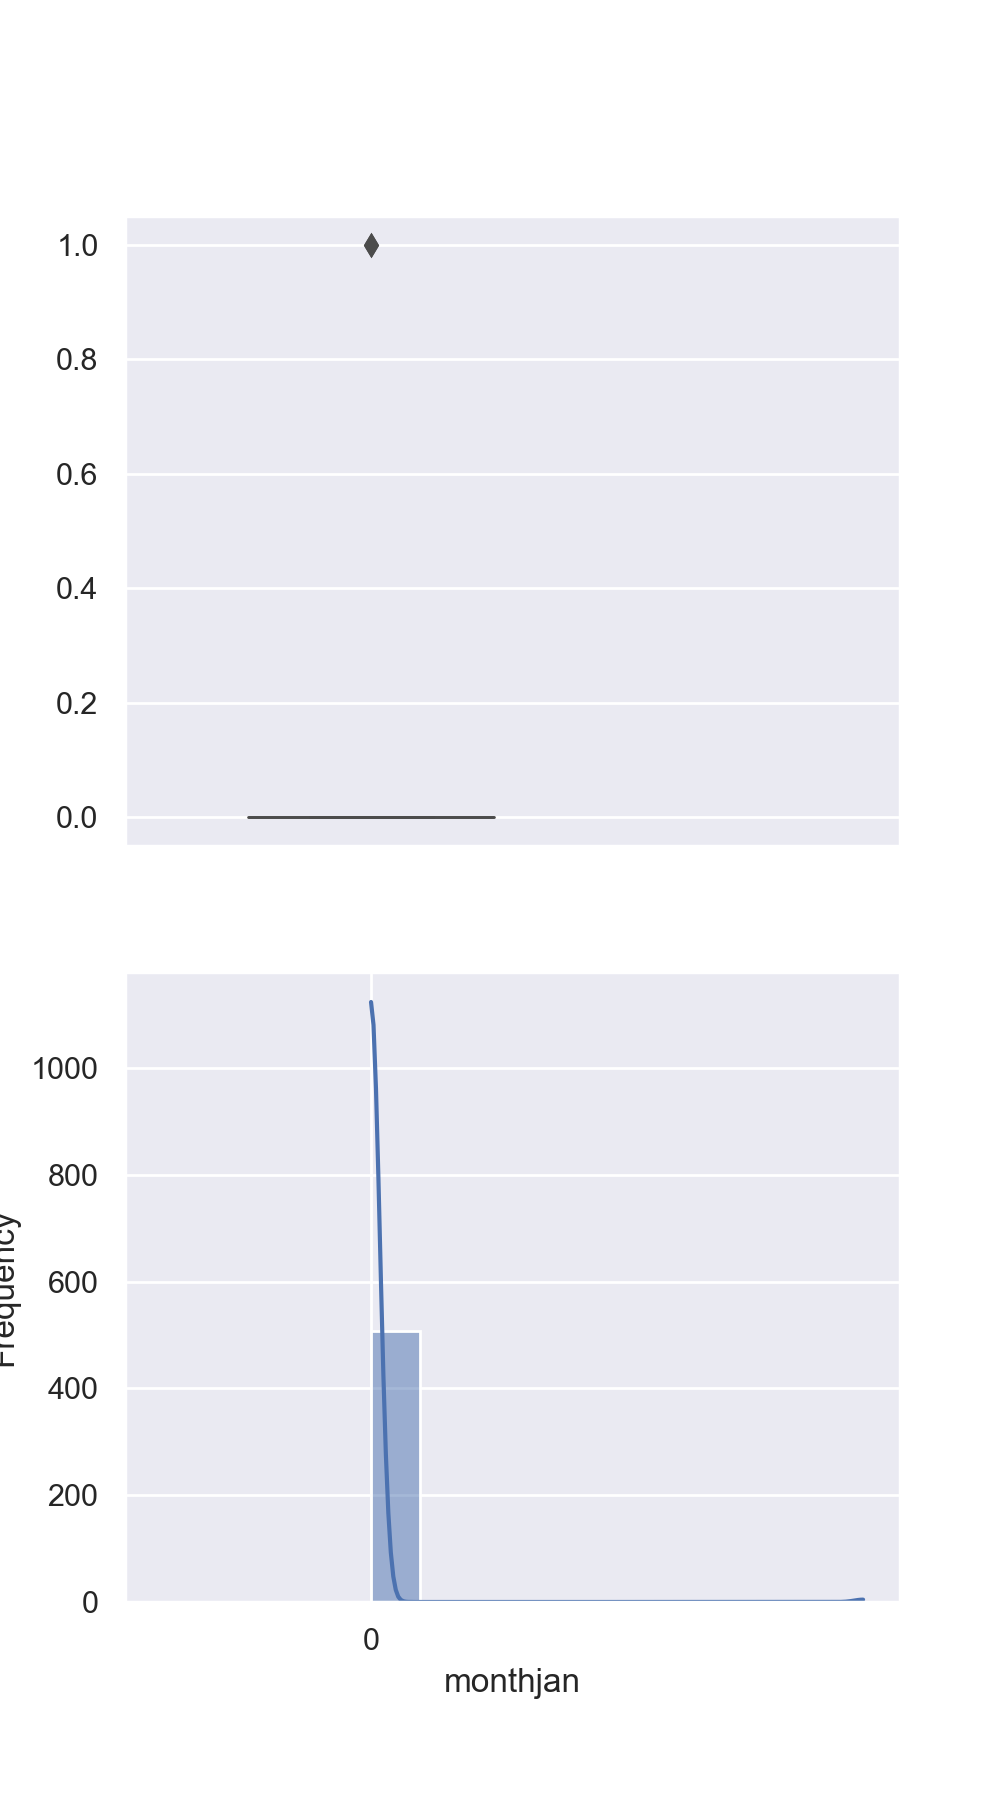

<Figure size 500x900 with 0 Axes>

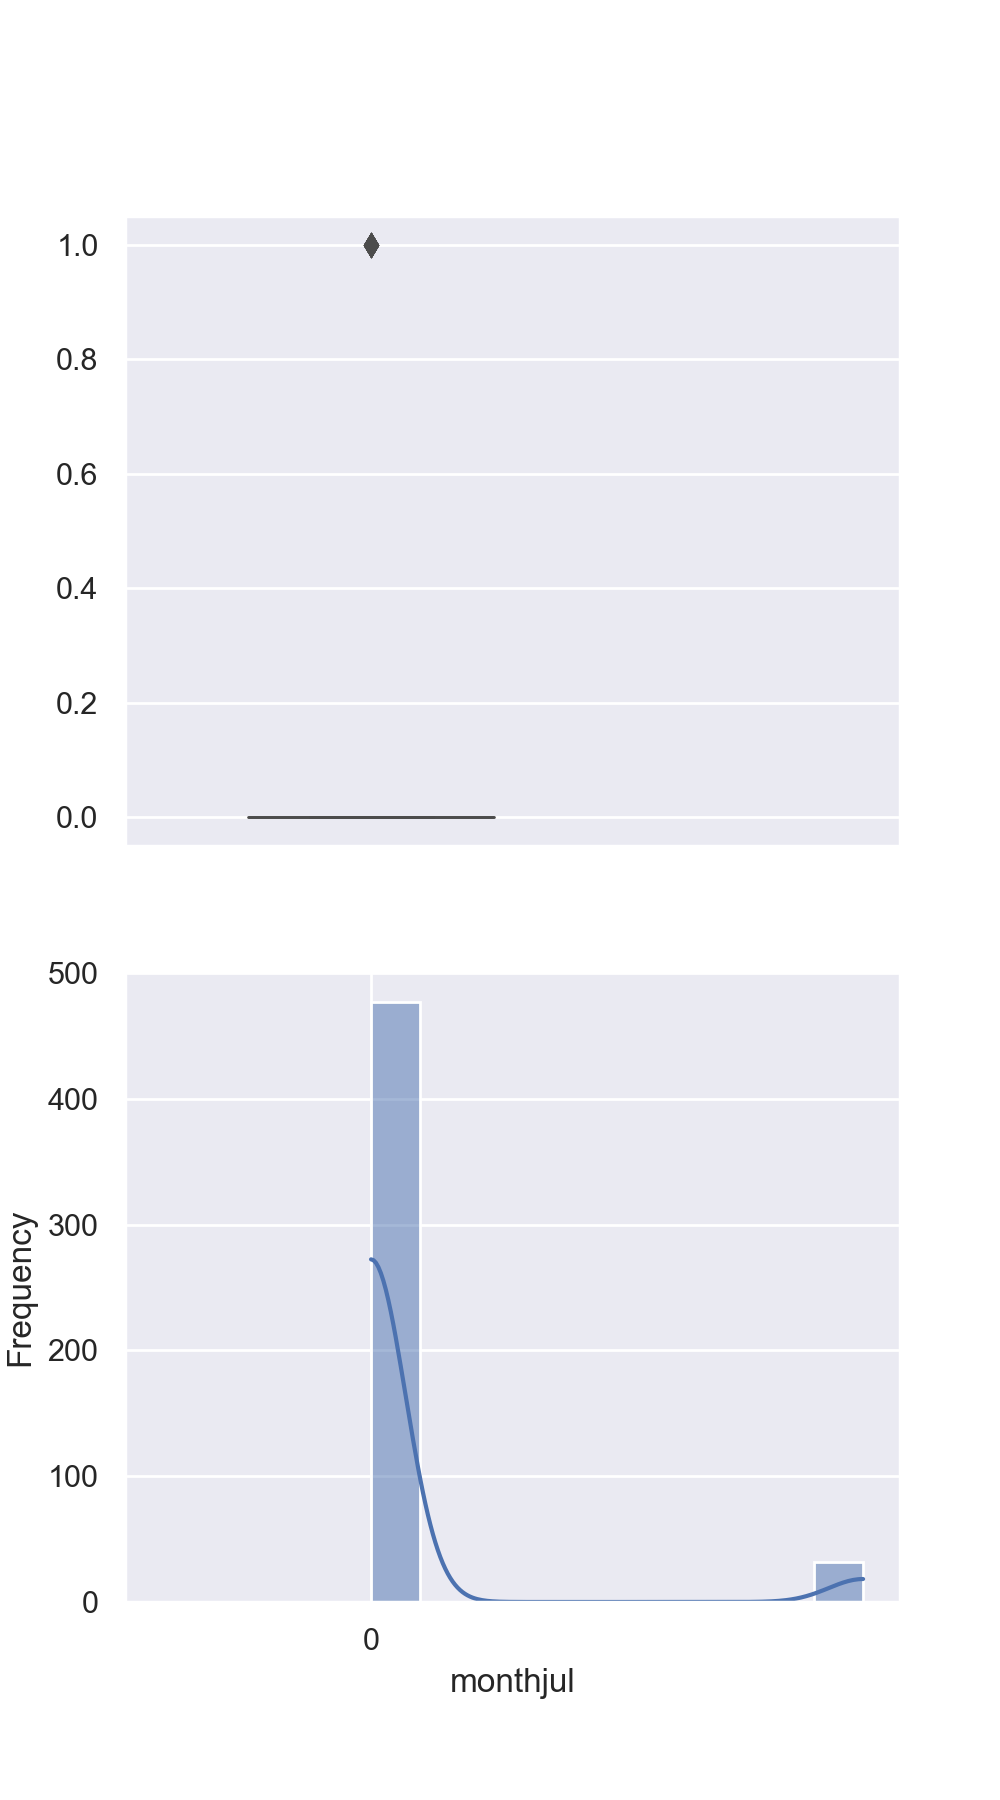

<Figure size 500x900 with 0 Axes>

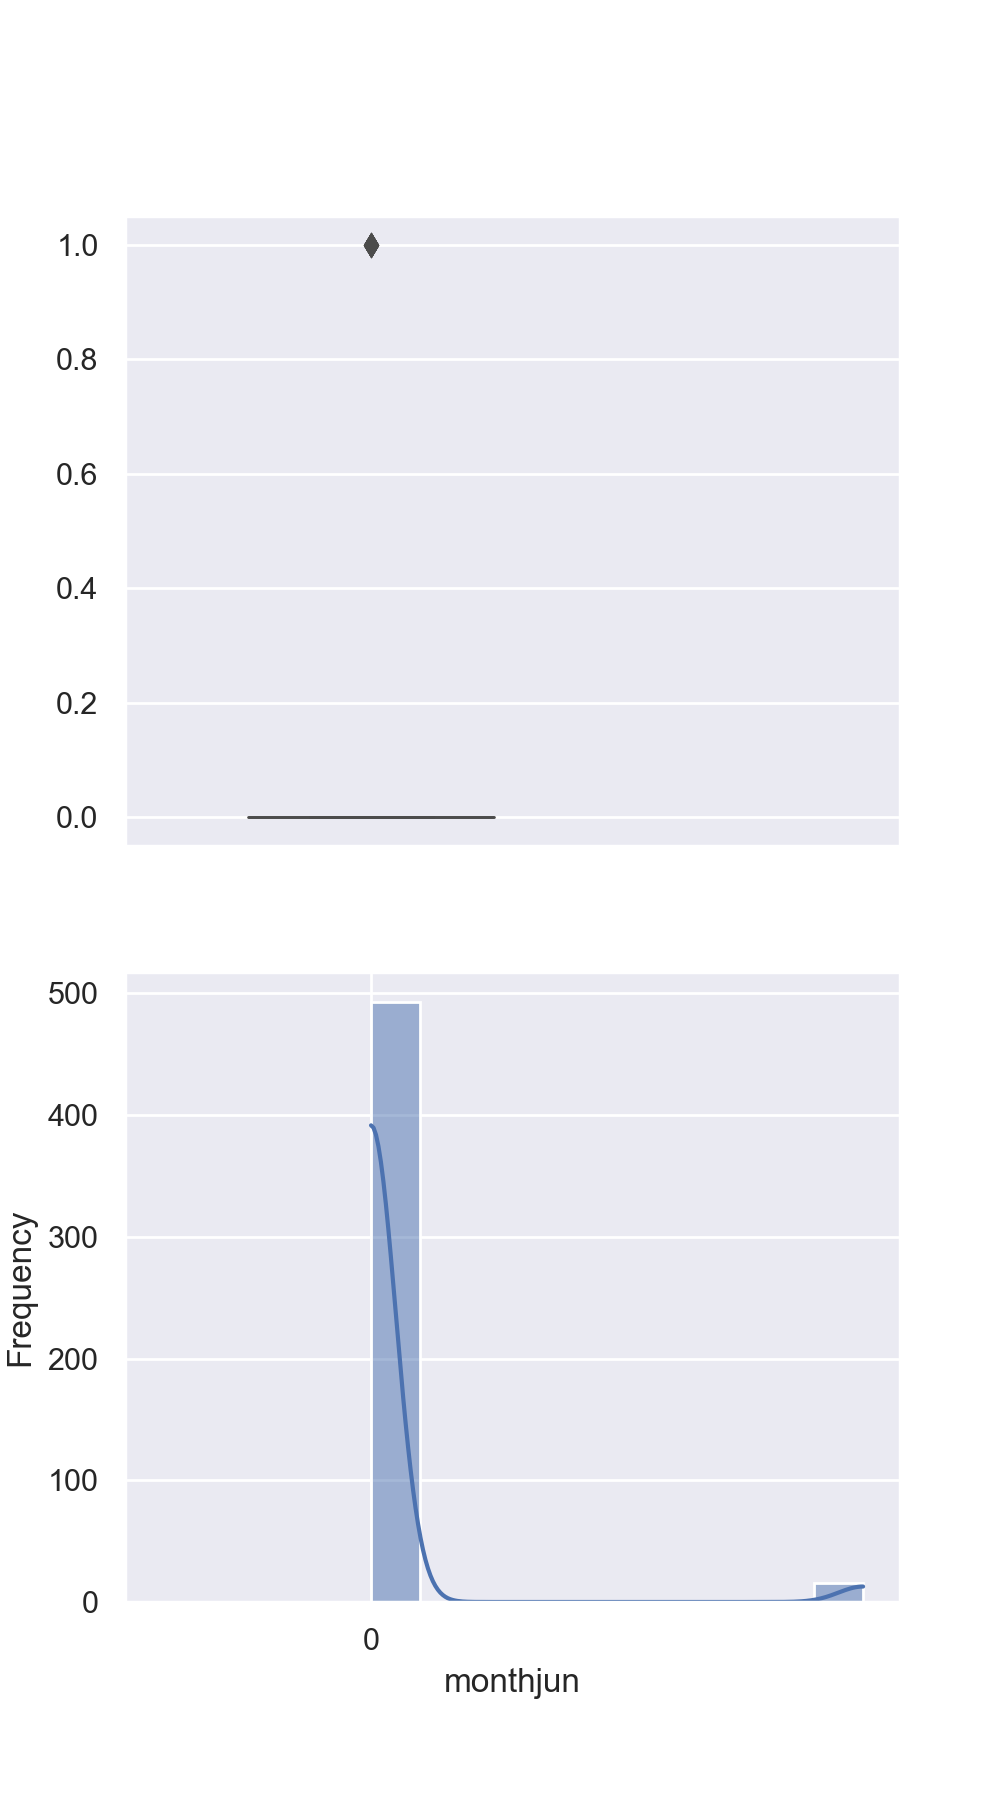

<Figure size 500x900 with 0 Axes>

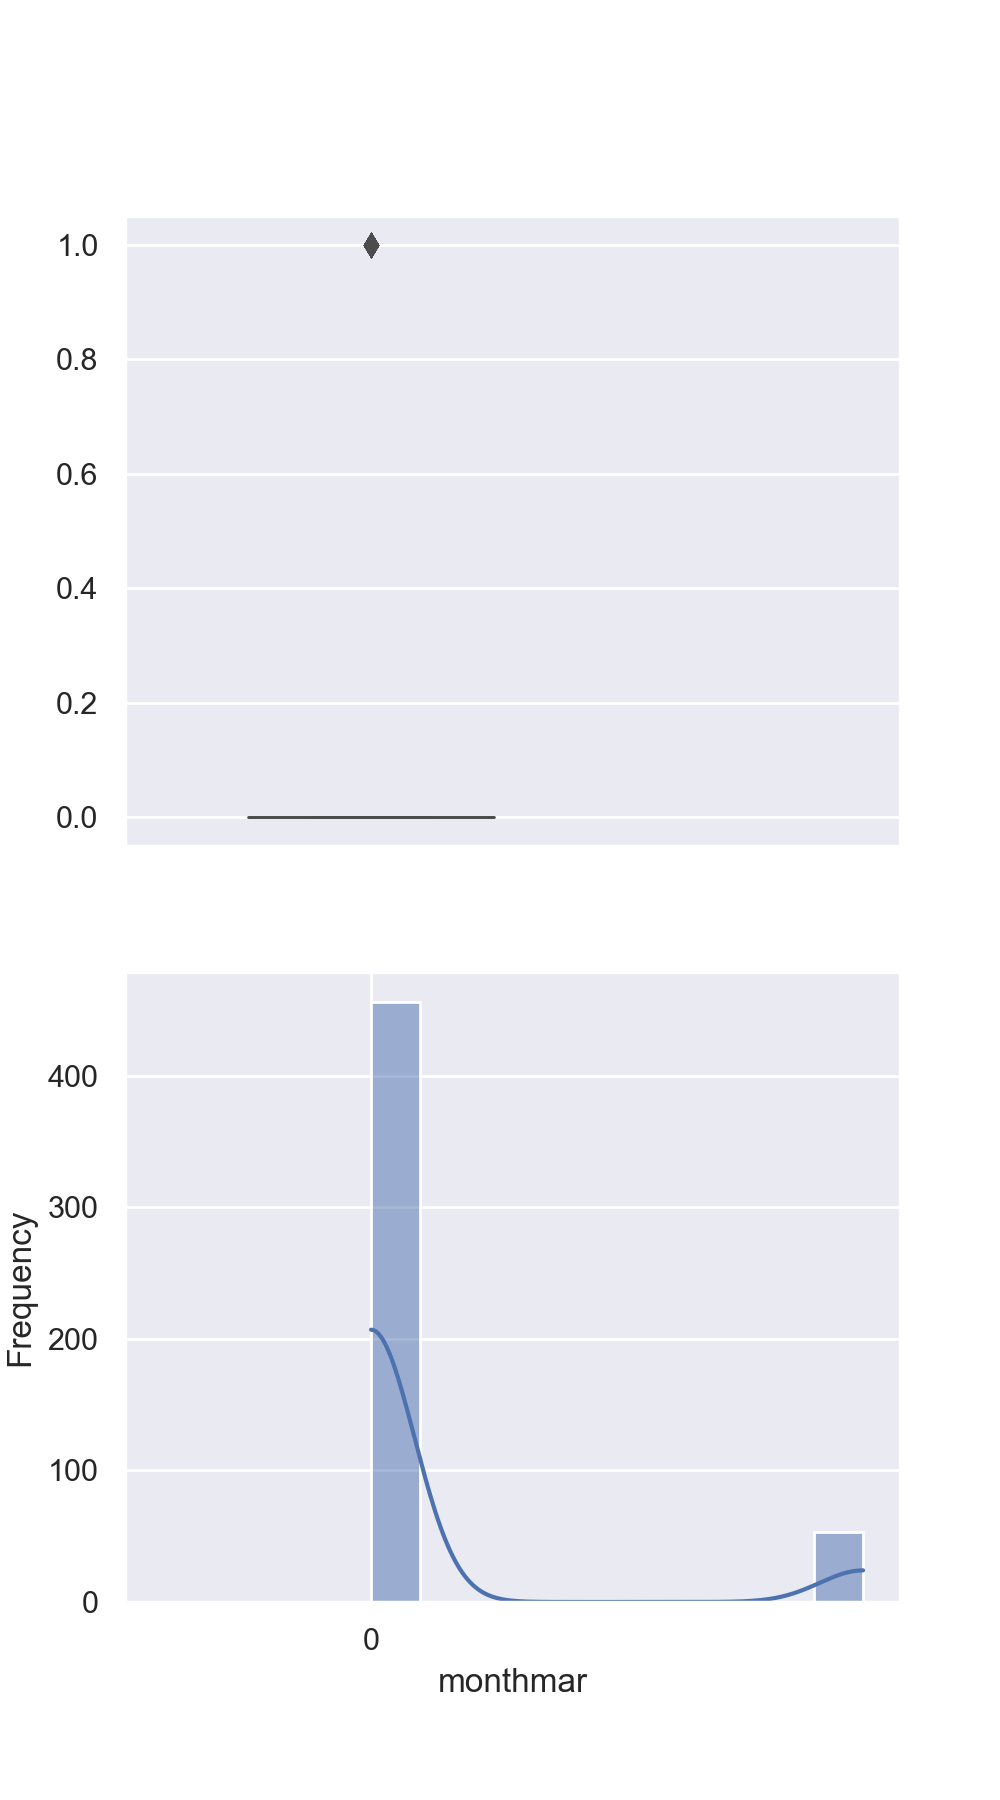

<Figure size 500x900 with 0 Axes>

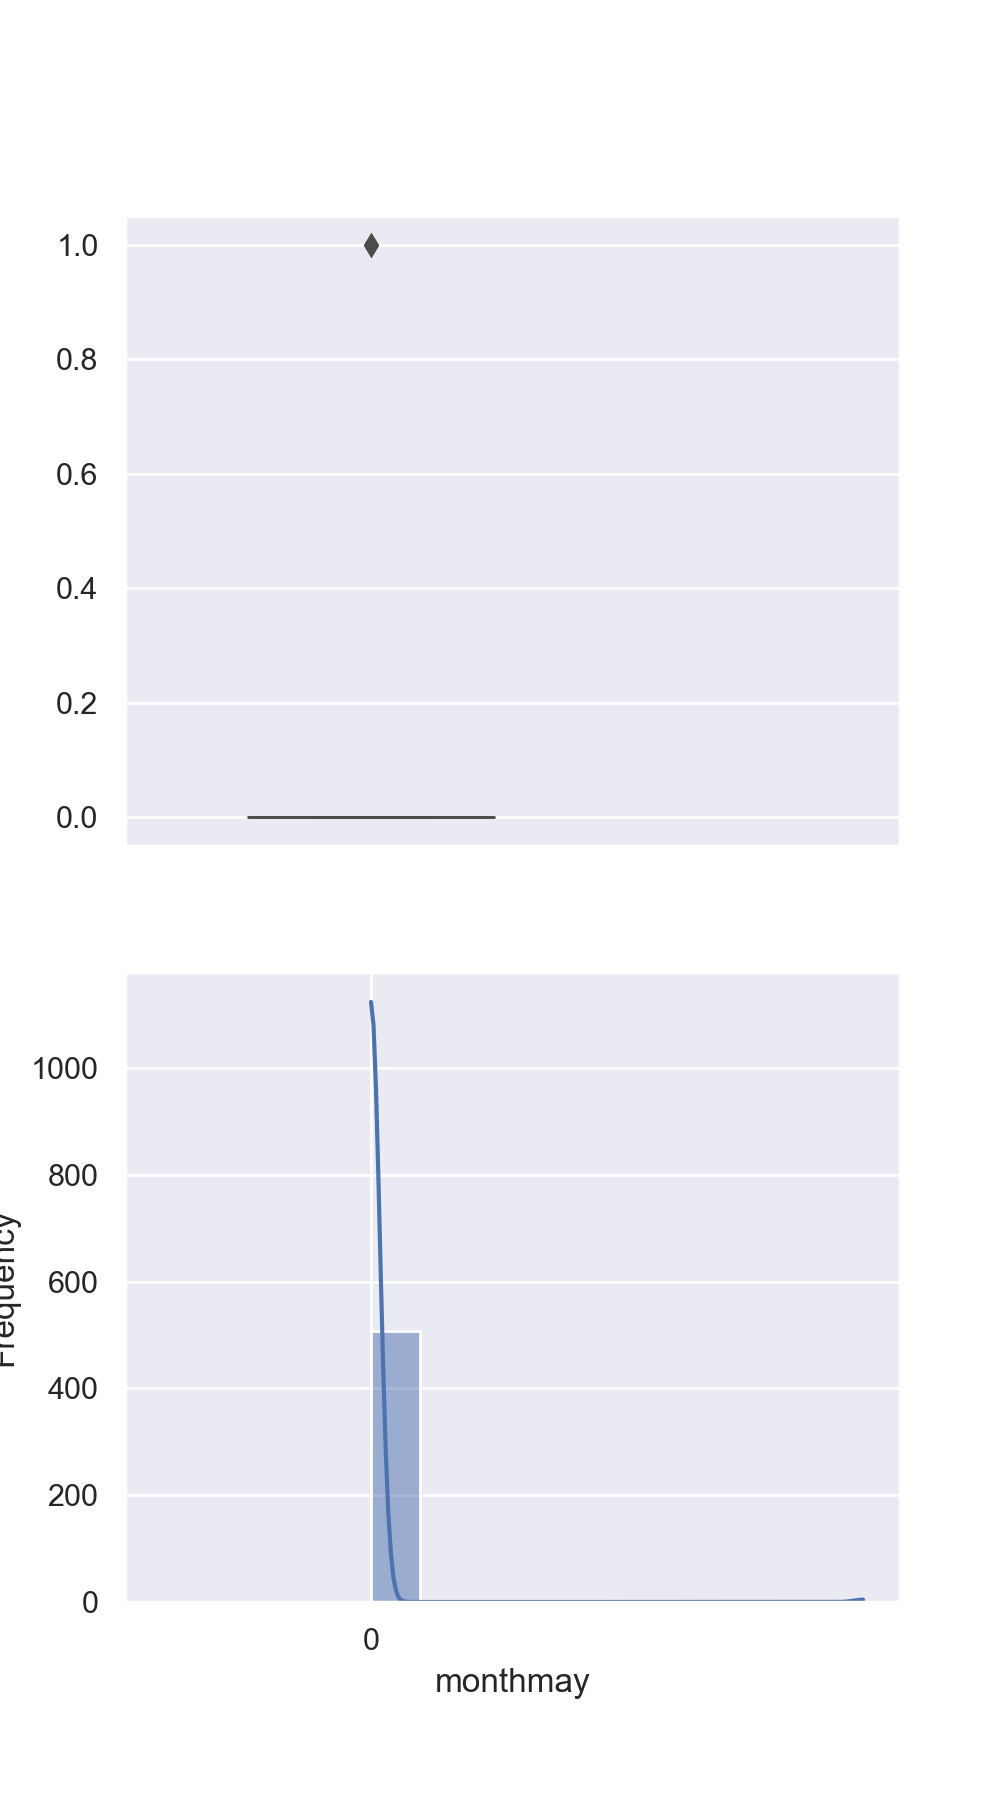

<Figure size 500x900 with 0 Axes>

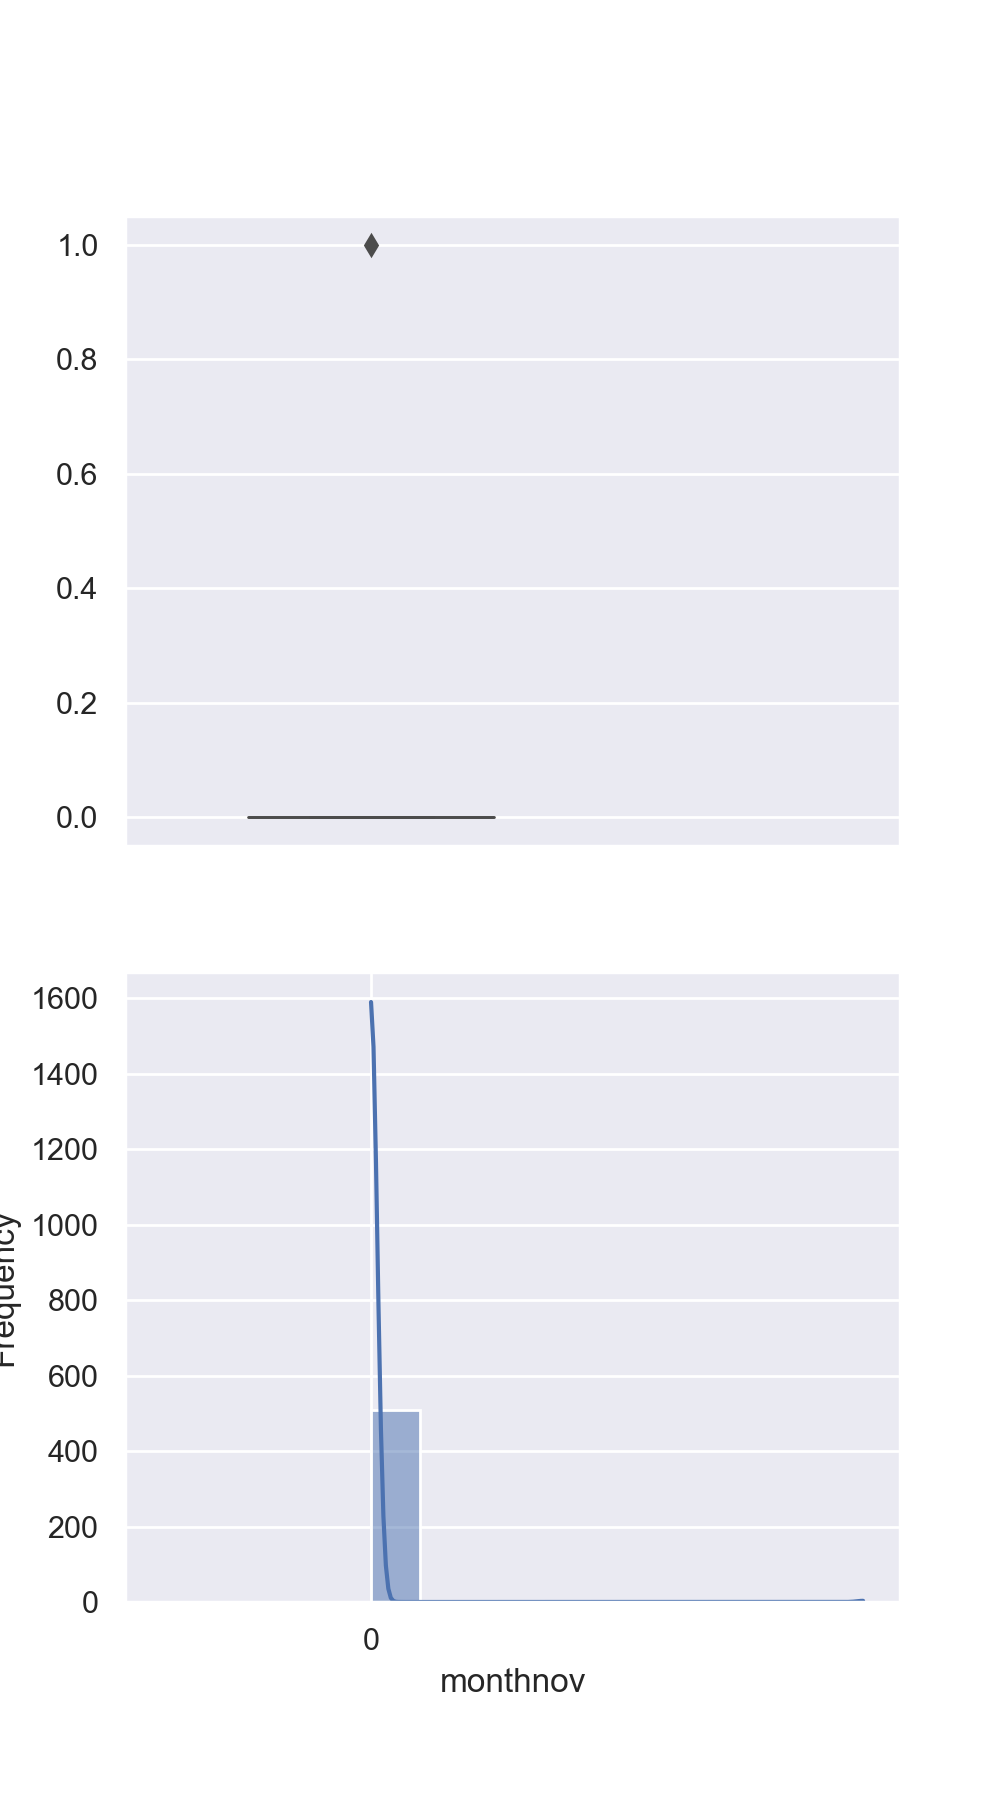

<Figure size 500x900 with 0 Axes>

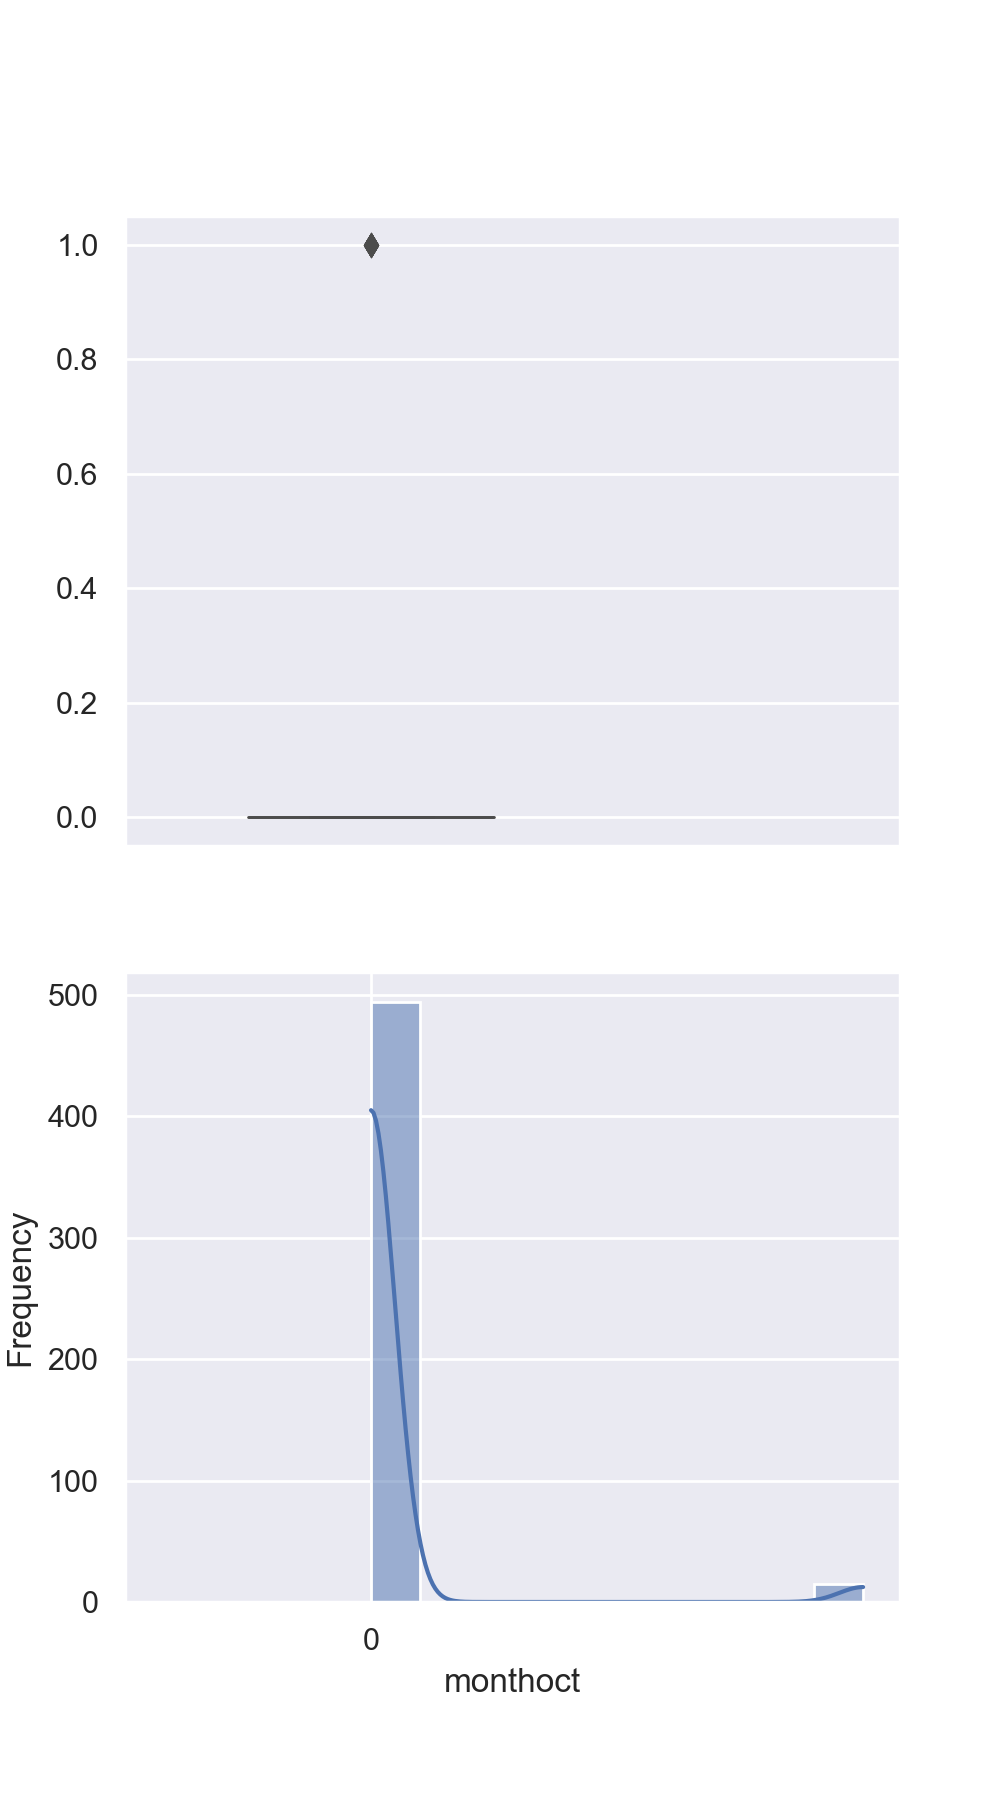

<Figure size 500x900 with 0 Axes>

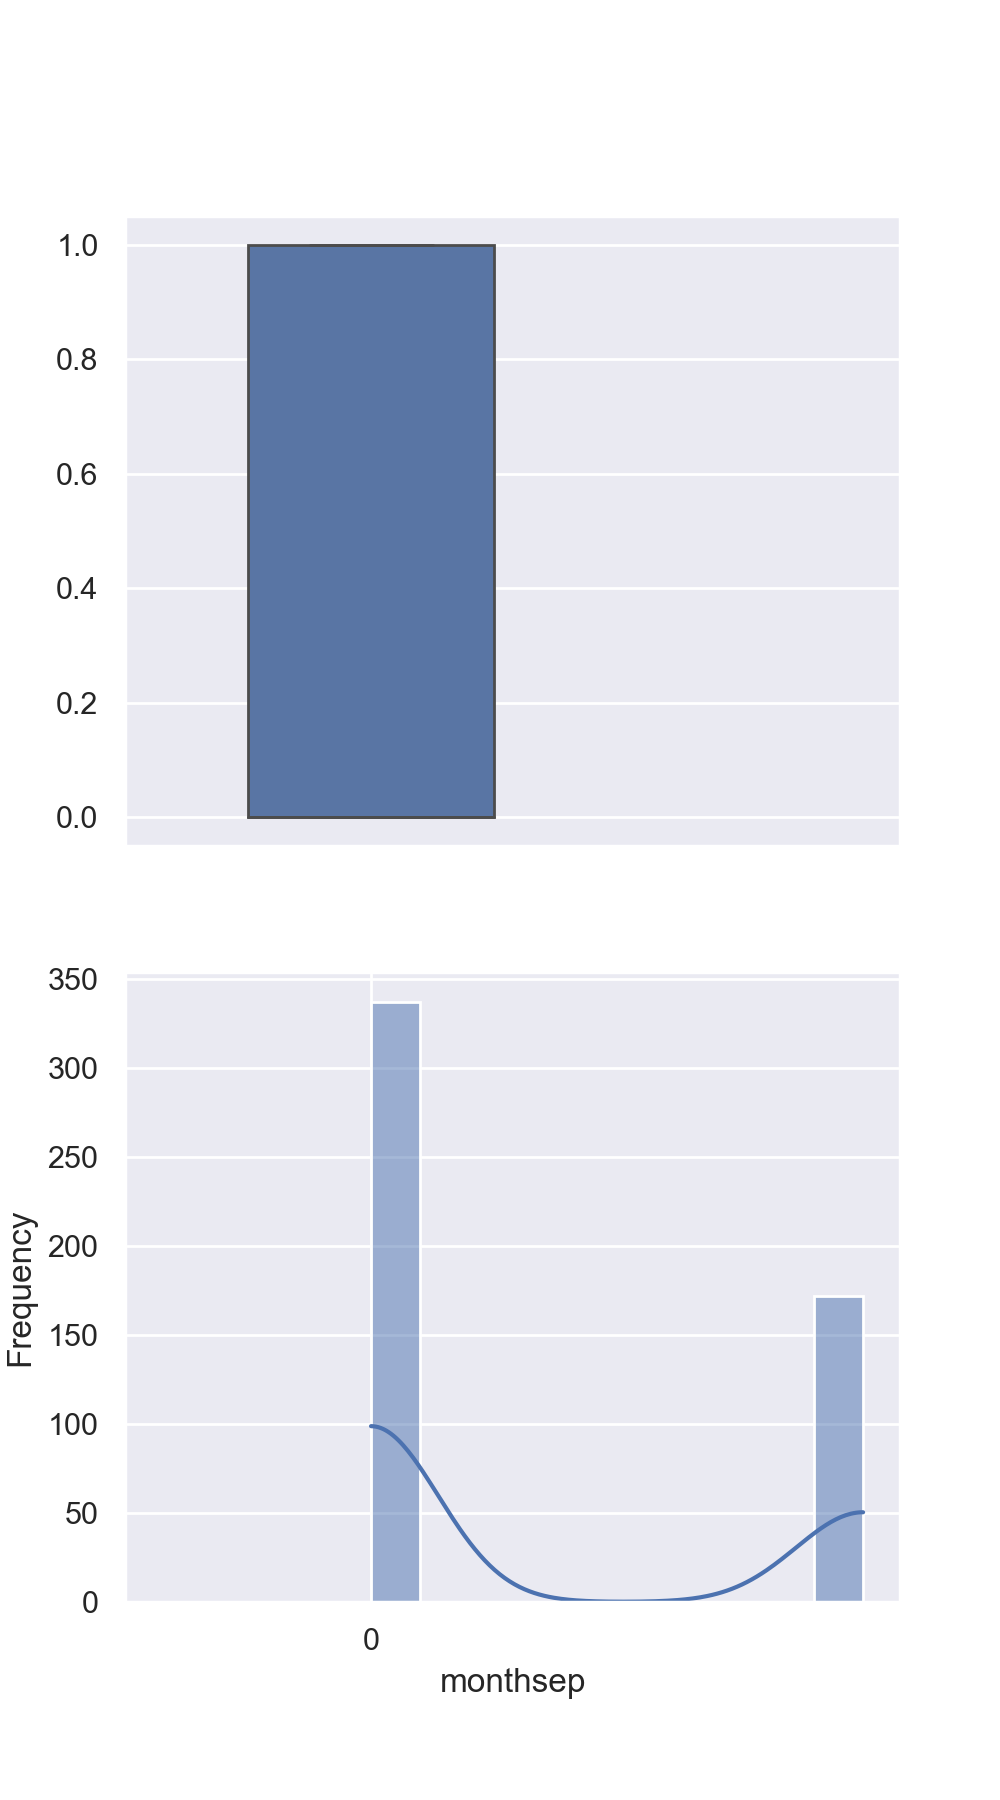

<Figure size 500x900 with 0 Axes>

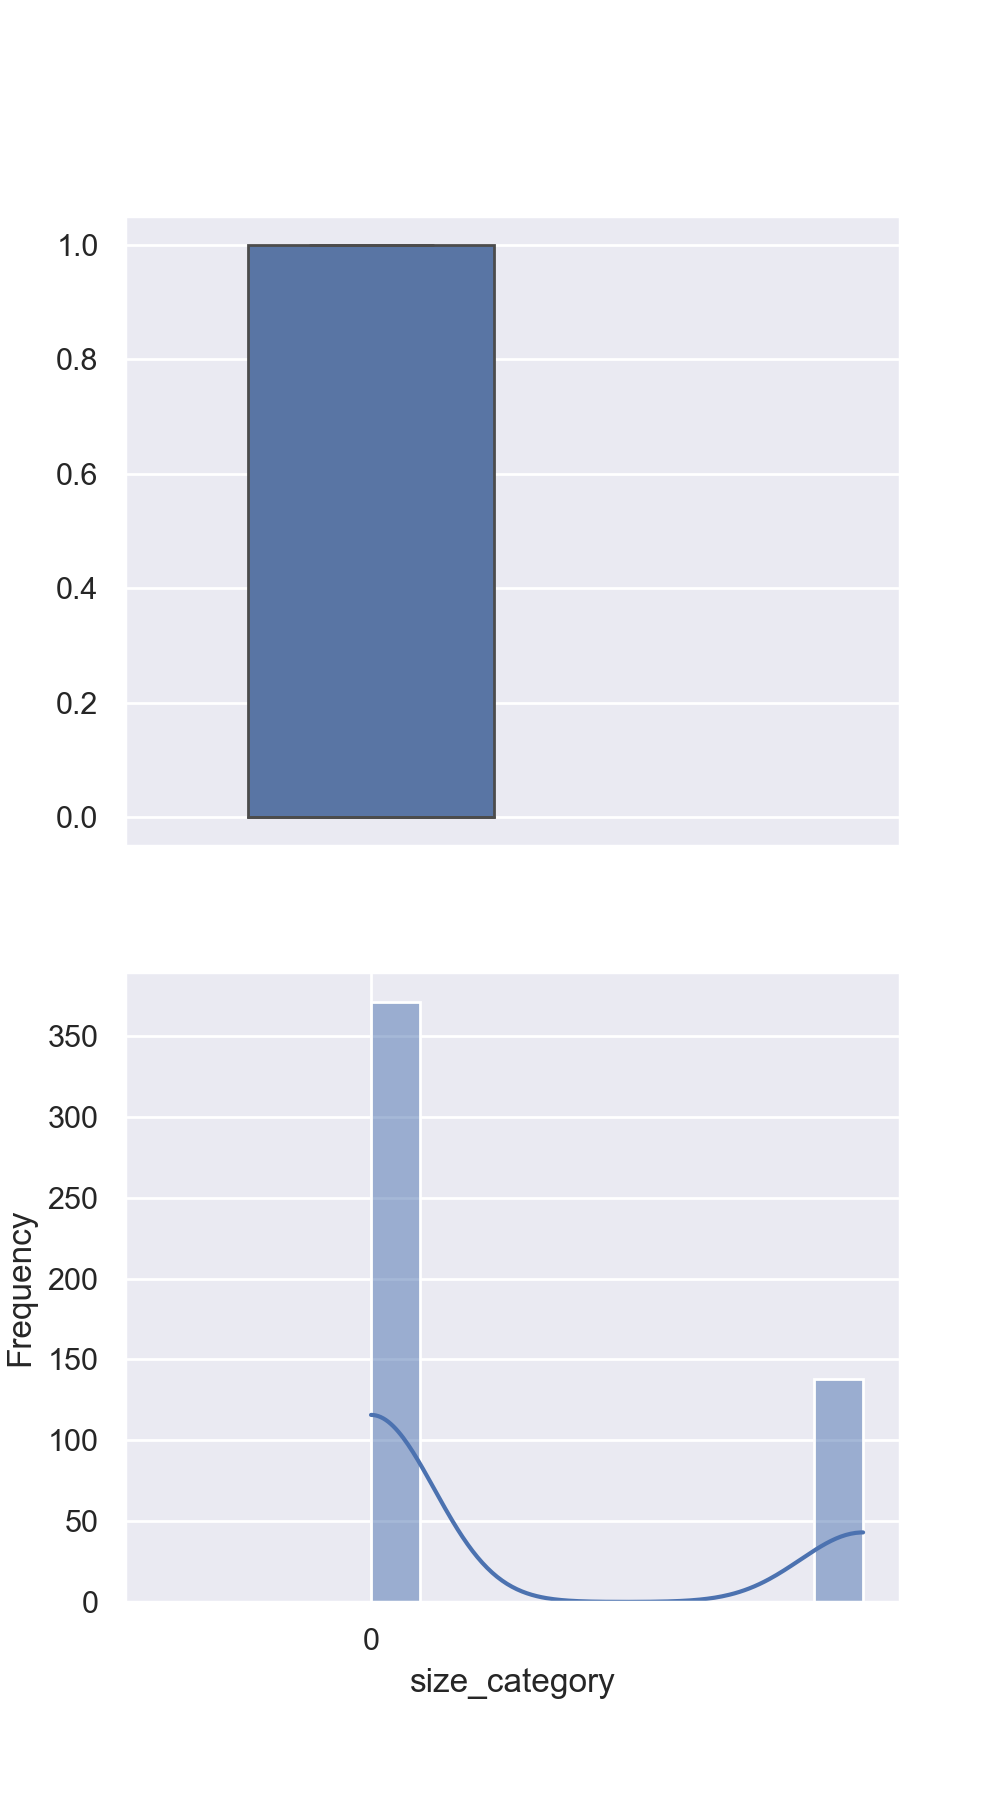

In [131]:
# decting outliers
# a for loop to automate our task
for i in forest.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(5,9)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(forest[i], ax=ax_box , linewidth= 1.0,width=0.5)
    sns.histplot(forest[i], ax=ax_hist , bins = 10,kde=True)

In [132]:
# Observations:
# 1. The feature Teamperature has "normal distribution" means its mean, mode and median will be same.
# 2. DMC and RH has "positive skewness" where mean is greater than median and median is greater than mode.
# 3. DC and FFMC has "negative Skewness" where mean is lower than median and mean.

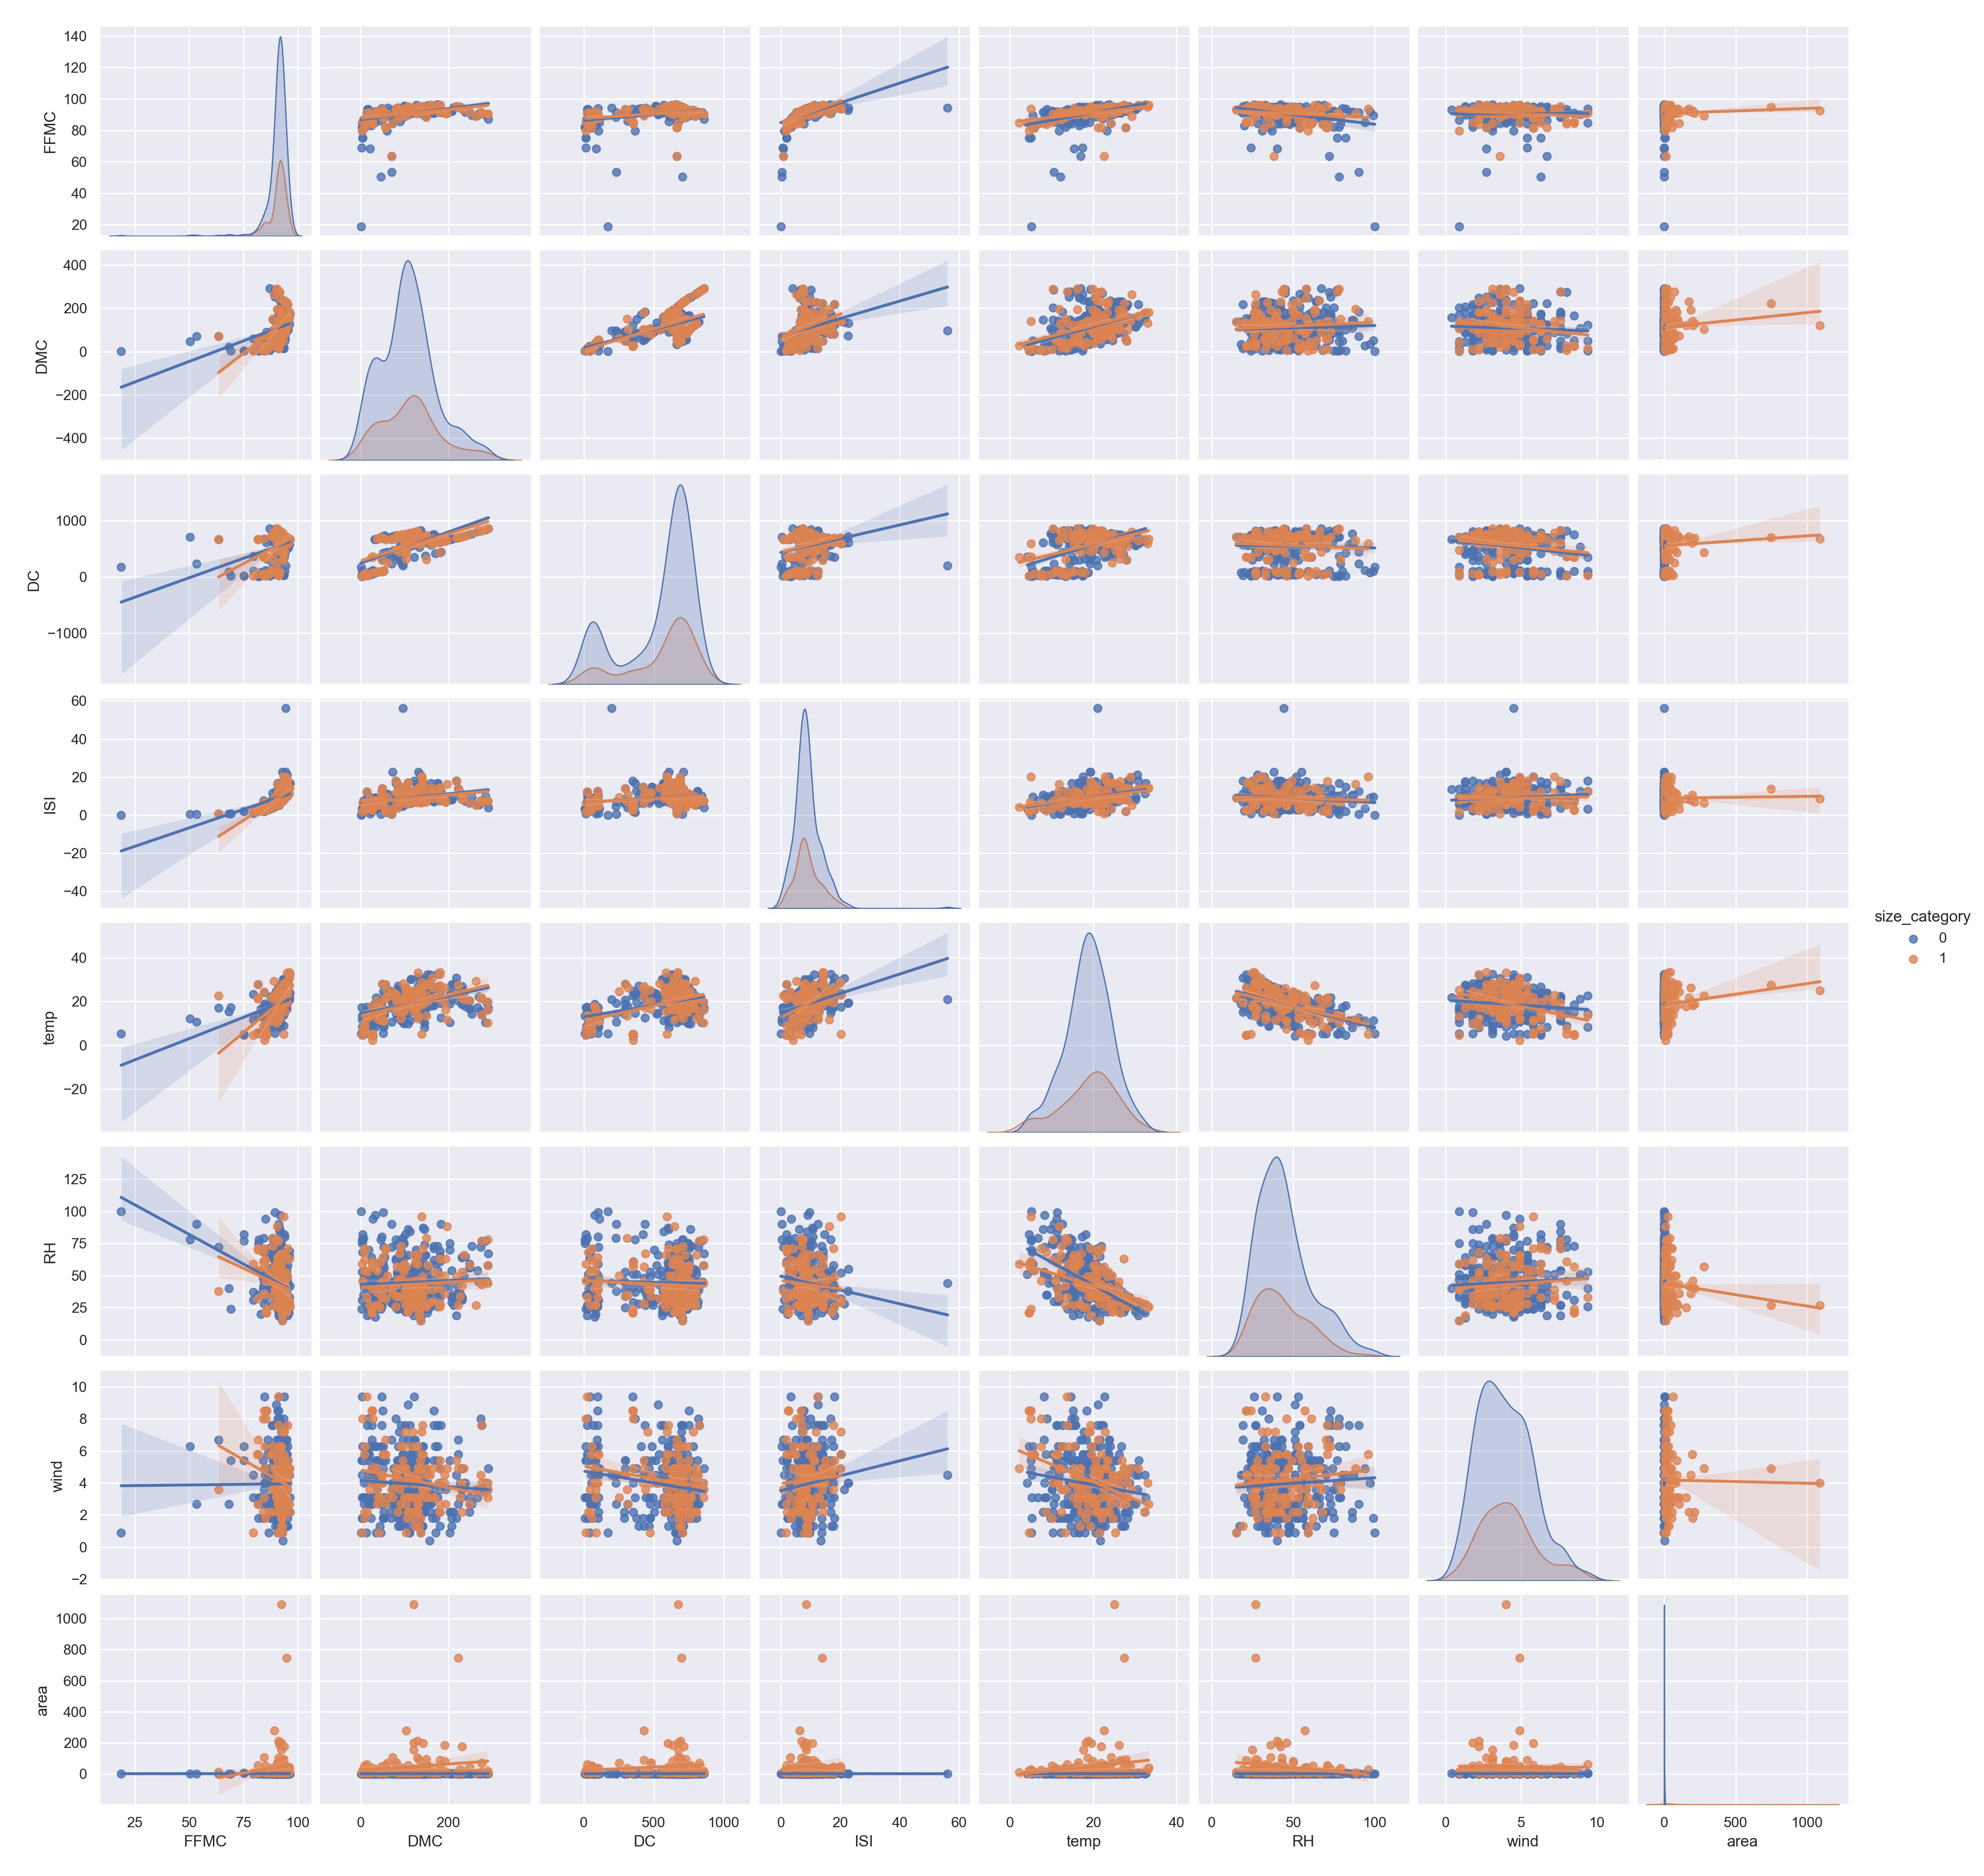

In [134]:
# Displaying pairplot to check relationship
sns.pairplot(forest,x_vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area'],
            y_vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area'], hue='size_category',
            kind='reg',diag_kind='kde')
plt.show()

In [136]:
# Observations:
# 1. Temparature and relative humidty has high collinearity with dependent vaiables('size_category')
# 2. Deep moist convection (DMC) and temp have relation with each other
# 3. Most of the independent variables are skewed to with respect to each other

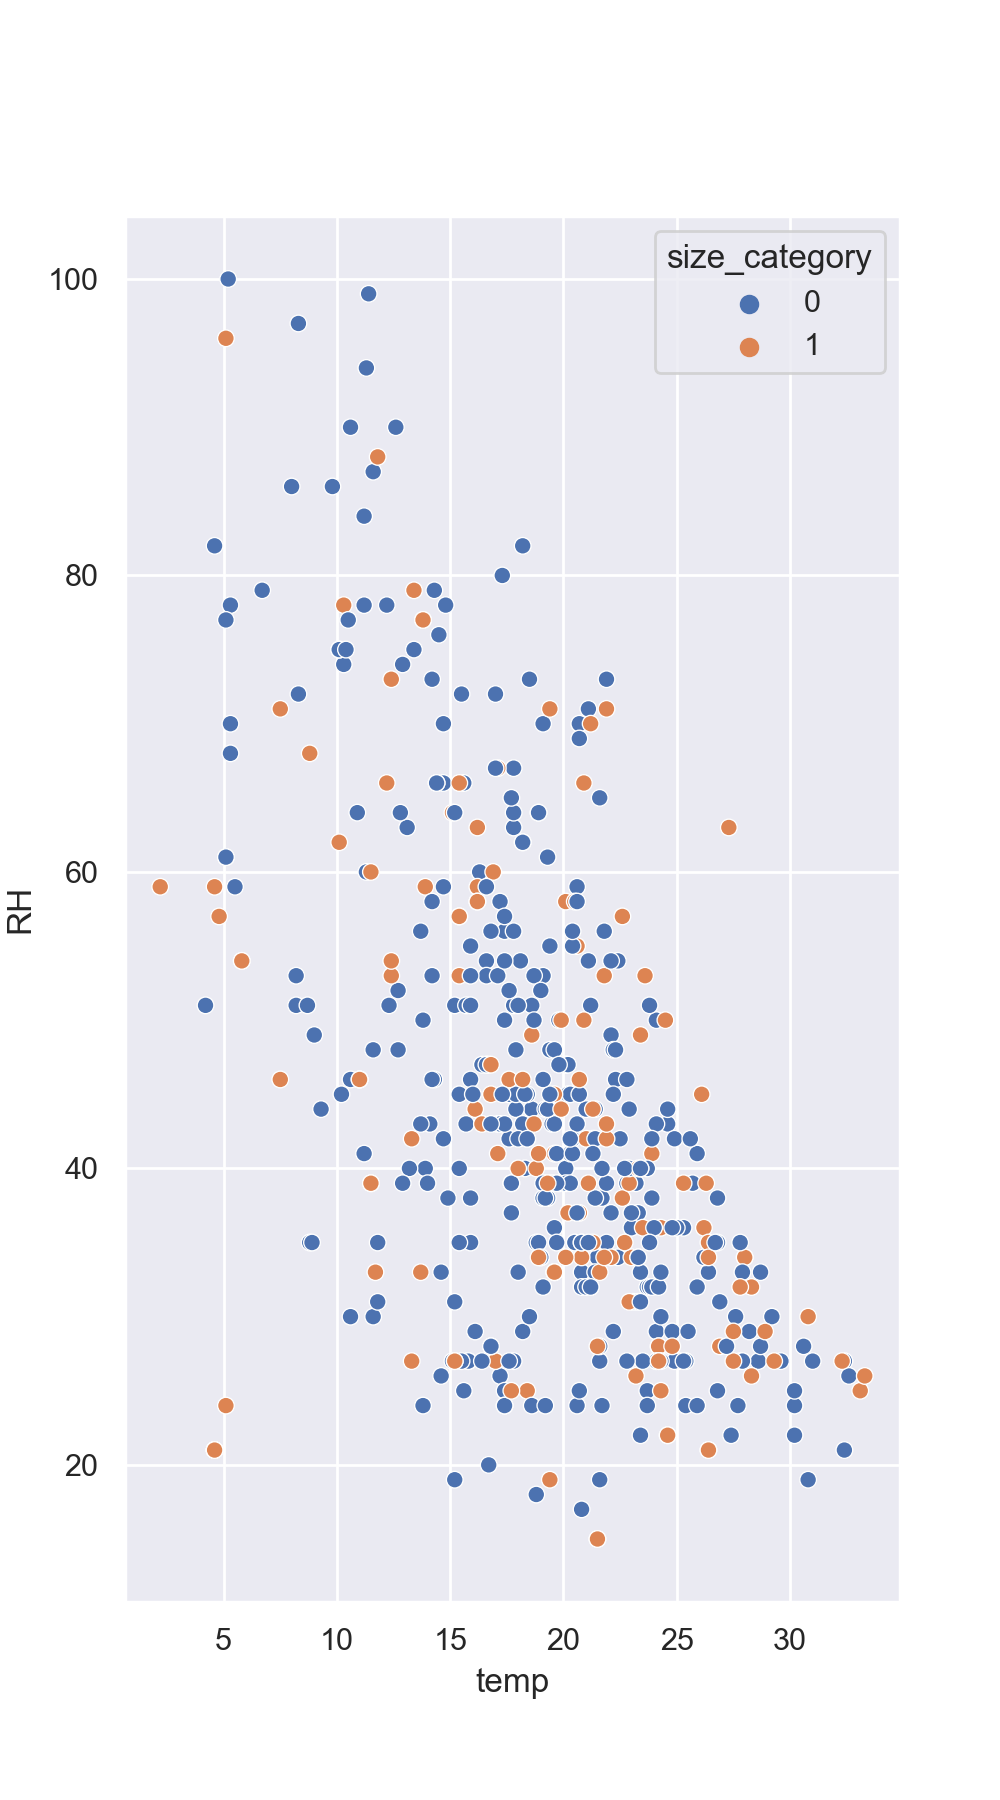

In [137]:
sns.scatterplot(x='temp',y='RH',data=forest,hue='size_category')
plt.show()

In [138]:
# Observations
# 1. The DMC and temp having postive relation
# 2. We can see that temparature is increasing the DMC also getting increasing

In [141]:
# Importing the modules
from bokeh.palettes import magma
from bokeh.plotting import figure, output_file, show

# File to save the models
output_file("output.html")

# Instantiating the figure object
graph = figure(title = "Scatter plot")

# Name of the X-axis
graph.xaxis.axis_label = "Temperature"

# Name of the Y-axis
graph.yaxis.axis_label = "DC"

# Color value of the Scatter points
color = magma(256)

x=forest['temp']
y=forest['DC']
graph.scatter(x,y,color = color)

show(graph)

In [143]:
car = forest.corr()
car

FFMC       DMC        DC       ISI      temp        RH  \
FFMC           1.000000  0.382925  0.331956  0.531926  0.431744 -0.306262   
DMC            0.382925  1.000000  0.681446  0.309459  0.470875  0.062772   
DC             0.331956  0.681446  1.000000  0.229757  0.496608 -0.047971   
ISI            0.531926  0.309459  0.229757  1.000000  0.395858 -0.135955   
temp           0.431744  0.470875  0.496608  0.395858  1.000000 -0.532503   
RH            -0.306262  0.062772 -0.047971 -0.135955 -0.532503  1.000000   
wind          -0.030409 -0.104563 -0.202856  0.104834 -0.227754  0.070721   
rain           0.052280  0.071017  0.033772  0.062132  0.067911  0.094343   
area           0.040998  0.076932  0.051542  0.008429  0.099173 -0.074554   
dayfri         0.020889 -0.011152 -0.001642  0.051599 -0.077766  0.069599   
daymon        -0.057581 -0.105205 -0.053198 -0.159333 -0.135289  0.010311   
daysat        -0.021744 -0.003147 -0.029112 -0.037140  0.038863 -0.024118   
daysun        -0.088579  0.028050 -0.002249 -0.005213  0.015661  0.140341   
daythu         0.073127  0.079932  0.047835 -0.019173  0.051864 -0.128270   
daytue         0.007268 -0.002803  0.026066  0.062274  0.034738 -0.021152   
daywed         0.094854  0.021687  0.022670  0.125896  0.091309 -0.087122   
monthapr      -0.116738 -0.198536 -0.270129 -0.106785 -0.156825  0.021627   
monthaug       0.225720  0.490160  0.270894  0.337101  0.349583  0.046842   
monthdec      -0.136614 -0.177044 -0.106347 -0.162761 -0.329774 -0.047670   
monthfeb      -0.281054 -0.319691 -0.402201 -0.250494 -0.319901  0.141593   
monthjan      -0.455128 -0.106256 -0.115871 -0.103846 -0.146547  0.171900   
monthjul       0.033137  0.000617 -0.101518  0.020932  0.143987  0.013808   
monthjun      -0.041972 -0.047759 -0.178719  0.119765  0.052779  0.014425   
monthmar      -0.074706 -0.404974 -0.648890 -0.143589 -0.342129 -0.083581   
monthmay      -0.036983 -0.082312 -0.115010 -0.060655 -0.045372  0.087384   
monthnov      -0.088879 -0.074642 -0.078927 -0.076748 -0.053720 -0.035967   
monthoct      -0.005172 -0.188126  0.094091 -0.071401 -0.052918 -0.072335   
monthsep       0.080444  0.119779  0.538299 -0.069600  0.091428 -0.061631   
size_category  0.024292  0.046598  0.028372 -0.007867  0.009976 -0.039730   

                   wind      rain      area    dayfri  ...  monthfeb  \
FFMC          -0.030409  0.052280  0.040998  0.020889  ... -0.281054   
DMC           -0.104563  0.071017  0.076932 -0.011152  ... -0.319691   
DC            -0.202856  0.033772  0.051542 -0.001642  ... -0.402201   
ISI            0.104834  0.062132  0.008429  0.051599  ... -0.250494   
temp          -0.227754  0.067911  0.099173 -0.077766  ... -0.319901   
RH             0.070721  0.094343 -0.074554  0.069599  ...  0.141593   
wind           1.000000  0.059332  0.012623  0.121056  ... -0.028820   
rain           0.059332  1.000000 -0.006511 -0.001723  ... -0.013961   
area           0.012623 -0.006511  1.000000 -0.052390  ... -0.021205   
dayfri         0.121056 -0.001723 -0.052390  1.000000  ...  0.047592   
daymon        -0.062712 -0.028473 -0.022178 -0.182056  ...  0.002649   
daysat        -0.068421 -0.030252  0.087647 -0.193432  ...  0.021400   
daysun         0.025971 -0.015749 -0.020657 -0.210075  ...  0.007987   
daythu        -0.055820 -0.025236  0.020685 -0.161357  ... -0.042571   
daytue         0.052331  0.127243 -0.001002 -0.165896  ... -0.014599   
daywed        -0.022181 -0.019189 -0.011046 -0.150484  ... -0.035839   
monthapr       0.048864 -0.009262 -0.008589 -0.018868  ... -0.027133   
monthaug       0.027413  0.088572 -0.000948 -0.100652  ... -0.148305   
monthdec       0.270919 -0.009262  0.000706 -0.018868  ... -0.027133   
monthfeb      -0.028820 -0.013961 -0.021205  0.047592  ...  1.000000   
monthjan      -0.070217 -0.004336 -0.012737 -0.027723  ... -0.012702   
monthjul      -0.039880 -0.012411  0.005566 -0.048598  ... -0.052381   
monthjun       0.010124 -0.012437 -0.019083 -0.01856

# corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

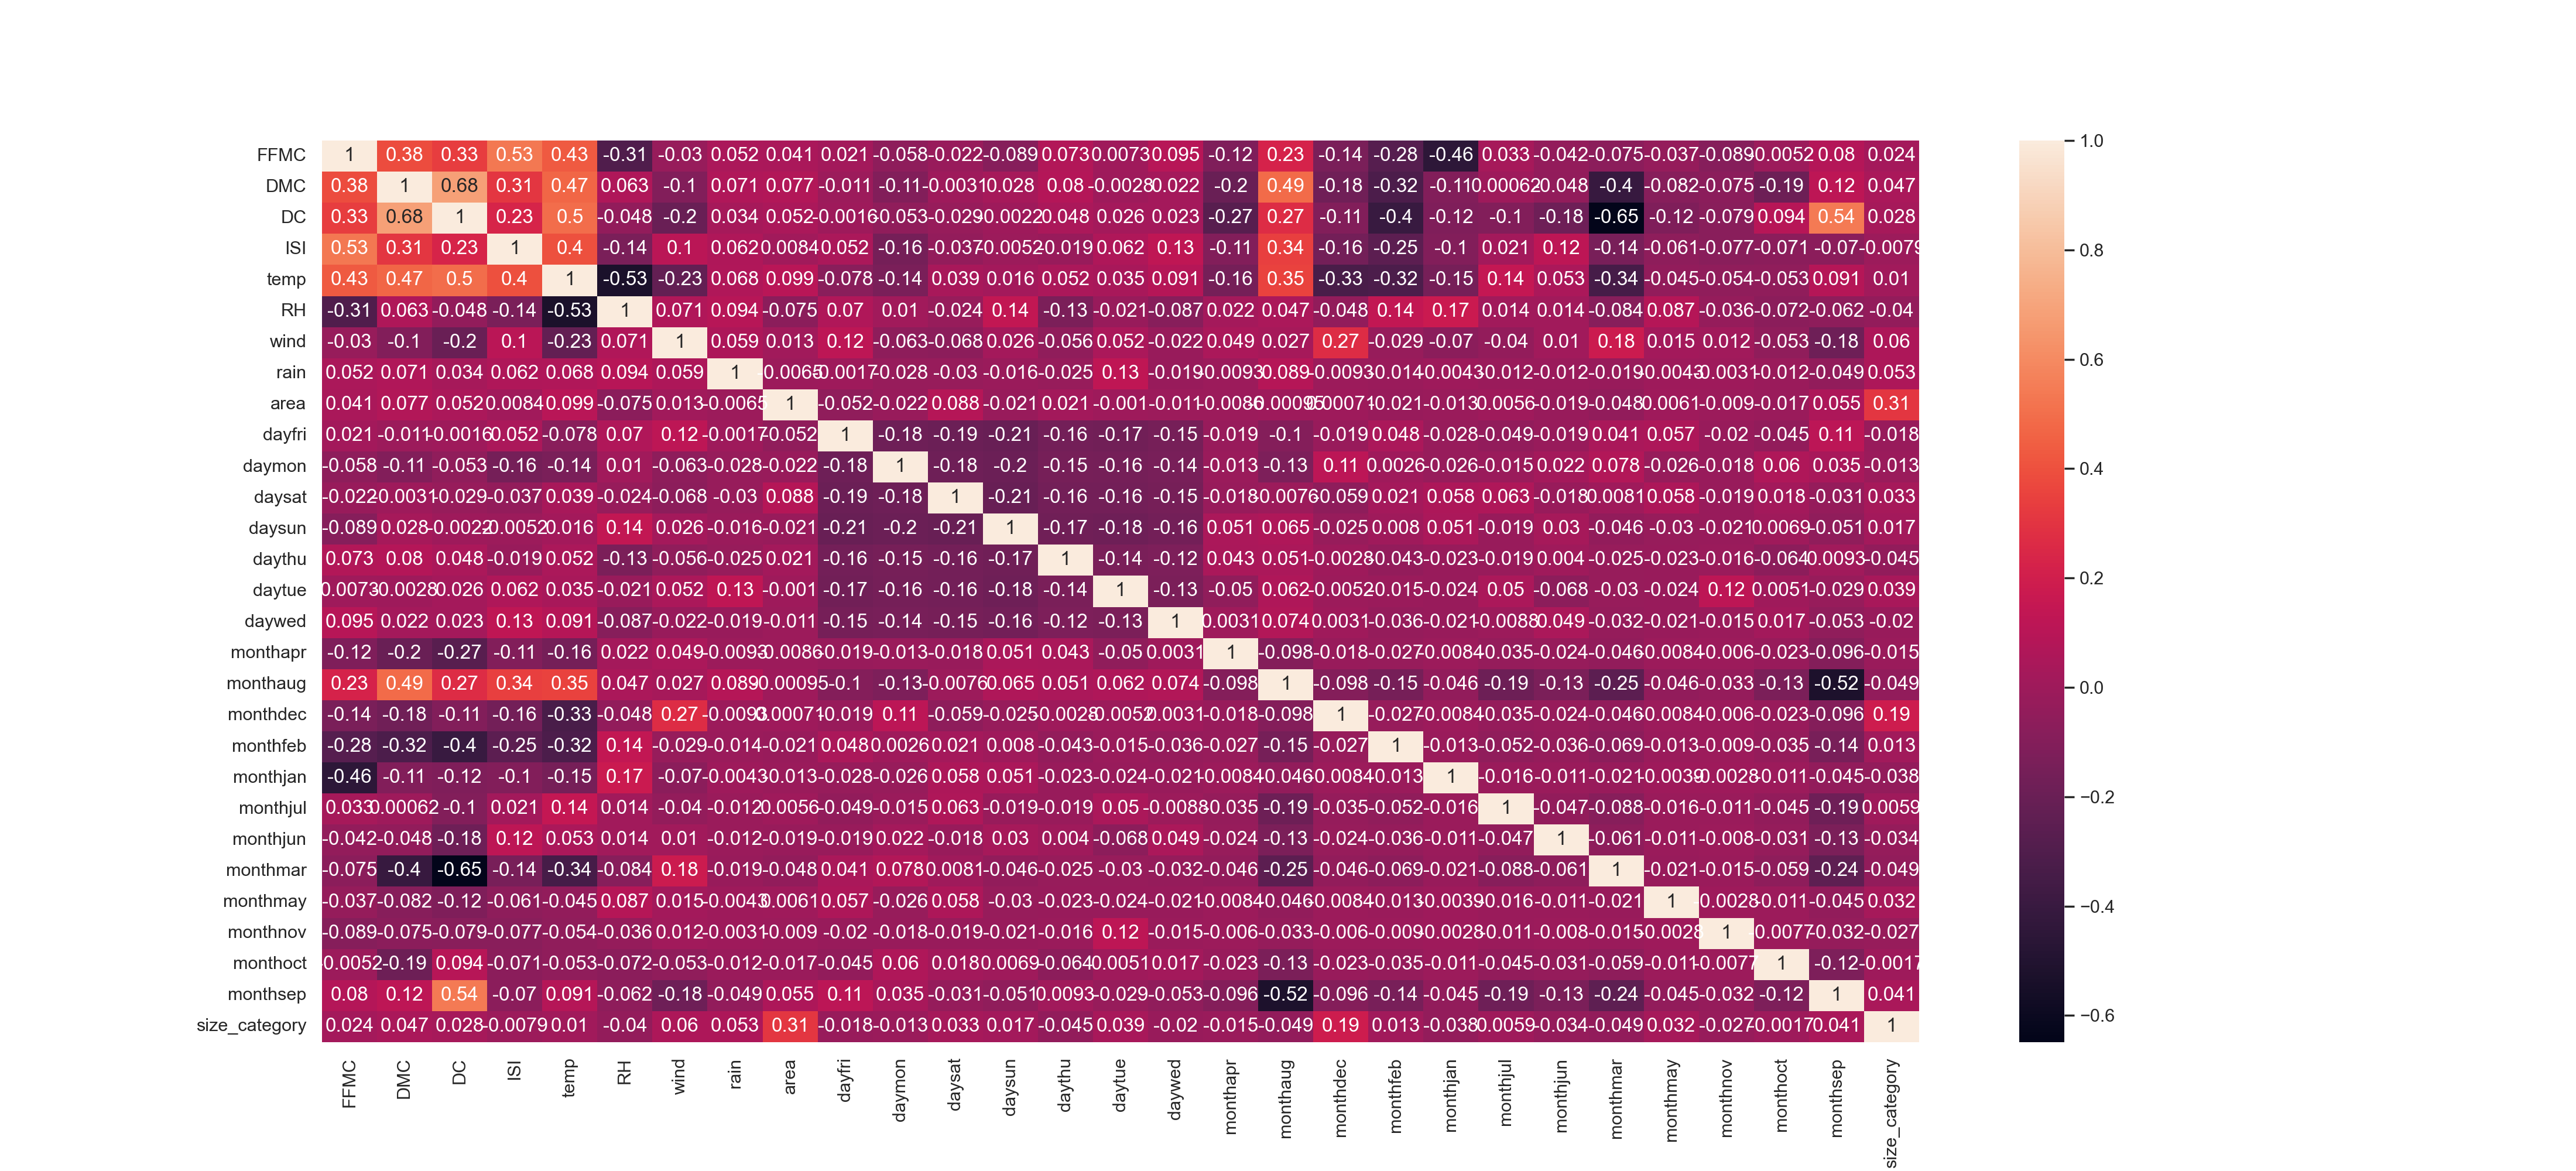

In [150]:
# Checking correlation
plt.figure(figsize=(22,10))
sns.heatmap(forest.corr(), annot=True)
plt.show()

# Feature Engineering
# Univariate Feature Selection 

In [151]:
# Feature Extraction with univariable statistical tests (chi-sqaured for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [152]:
array = forest.values
X = array[:,0:28]
Y = array[:,28]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

In [153]:
X

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [154]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [155]:
# Summarize scores
set_printoptions(precision=3)  # For regression: f_regression, mutual_info_regression
print(fit.scores_)             # For Classification: chi2, f_classificaion, mutual_info_classif
features = fit.transform(X)

[1.021e-01 4.073e+01 4.599e+01 7.324e-02 9.143e-02 4.853e+00 1.455e+00
 6.237e+00 1.551e+04 1.377e-01 7.725e-02 4.729e-01 1.235e-01 9.003e-01
 6.846e-01 1.790e-01 1.089e-01 7.864e-01 1.738e+01 8.441e-02 7.439e-01
 1.662e-02 5.661e-01 1.084e+00 5.302e-01 3.720e-01 1.505e-03 5.612e-01]


#  Recursive Feature Elimination

In [156]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [157]:
# Feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X,Y)

In [158]:
# Feature Ranking 
fit.ranking_

array([10, 23, 24,  8, 15, 17, 14, 22,  1,  5, 16,  1,  2,  3,  4, 12, 19,
       18,  7,  9, 21,  1, 20, 13, 26, 25, 11,  6])

# Feature Importance using Decision Tree

In [159]:
# Feature Importance with extra tress classifier
from sklearn.tree import DecisionTreeClassifier

In [160]:
# Feature extraction
model = DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

In [162]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# By feature engineering we have got the features which are more important and less important.so, we will drop the features which are less important

In [163]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [164]:
forest.pop('area')
forest.pop('daysat')
forest.pop('daysun')
forest.pop('daythu')
forest.pop('monthjul')

0      0
1      0
2      0
3      0
4      0
      ..
512    0
513    0
514    0
515    0
516    0
Name: monthjul, Length: 509, dtype: int64

In [165]:
forest.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthdec  monthfeb  monthjan  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  size_category  
0         0         0              0  
1         1         0              0  
2         1         0              0  
3         0         0              0  
4         0         0              0  

[5 rows x 24 columns]